<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 28px; font-weight: bold; line-height: 1.5;">
    Proyecto Integrador <br> <span style="margin-top: 10px; display: inline-block;">Módulo 4</span> <br> <span style="margin-top: 10px; display: inline-block;">Expansión Estratégica de Biogenesys con Python</span>
</h1>


#### Librerias para manipulación de datos (pandas, numpy), visualizacion de nulos (missingno), visualización (matplotlib, seaborn), trabajo con datos espaciales (geopandas).

In [143]:
import pandas as pd             # Manipulación y análisis de datos, especialmente en formato de tablas.
import numpy as np              # Cálculos numéricos y operaciones en arrays (matrices) de datos.
import matplotlib.pyplot as plt # Visualización de datos, permite crear gráficos básicos y avanzados.
import matplotlib.dates as mdates
import seaborn as sns           # Visualización de datos, basado en matplotlib pero con estilo mejorado y gráficos estadísticos.
import geopandas as gpd         # Trabajar con datos geoespaciales, permite manipular datos de mapas y hacer visualizaciones geográficas.
import missingno as msno        # Visualizar datos faltantes y patrones de valores nulos en el conjunto de datos.

### **Avance 1 - Carga y transformación de los datos**

##### - Lectura del Dataset usando pandas

In [144]:
data = pd.read_csv('data_latinoamerica.csv', sep=',')
data.head(5)

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

##### - Dimensiones del Dataset: Se usa el metodo shape para verificar el tamano del dataset (cantidad de registros y columnas)

In [145]:
print(f'El dataset consta de {data.shape[0]} registros y {data.shape[1]} columnas')

El dataset consta de 12216057 registros y 50 columnas


 ##### - Inspeccion del Dataset

In [146]:
# Crear una lista con la información de cada columna
column_info = []

for col in data.columns:
    unique_values = data[col].nunique()       # Número de valores únicos
    null_values = data[col].isnull().sum()    # Número de valores nulos
    dtype = data[col].dtype                   # Tipo de dato de la columna
    column_info.append([col, dtype, unique_values, null_values])

# Crear un DataFrame con la información de las columnas
column_info_df = pd.DataFrame(column_info, columns=["Columna", "Tipo de Dato", "Valores Únicos", "Valores Nulos"])

# Mostrar el DataFrame
column_info_df

Columna Tipo de Dato  Valores Únicos  \
0                            location_key       object           12327   
1                                    date       object             991   
2                            country_code       object              20   
3                            country_name       object              20   
4                           new_confirmed      float64            9845   
5                            new_deceased      float64            1287   
6                    cumulative_confirmed      float64          137782   
7                     cumulative_deceased      float64           26579   
8   cumulative_vaccine_doses_administered      float64          110038   
9                              population      float64           10055   
10                        population_male      float64            8506   
11                      population_female      float64            8496   
12                       population_rural      float64              20   
13                       population_urban      float64              20   
14                     population_density      float64              20   
15                human_development_index      float64             380   
16                   population_age_00_09      float64            5988   
17                   population_age_10_19      float64            6245   
18                   population_age_20_29      float64            5832   
19                   population_age_30_39      float64            5476   
20                   population_age_40_49      float64            5048   
21                   population_age_50_59      float64            4496   
22                   population_age_60_69      float64            3726   
23                   population_age_70_79      float64            2929   
24            population_age_80_and_older      float64            2156   
25                                gdp_usd      float64              20   
26                     gdp_per_capita_usd      float64              21   
27                               latitude      float64           10417   
28                              longitude      float64           10351   
29                             area_sq_km      float64            3080   
30                     smoking_prevalence      float64              15   
31                    diabetes_prevalence      float64              17   
32                  infant_mortality_rate      float64              18   
33                        nurses_per_1000      float64              19   
34                    physicians_per_1000      float64              18   
35            average_temperature_celsius      float64           20814   
36            minimum_temperature_celsius      float64           20221   
37            maximum_temperature_celsius      float64           21891   
38                            rainfall_mm      float64            6241   
39                      relative_humidity      float64         3025272   
40                population_largest_city      float64              20   
41                       area_rural_sq_km      float64              18   
42                       area_urban_sq_km      float64              18   
43                        life_expectancy      float64              20   
44              adult_male_mortality_rate      float64              20   
45            adult_female_mortality_rate      float64              20   
46               pollution_mortality_rate      float64              19   
47             comorbidity_mortality_rate      float64              16   
48                          new_recovered      float64            3443   
49                   cumulative_recovered      float64           35407   

    Valores Nulos  
0               0  
1               0  
2               0  
3               0  
4         5839054  
5         5893738  
6         5838685  
7         5893376  
8        11948128  
9          532167  
10        1123794  
11        1123794  

##### - Inspeccion de los paises que conforman el dataset

Cantidad de ocurrencias por país:
               Country    Count
0               Brazil  5565456
1               Mexico  2475518
2                 Peru  1883891
3             Colombia  1145596
4            Argentina   540095
5                Chile   359733
6   Dominican Republic    32703
7            Venezuela    24775
8              Ecuador    24775
9            Guatemala    22793
10             Uruguay    19820
11            Honduras    18829
12            Paraguay    18829
13           Nicaragua    17838
14                Cuba    17838
15         El Salvador    14865
16              Panama    13874
17             Bolivia     9910
18          Costa Rica     7928
19         Puerto Rico      991


/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/1111489135.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Count', y='Country', palette='viridis')


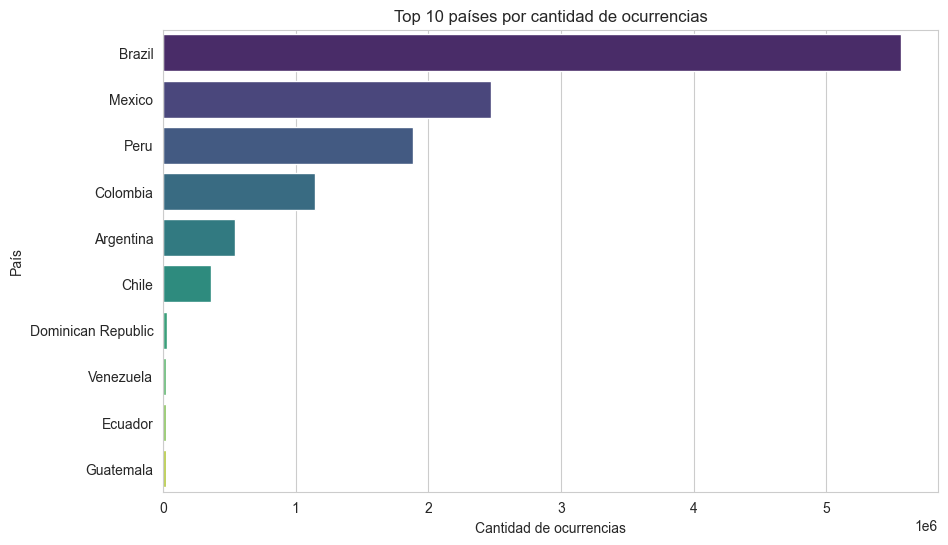

In [147]:
# Crear un DataFrame con la cantidad de ocurrencias por país, ordenado en orden descendente
country_counts = data['country_name'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']  # Renombrar columnas
country_counts = country_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Mostrar el DataFrame
print("Cantidad de ocurrencias por país:")
print(country_counts)

# Graficar el Top 10 países por cantidad de ocurrencias
top_countries = country_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Count', y='Country', palette='viridis')
plt.title('Top 10 países por cantidad de ocurrencias')
plt.xlabel('Cantidad de ocurrencias')
plt.ylabel('País')
plt.show()


##### - Filtrado de paises de interes para la expansión estratégica de BIOGENESYS.

In [148]:
# Lista de países seleccionados
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

# Filtrar el DataFrame para incluir solo los países seleccionados
data_filtrada = data.loc[data['country_name'].isin(paises_seleccionados)].copy()

# Mostrar información sobre el DataFrame filtrado 
print(f"Número de registros: {data_filtrada.shape[0]}, Número de columnas : {data_filtrada.shape[1]}")
print(data_filtrada['country_name'].value_counts())


Número de registros: 11970289, Número de columnas : 50
country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64


##### - Se aplica un filtro, usando una mascara, para obtener los datos de fechas posteriores a 2021-01-01.

In [149]:
data_filtrada_fecha = data_filtrada[data_filtrada['date'] >= '2021-01-01']
# Mostrar información sobre el DataFrame filtrado 
print(f"Número de registros: {data_filtrada_fecha.shape[0]}, Número de columnas : {data_filtrada_fecha.shape[1]}")

Número de registros: 7549375, Número de columnas : 50


##### - Inspeccion de nulos: Para mejorar la calidad de los datos y obtener resultados más precisos, se filtran columnas con más del 30% (4000000) de valores faltantes.

Columnas con más de 4,000,000 valores nulos:
cumulative_vaccine_doses_administered    7286122
population_rural                         7545625
population_urban                         7545625
population_density                       7545625
human_development_index                  4081875
gdp_usd                                  7545000
gdp_per_capita_usd                       7544375
smoking_prevalence                       7545625
diabetes_prevalence                      7545625
infant_mortality_rate                    7545625
nurses_per_1000                          7545625
physicians_per_1000                      7545625
population_largest_city                  7545625
area_rural_sq_km                         7545625
area_urban_sq_km                         7545625
life_expectancy                          7545625
adult_male_mortality_rate                7545625
adult_female_mortality_rate              7545625
pollution_mortality_rate                 7545625
comorbidity_mortality_ra

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/1334941386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos_altos.values, y=nulos_altos.index, palette='viridis')


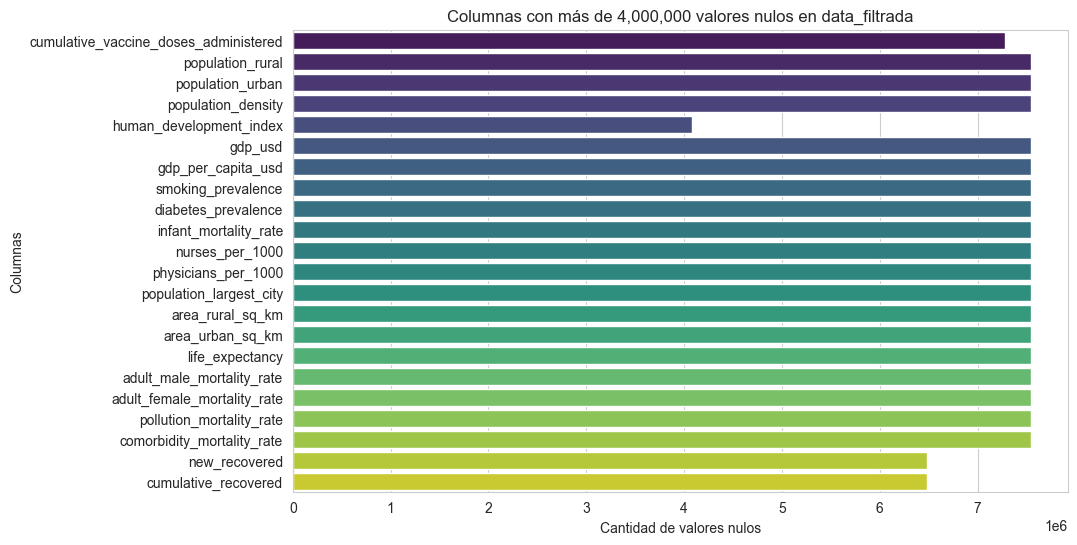

In [150]:
# 1. Calcular la cantidad de valores nulos en cada columna y filtrar aquellas con más de 4,000,000 valores nulos
nulos = data_filtrada_fecha.isnull().sum()
nulos_altos = nulos[nulos > 4000000]

# 2. Mostrar las columnas con más de 4,000,000 valores nulos
print("Columnas con más de 4,000,000 valores nulos:")
print(nulos_altos)

# 3. Visualizar solo las columnas con más de 4,000,000 valores nulos con un gráfico de barras
if not nulos_altos.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=nulos_altos.values, y=nulos_altos.index, palette='viridis')
    plt.title("Columnas con más de 4,000,000 valores nulos en data_filtrada")
    plt.xlabel("Cantidad de valores nulos")
    plt.ylabel("Columnas")

plt.show()


##### - Al analizar los datos, se observa una gran cantidad de valores nulos en varias columnas. Por ello, se opta por aplicar un nuevo filtro, esta vez utilizando la columna location_key en el DataFrame data_latinoamerica

In [151]:
data_filtrada_paises_fecha = data_filtrada_fecha[data_filtrada_fecha['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]


##### - Inspeccion de valores nulos luego de filtros

Columnas con valores nulos y su cantidad:
                                       Cantidad de valores nulos
cumulative_recovered                                        2740
new_recovered                                               2119
cumulative_vaccine_doses_administered                        589
rainfall_mm                                                   90
average_temperature_celsius                                   42
relative_humidity                                             42
maximum_temperature_celsius                                   41
minimum_temperature_celsius                                   41
cumulative_deceased                                           21
cumulative_confirmed                                          21
new_deceased                                                  21
new_confirmed                                                 21


<Figure size 1000x600 with 0 Axes>

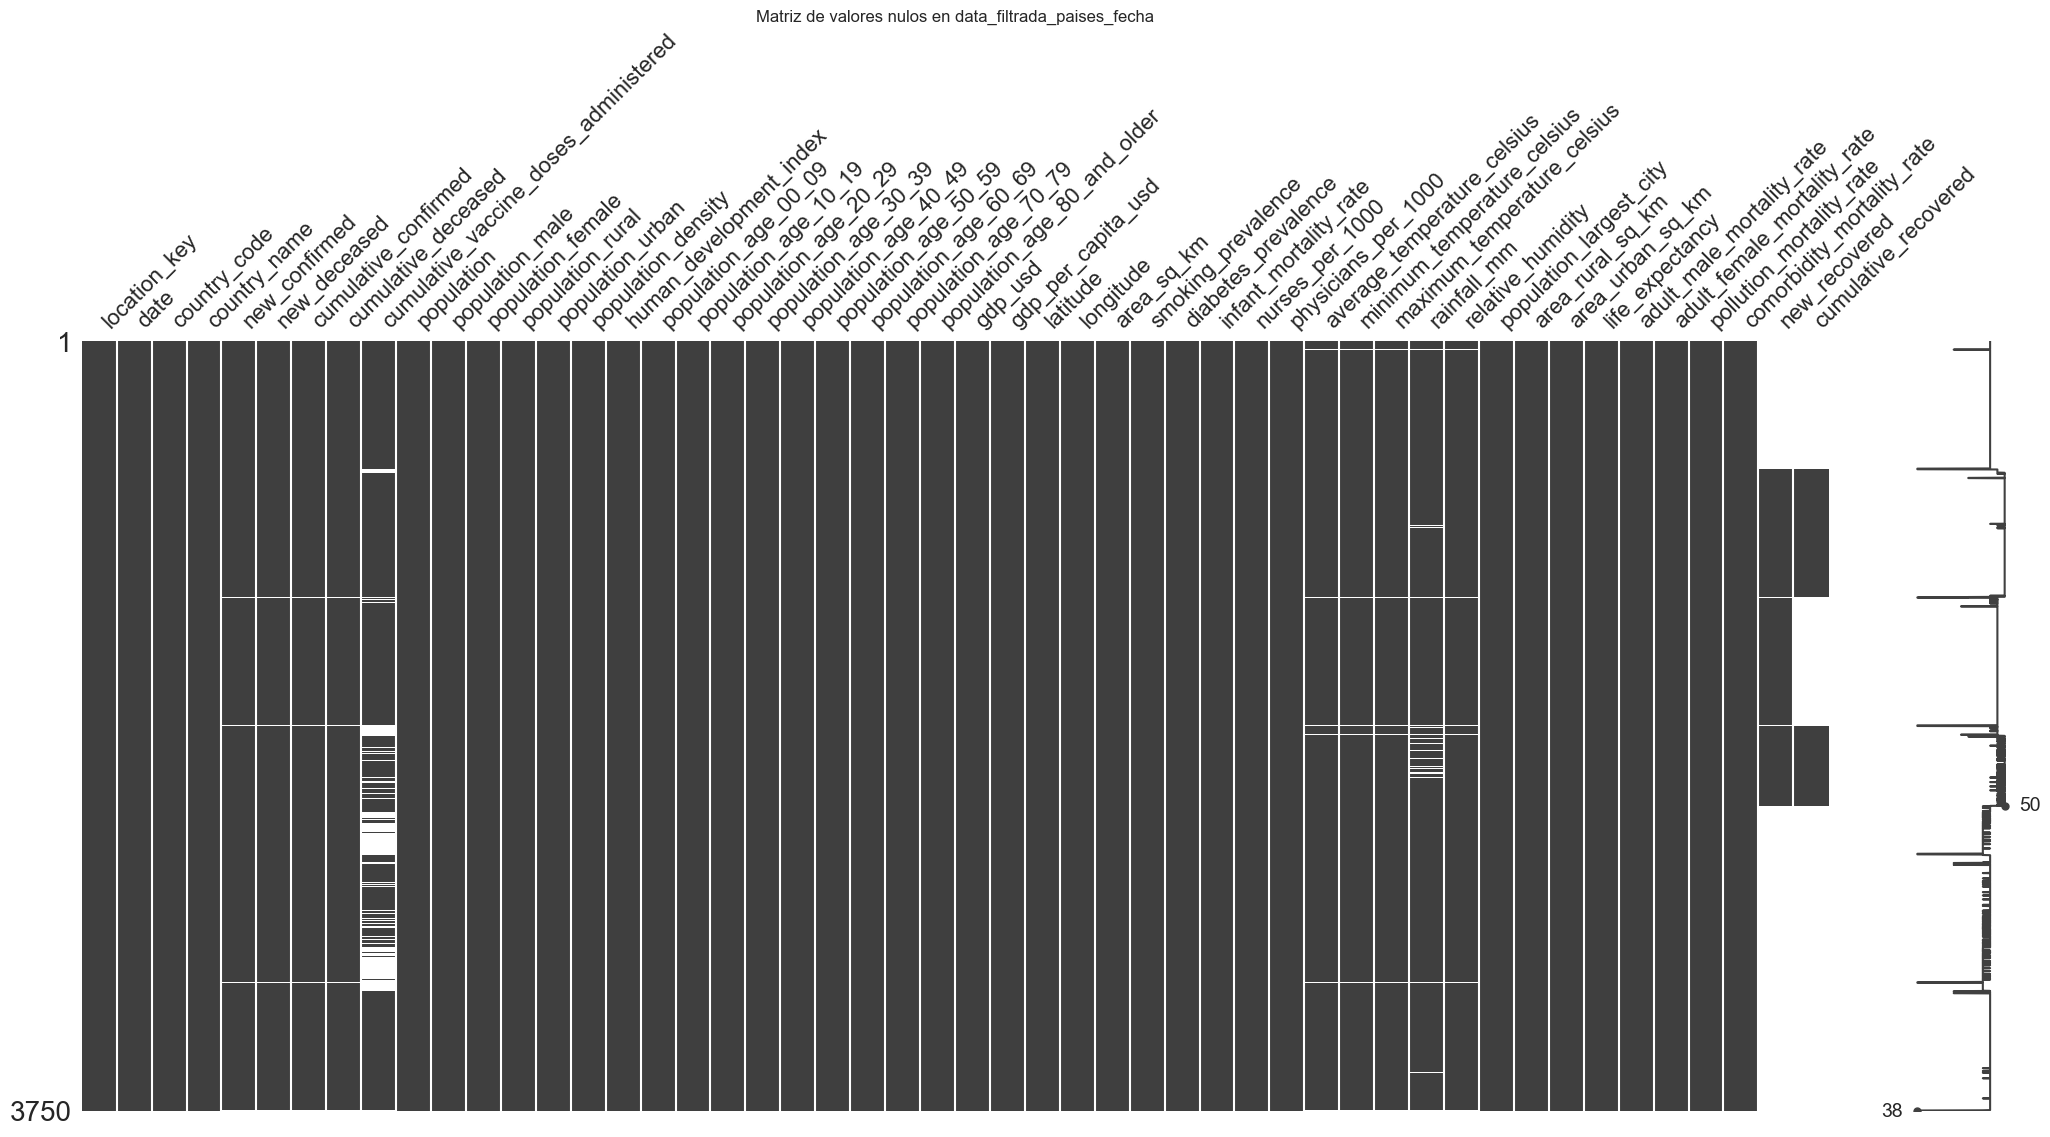

In [152]:
# Calcular los valores nulos y almacenarlos en un DataFrame ordenado
valores_nulos_fecha = data_filtrada_paises_fecha.isnull().sum()
valores_nulos_fecha = valores_nulos_fecha[valores_nulos_fecha > 0].sort_values(ascending=False)
valores_nulos_df = pd.DataFrame(valores_nulos_fecha, columns=['Cantidad de valores nulos'])

# Imprimir el DataFrame de valores nulos de manera estructurada
print("Columnas con valores nulos y su cantidad:")
print(valores_nulos_df)

# Visualizar la matriz de valores nulos
plt.figure(figsize=(10, 6))
msno.matrix(data_filtrada_paises_fecha)
plt.title("Matriz de valores nulos en data_filtrada_paises_fecha")
plt.show()


#### - Limpieza y transformacion de valores nulos

In [153]:
# Asegurarse de que 'country_name' esté solo como columna y no como índice
data_filtrada_paises_fecha = data_filtrada_paises_fecha.reset_index(drop=True)

# Lista de columnas que requieren reemplazos específicos
columnas_a_rellenar = {
    # Rellenar con la media de cada país para aproximar la cantidad típica de casos y fallecimientos diarios
    'new_confirmed': 'mean', 
    'new_deceased': 'mean',
    
    # Rellenar con forward fill (ffill) en las columnas acumuladas de casos y fallecimientos, dado que estos valores no deberían decrecer con el tiempo
    'cumulative_confirmed': 'ffill', 
    'cumulative_deceased': 'ffill',

    # Rellenar en ambas direcciones (bfill y ffill) en la columna acumulada de dosis de vacunas,
    # ya que estos valores deberían reflejar una continuidad y acumulación a lo largo del tiempo
    'cumulative_vaccine_doses_administered': 'bfill_ffill',

    # Rellenar valores ambientales con la media de cada país, ya que representan condiciones climáticas típicas por región
    'average_temperature_celsius': 'mean', 
    'minimum_temperature_celsius': 'mean', 
    'maximum_temperature_celsius': 'mean', 
    'rainfall_mm': 'mean', 
    'relative_humidity': 'mean',

    # Rellenar con cero en los casos de recuperados, asumiendo que la falta de datos indica que no hubo recuperaciones reportadas
    'new_recovered': 0, 
    'cumulative_recovered': 0
}

# Aplicar los reemplazos
for columna, metodo in columnas_a_rellenar.items():
    if metodo == 'mean':
        # Reemplazar valores nulos con la media del país
        data_filtrada_paises_fecha[columna] = data_filtrada_paises_fecha.groupby('country_name')[columna].transform(lambda x: x.fillna(round(x.mean())))
    elif metodo == 'ffill':
        # Rellenar hacia adelante en columnas acumuladas
        data_filtrada_paises_fecha[columna] = data_filtrada_paises_fecha.groupby('country_name')[columna].transform(lambda x: x.ffill())
    elif metodo == 'bfill_ffill':
        # Rellenar en ambas direcciones en columnas acumuladas de dosis de vacunas
        data_filtrada_paises_fecha[columna] = data_filtrada_paises_fecha.groupby('country_name')[columna].transform(lambda x: x.bfill().ffill())
    else:
        # Para las columnas que deben rellenarse con un valor específico como 0
        data_filtrada_paises_fecha[columna] = data_filtrada_paises_fecha[columna].fillna(metodo)

# Mostrar el DataFrame actualizado
data_filtrada_paises_fecha




location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-01           AR    Argentina         2685.0   
1              AR  2021-01-02           AR    Argentina         7767.0   
2              AR  2021-01-03           AR    Argentina         4934.0   
3              AR  2021-01-04           AR    Argentina        13953.0   
4              AR  2021-01-05           AR    Argentina        14085.0   
...           ...         ...          ...          ...            ...   
3745           PE  2022-09-13           PE         Peru         1150.0   
3746           PE  2022-09-14           PE         Peru         5025.0   
3747           PE  2022-09-15           PE         Peru         5025.0   
3748           PE  2022-09-16           PE         Peru         5025.0   
3749           PE  2022-09-17           PE         Peru         5025.0   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0            140.0             1662867.0              46522.0   
1            166.0             1670634.0              46688.0   
2            157.0             1675568.0              46845.0   
3            157.0             1689521.0              47002.0   
4            160.0             1703606.0              47162.0   
...            ...                   ...                  ...   
3745          22.0             4127612.0             216173.0   
3746         197.0             4127612.0             216173.0   
3747         197.0             4127612.0             216173.0   
3748         197.0             4127612.0             216173.0   
3749         197.0             4127612.0             216173.0   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   18849.0  44938712.0  ...   
1                                   20334.0  44938712.0  ...   
2                                   20529.0  44938712.0  ...   
3                                   25164.0  44938712.0  ...   
4                                   29852.0  44938712.0  ...   
...                                     ...         ...  ...   
3745                             83624934.0  29381884.0  ...   
3746                             83624934.0  29381884.0  ...   
3747                             83624934.0  29381884.0  ...   
3748                             83624934.0  29381884.0  ...   
3749                             83624934.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3745               10554712.0         1256339.0           16425.0   
3746               10554712.0         1256339.0           16425.0   
3747               10554712.0         1256339.0           16425.0   
3748               10554712.0         1256339.0           16425.0   
3749               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3745           76.516                    146.370                       84.815   
3746           76.516                    146.370                       84.815   
3747    

##### - Mis datos siguen teniendo valores nulos?

In [154]:
# Filtrar y contar los valores nulos por columna
valores_nulos = data_filtrada_paises_fecha.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]

# Mostrar la cantidad de valores nulos restantes, si los hay
if not valores_nulos.empty:
    print("Columnas con valores nulos restantes:")
    print(valores_nulos)
else:
    print("No hay valores nulos restantes en el DataFrame.")

# Mostrar el tamaño del DataFrame
print("\nTamaño del DataFrame:", data_filtrada_paises_fecha.shape)


No hay valores nulos restantes en el DataFrame.

Tamaño del DataFrame: (3750, 50)


##### - Evaluacion de registros duplicados

In [155]:
# Evaluar si existen filas duplicadas
hay_filas_duplicadas = data_filtrada_paises_fecha.duplicated().any()
print("¿Existen filas duplicadas?:", "SI" if hay_filas_duplicadas else "NO")

¿Existen filas duplicadas?: NO


##### - Correccion de tipos de datos

In [156]:
# Hacer una copia explícita del DataFrame antes de modificarlo
data_filtrada_paises_fecha = data_filtrada_paises_fecha.copy()

# Diccionario para mapear las columnas y sus tipos de datos correctos
columnas_tipos_datos = {
    'date': 'datetime64[ns]',  # Convertir 'date' a formato datetime
    'population': 'int64',
    'population_male': 'int64',
    'population_female': 'int64',
    'rural_population': 'int64',
    'urban_population': 'int64',
    'population_density': 'float64',
    'human_development_index': 'float64',
    'population_age_00_09': 'int64',
    'population_age_10_19': 'int64',
    'population_age_20_29': 'int64',
    'population_age_30_39': 'int64',
    'population_age_40_49': 'int64',
    'population_age_50_59': 'int64',
    'population_age_60_69': 'int64',
    'population_age_70_79': 'int64',
    'population_age_80_and_older': 'int64',
    'gdp': 'int64',
    'gdp_per_capita': 'int64',
    'new_confirmed': 'int64',
    'new_deceased': 'int64',
    'cumulative_confirmed': 'int64',
    'cumulative_deceased': 'int64',
    'new_recovered': 'int64',
    'cumulative_recovered': 'int64',
    'latitude': 'float64',
    'longitude': 'float64',
    'area': 'int64',
    'area_rural_sq_km': 'int64',
    'area_urban_sq_km': 'int64',
    'life_expectancy': 'float64',
    'smoking_prevalence': 'float64',
    'diabetes_prevalence': 'float64',
    'infant_mortality_rate': 'float64',
    'adult_male_mortality_rate': 'float64',
    'adult_female_mortality_rate': 'float64',
    'pollution_mortality_rate': 'float64',
    'comorbidity_mortality_rate': 'float64',
    'nurses': 'float64',
    'physicians': 'float64',
    'key': 'string',  # Identificador único de la región
    'country_code': 'string',
    'country_name': 'string',
    'cumulative_vaccine_doses_administered': 'int64',
    'average_temperature': 'float64',
    'minimum_temperature': 'float64',
    'maximum_temperature': 'float64',
    'rainfall': 'float64',
    'relative_humidity': 'float64',
    'population_largest_city': 'int64'
}

# Cambiar los tipos de datos en el DataFrame 'data_filtrada_paises_fecha'
for columna, tipo in columnas_tipos_datos.items():
    if columna in data_filtrada_paises_fecha.columns:  # Verifica si la columna existe en el DataFrame
        try:
            data_filtrada_paises_fecha[columna] = data_filtrada_paises_fecha[columna].astype(tipo)
        except ValueError as e:
            print(f"Error al convertir la columna {columna} a {tipo}: {e}")
        except TypeError as e:
            print(f"Error de tipo al convertir {columna}: {e}")

# Verificar los tipos de datos después de la conversión
print(data_filtrada_paises_fecha.dtypes)


location_key                                     object
date                                     datetime64[ns]
country_code                             string[python]
country_name                             string[python]
new_confirmed                                     int64
new_deceased                                      int64
cumulative_confirmed                              int64
cumulative_deceased                               int64
cumulative_vaccine_doses_administered             int64
population                                        int64
population_male                                   int64
population_female                                 int64
population_rural                                float64
population_urban                                float64
population_density                              float64
human_development_index                         float64
population_age_00_09                              int64
population_age_10_19                            

#### - Guardo el archivo

In [157]:
data_filtrada_paises_fecha.to_csv('DatosFinalesFiltrado.csv', index=False)

### **Avance 2 - Análisis Exploratorio y Visualización**


In [158]:
# Cargar los datos
data_final = pd.read_csv('DatosFinalesFiltrado.csv', sep=',')
data_final.head(5)

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-01           AR    Argentina           2685   
1           AR  2021-01-02           AR    Argentina           7767   
2           AR  2021-01-03           AR    Argentina           4934   
3           AR  2021-01-04           AR    Argentina          13953   
4           AR  2021-01-05           AR    Argentina          14085   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           140               1662867                46522   
1           166               1670634                46688   
2           157               1675568                46845   
3           157               1689521                47002   
4           160               1703606                47162   

   cumulative_vaccine_doses_administered  population  ...  \
0                                  18849    44938712  ...   
1                                  20334    44938712  ...   
2                                  20529    44938712  ...   
3                                  25164    44938712  ...   
4                                  29852    44938712  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                 15057273           2690269             55032   
1                 15057273           2690269             55032   
2                 15057273           2690269             55032   
3                 15057273           2690269             55032   
4                 15057273           2690269             55032   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8              0   
1                      26.6                        15.8              0   
2                      26.6                        15.8              0   
3                      26.6                        15.8              0   
4                      26.6                        15.8              0   

   cumulative_recovered  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 50 columns]

##### - Medidas de Tendencia Central y Dispersion

In [159]:
# Crear una copia del DataFrame para evitar modificar el original
data_cambiar_signo = data_final.copy()

# Lista de columnas que deben ser no negativas
columnas_no_negativas = ['new_confirmed', 'new_deceased', 'new_recovered', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered']

# Cambiar el signo de los valores negativos a positivo en las columnas especificadas
for columna in columnas_no_negativas:
    if columna in data_cambiar_signo.columns:
        data_cambiar_signo[columna] = data_cambiar_signo[columna].apply(lambda x: abs(x))

# Calcular las medidas de tendencia central
tendencia_central = data_cambiar_signo.select_dtypes(include='number').agg(['mean', 'median']).T
tendencia_central.columns = ['Media', 'Mediana']

# Calcular las medidas de dispersión (incluyendo Mínimo y Máximo)
dispersión = data_cambiar_signo.select_dtypes(include='number').agg(['std', 'var', 'min', 'max']).T
dispersión['Rango'] = dispersión['max'] - dispersión['min']
dispersión.columns = ['Desviación Estándar', 'Varianza', 'Mínimo', 'Máximo', 'Rango']

# Concatenar ambas tablas en una sola
tabla_combinada = pd.concat([tendencia_central, dispersión], axis=1)

# Función para mostrar la tabla estilizada en escala de grises y con letra pequeña
def aplicar_estilo_combinado(dataframe, titulo):
    return dataframe.style.set_caption(titulo).set_properties(**{
        'background-color': '#f0f0f0',
        'color': '#333333',
        'border-color': '#666666',
        'font-size': '8pt',  # Tamaño de letra reducido
    }).set_table_styles([
        {'selector': 'caption', 'props': [('color', 'white'), ('font-size', '10pt'), ('font-weight', 'bold')]},  # Título en blanco
        {'selector': 'th', 'props': [('background-color', '#666666'), ('color', 'white'), ('font-weight', 'bold')]},
    ]).highlight_max(color='#d9d9d9').highlight_min(color='#e6e6e6')

# Aplicar estilo y mostrar la tabla combinada
aplicar_estilo_combinado(tabla_combinada, "Medidas de Tendencia Central y Dispersión")




1. **Desigualdad económica y desarrollo:**
   - PIB per cápita promedio: **$9,482 USD** (rango $6,432 - $14,896)
   - IDH promedio: **0.777** (rango 0.747 - 0.832)

2. **Impacto de la pandemia:**
   - Casos nuevos promedio: **13,922** (máximo 298,408)
   - Muertes nuevas promedio: **277** (máximo 11,447)

3. **Factores climáticos y demográficos:**
   - Temperatura promedio: **21°C** (rango 3.4°C - 39.1°C)
   - Densidad poblacional promedio: **34.27 hab/km²** (rango 16.52 - 66.33)

Estas cifras reflejan desigualdades significativas en desarrollo, manejo de la pandemia y condiciones climáticas.

#### - Matriz de Correlacion
Creamos una matriz de correlación para ver las relaciones entre las variables numéricas del conjunto de datos.

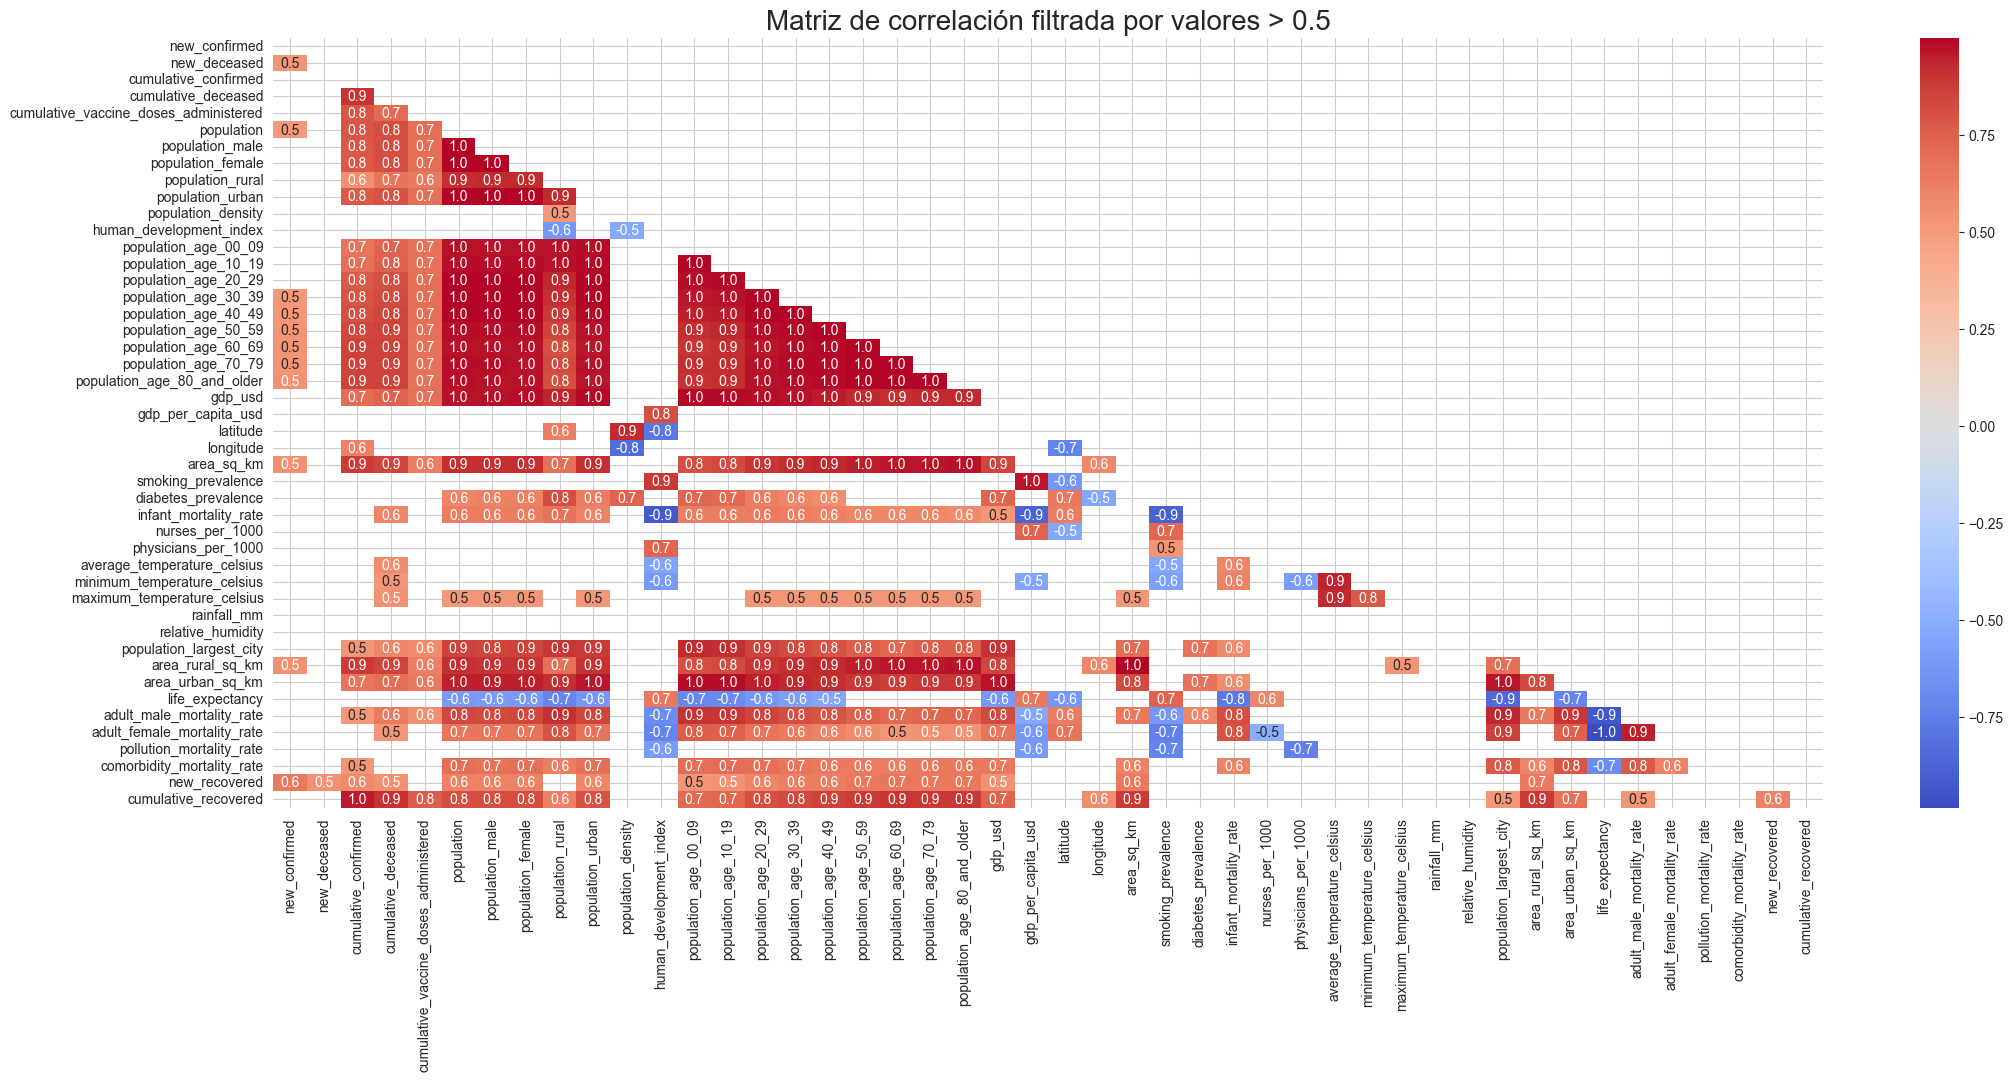

In [160]:
# Filtrar solo las columnas numéricas
data_numericas = data_final.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación entre las columnas numéricas
correlacion = data_final[data_numericas].corr()

# Crear máscara para ocultar la parte inferior de la matriz
mask = np.triu(np.ones_like(correlacion, dtype=bool))

# Filtrar por valores mayores a 0.5
correlacion_filtrada = correlacion[abs(correlacion) > abs(0.5)]

# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(25, 10))
heatmap=sns.heatmap(correlacion_filtrada, mask=mask, annot=True, cmap="coolwarm", fmt=".1f")
plt.title('Matriz de correlación filtrada por valores > 0.5', fontsize=20)
plt.show()


#Análisis:Esto nos permite identificar relaciones potenciales entre diferentes variables, como si hay una correlación entre las dosis administradas y los casos confirmados, o entre la temperatura media y las tasas de infección.

**Áreas de Mayor Correlación**
1. **Variables Demográficas**
   - Las variables relacionadas con la población, como population_rural, population_male, population_density y los grupos de edad muestran una fuerte correlación entre sí.
   - **Motivo**: Esto es esperable porque estas variables son componentes del total poblacional y están estructuralmente relacionadas.

2. **Índice de Desarrollo Humano y Economía**
   - Variables como gdp_per_capita_usd y human_development_index tienen una alta correlación.
   - **Motivo**: En general, los países con un PIB per cápita alto tienden a tener mejores índices de desarrollo humano debido a mayor acceso a educación, salud e infraestructura.

3. **Variables Relacionadas con Salud**
   - physicians_per_1000, life_expectancy, y human_development_index también están correlacionadas.
   - **Motivo**: Una mejor infraestructura de salud contribuye directamente a una mayor esperanza de vida y, a menudo, está asociada con países con altos niveles de desarrollo humano.

4. **Variables de COVID-19**
   - Las variables acumulativas como cumulative_confirmed y cumulative_vaccine_doses_administered muestran correlaciones altas.
   - **Motivo**: Los países con más casos confirmados han impulsado mayores campañas de vacunación para reducir la propagación del virus.
**Conclusión**
Las correlaciones más fuertes están relacionadas con factores estructurales, como la composición poblacional y el nivel de desarrollo económico, que influyen en los indicadores de salud y en la capacidad de los países para responder a la pandemia de COVID-19. Esto puede guiar decisiones en campañas de vacunación y políticas públicas para maximizar su impacto en países con mayores necesidades.

#### - Observar el comportamiento de las distintas variables por pais (variables originales vs normalizadas)

In [161]:
# Configuración inicial de estilo
sns.set_style("whitegrid")

# Crear una lista única de países en los datos
unique_countries = data_final['country_name'].unique()
pastel_palette = sns.color_palette("pastel", len(unique_countries))  # Ajustar la paleta al número de países

# Variables de población originales
variables_poblacion_originales = ['population_male', 'population_female', 'population_rural', 'population_urban']

# Normalizar las variables de población y crear nuevas columnas
for variable in variables_poblacion_originales:
    variable_normalizada = f"{variable}_percent"  # Crear nombre de la columna normalizada
    data_final[variable_normalizada] = (data_final[variable] / data_final['population']) * 100  # Calcular el porcentaje

# Variables de COVID-19 originales
variables_covid_originales = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered']

# Normalizar las variables de COVID-19 y crear nuevas columnas
for variable in variables_covid_originales:
    variable_normalizada = f"{variable}_per_100k"  # Crear nombre de la columna normalizada
    data_final[variable_normalizada] = (data_final[variable] / data_final['population']) * 100000  # Normalizar por cada 100k habitantes

# Listas de variables originales y normalizadas
variables_poblacion = {
    "originales": variables_poblacion_originales,
    "normalizadas": [f"{var}_percent" for var in variables_poblacion_originales]
}

variables_covid = {
    "originales": variables_covid_originales,
    "normalizadas": [f"{var}_per_100k" for var in variables_covid_originales]
}

# Crear una figura con una cuadrícula adecuada
total_variables = len(variables_poblacion["originales"]) + len(variables_covid["originales"])
fig, axes = plt.subplots(total_variables, 2, figsize=(18, 5 * total_variables))

# Función para graficar variables originales y normalizadas
def graficar_variables(variables, data, start_index=0):
    for idx, (variable_orig, variable_norm) in enumerate(zip(variables["originales"], variables["normalizadas"]), start=start_index):
        # Gráfico de la variable original
        if variable_orig in data.columns:
            sns.barplot(
                x='country_name', 
                y=variable_orig, 
                data=data, 
                hue='country_name',  # Colores por país
                ax=axes[idx, 0], 
                errorbar=None,
                palette=pastel_palette  # Usar paleta ajustada
            )
            axes[idx, 0].set_title(f'{variable_orig} por país', fontsize=14, fontweight='bold')
            axes[idx, 0].set_xlabel('País', fontsize=12)
            axes[idx, 0].set_ylabel(variable_orig, fontsize=12)
            axes[idx, 0].tick_params(axis='x', rotation=45)
            if axes[idx, 0].legend_ is not None:
                axes[idx, 0].legend_.remove()

        # Gráfico de la variable normalizada
        if variable_norm in data.columns:
            sns.barplot(
                x='country_name', 
                y=variable_norm, 
                data=data, 
                hue='country_name',  # Colores por país
                ax=axes[idx, 1], 
                errorbar=None,
                palette=pastel_palette  # Usar paleta ajustada
            )
            axes[idx, 1].set_title(f'{variable_norm} (% o por cada 100k)', fontsize=14, fontweight='bold')
            axes[idx, 1].set_xlabel('País', fontsize=12)
            axes[idx, 1].set_ylabel(variable_norm, fontsize=12)
            axes[idx, 1].tick_params(axis='x', rotation=45)
            if axes[idx, 1].legend_ is not None:
                axes[idx, 1].legend_.remove()

# Graficar variables de población
graficar_variables(variables_poblacion, data_final, start_index=0)

# Graficar variables de COVID-19
graficar_variables(variables_covid, data_final, start_index=len(variables_poblacion["originales"]))

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()


La normalización de los datos de COVID-19 es esencial para comparar el impacto entre países con diferentes tamaños de población. Esto ayuda a ver el riesgo relativo y permite tomar decisiones informadas sobre políticas de salud. Al observar los gráficos de variables normalizadas, emergen patrones claros que pueden orientar la expansión de una empresa de vacunas de COVID-19:

1. **Chile** ha demostrado un fuerte compromiso con la vacunación, liderando en dosis administradas por cada 100,000 habitantes. Esto refleja un sistema de salud eficiente y una alta aceptación de las vacunas, lo cual podría indicar que el mercado ya está saturado. Sin embargo, su alta tasa de casos acumulados sugiere que podrían seguir interesados en refuerzos de vacunas.

2. **Perú** tiene una de las tasas más altas de mortalidad por COVID-19 en proporción a su población, tanto en muertes nuevas como acumuladas. Esto sugiere posibles debilidades en su sistema de salud y una mayor vulnerabilidad al virus. Este país podría ser un mercado prioritario para la expansión de vacunas, ya que existe una gran necesidad de reducir la mortalidad y mejorar la respuesta ante la pandemia.

3. **Brasil y México** presentan una gran proporción de población urbana, lo cual puede complicar la gestión de la pandemia debido a la alta densidad poblacional. A pesar de sus recursos, la necesidad de refuerzos de vacunación en áreas urbanas podría ser una oportunidad de mercado, dado el riesgo de nuevos brotes en estos entornos.

En resumen, **Perú** y **México** aparecen como mercados prioritarios para la expansión de la empresa de vacunas, dada la alta necesidad de reducir la mortalidad en el primero y la alta densidad poblacional en el segundo. **Chile** representa una oportunidad de refuerzos debido a su alta aceptación de la vacunación y su sistema de pruebas eficiente. Estos países ofrecen distintas oportunidades estratégicas para abordar la pandemia de manera efectiva.

#### - Histogramas de las variables que “Sí” tenga cambios de valores.

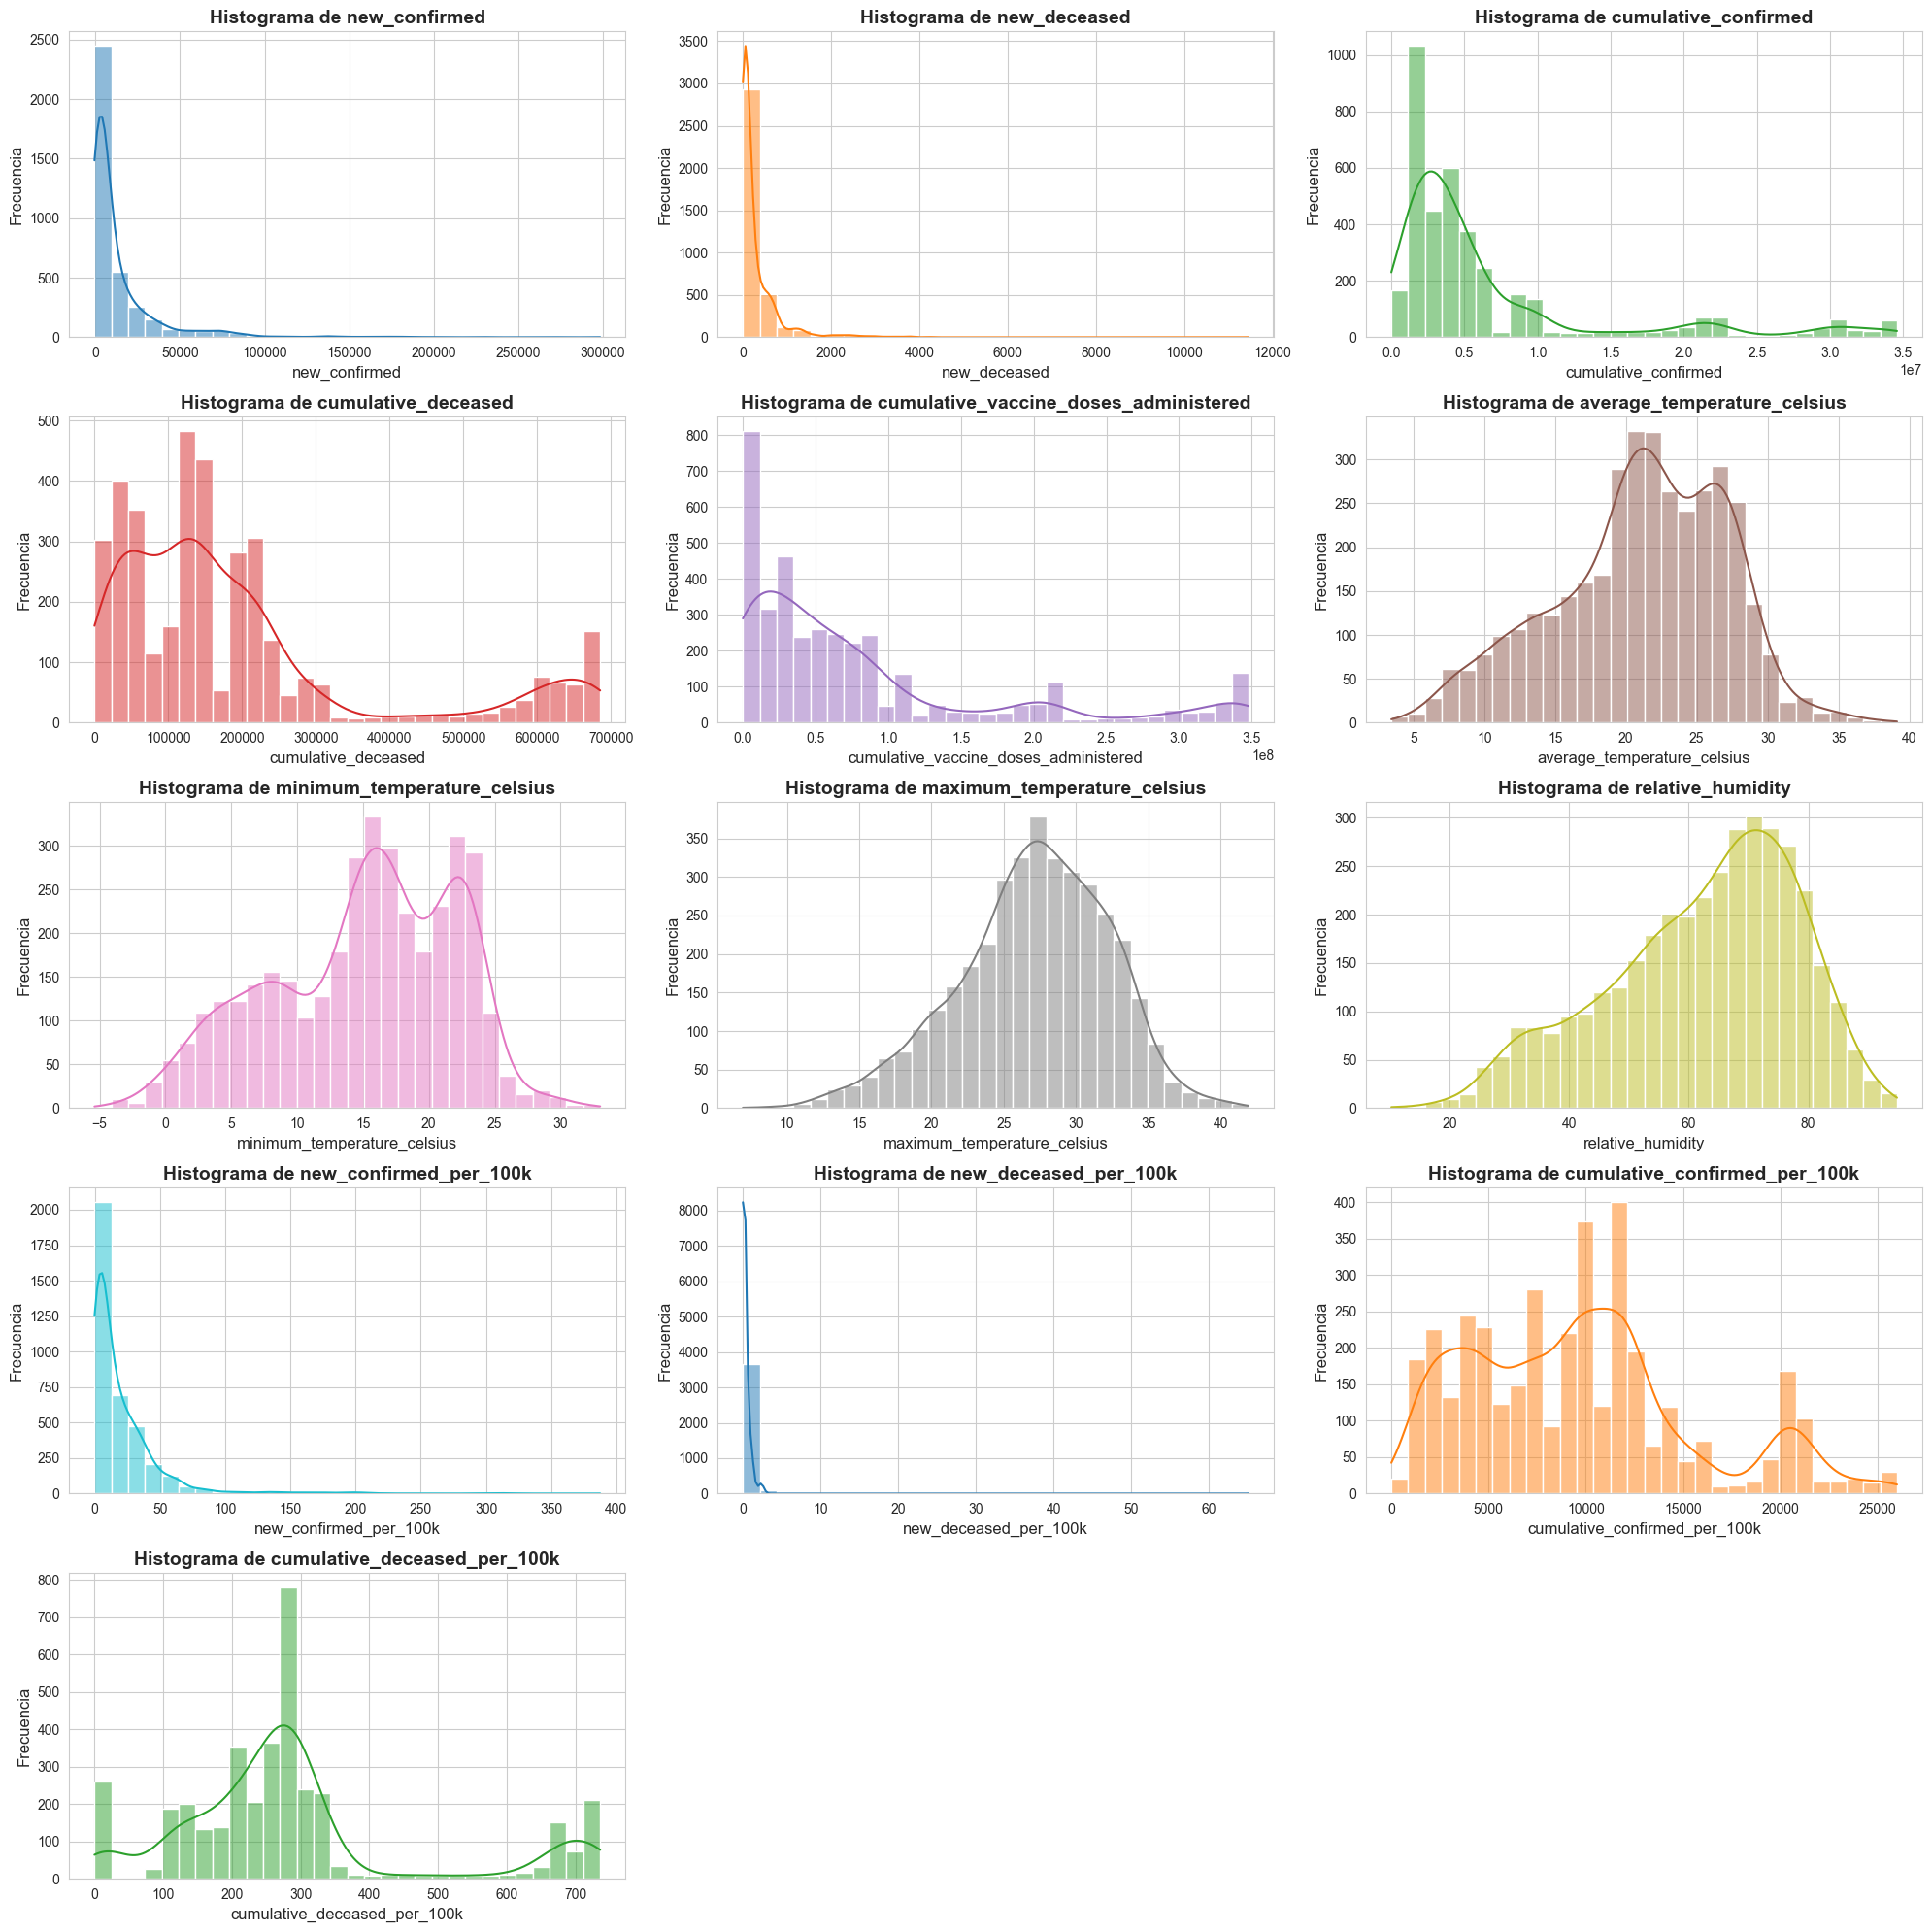

In [99]:
# Lista de variables de interés
variables_interes = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 
    'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 
    'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity',
    'new_confirmed_per_100k', 'new_deceased_per_100k', 'cumulative_confirmed_per_100k', 
    'cumulative_deceased_per_100k', 'vaccine_doses_per_100k'
]

# Crear una figura con una cuadrícula de 3 columnas
num_columnas = 3
num_filas = (len(variables_interes) + num_columnas - 1) // num_columnas  # Calcula filas necesarias

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, num_filas * 4))  # Ajuste dinámico del tamaño
axes = axes.flatten()  # Aplana la matriz de ejes para facilitar su uso

# Colores diferenciados para cada gráfico
colores = sns.color_palette("tab10", len(variables_interes))

# Generar histogramas
for i, variable in enumerate(variables_interes):
    if variable in data_final.columns:  # Verificar que la columna exista en los datos
        sns.histplot(
            data_final[variable].dropna(),  # Evitar valores nulos
            kde=True, ax=axes[i], bins=30, color=colores[i]
        )
        axes[i].set_title(f'Histograma de {variable}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(variable, fontsize=12)
        axes[i].set_ylabel('Frecuencia', fontsize=12)
    else:
        axes[i].axis('off')  # Apagar ejes si la columna no está en los datos

# Apagar gráficos adicionales si sobran espacios
for j in range(len(variables_interes), len(axes)):
    axes[j].axis('off')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Resumen de los Insights de los Histogramas de Variables COVID-19

1. **Casos Nuevos y Acumulados**: La mayoría de los países tienen casos nuevos y acumulados bajos, aunque algunos enfrentan picos elevados, reflejando brotes esporádicos. Esto puede estar influenciado por factores como densidad poblacional y políticas de salud.

2. **Vacunación**: La distribución de dosis administradas muestra que algunos países lograron una cobertura alta, mientras que otros aún están rezagados. Los países con alta cobertura ofrecen ejemplos de estrategias de vacunación exitosas.

3. **Clima**: Las variables de temperatura y humedad presentan distribuciones estables. La relación entre estas condiciones y la propagación del virus podría ser relevante para comprender el impacto climático en la transmisión del COVID-19.

4. **Fallecimientos Nuevos y Acumulados**: La mayoría de los países tienen tasas de fallecimiento relativamente bajas, pero algunos muestran valores altos, sugiriendo factores de riesgo específicos que podrían incluir limitaciones en infraestructura de salud.

Conclusión
Estos patrones destacan la importancia de factores como clima, densidad poblacional y políticas de salud en la propagación del virus y la efectividad de las campañas de vacunación. Analizar estos elementos ayuda a identificar países donde la expansión de la vacunación puede ser más necesaria o efectiva.

#### - Diagrama de dispersión de la temperatura media contra los casos confirmados y muertes confirmadas


/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/3820935007.py:8: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(
/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/3820935007.py:21: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


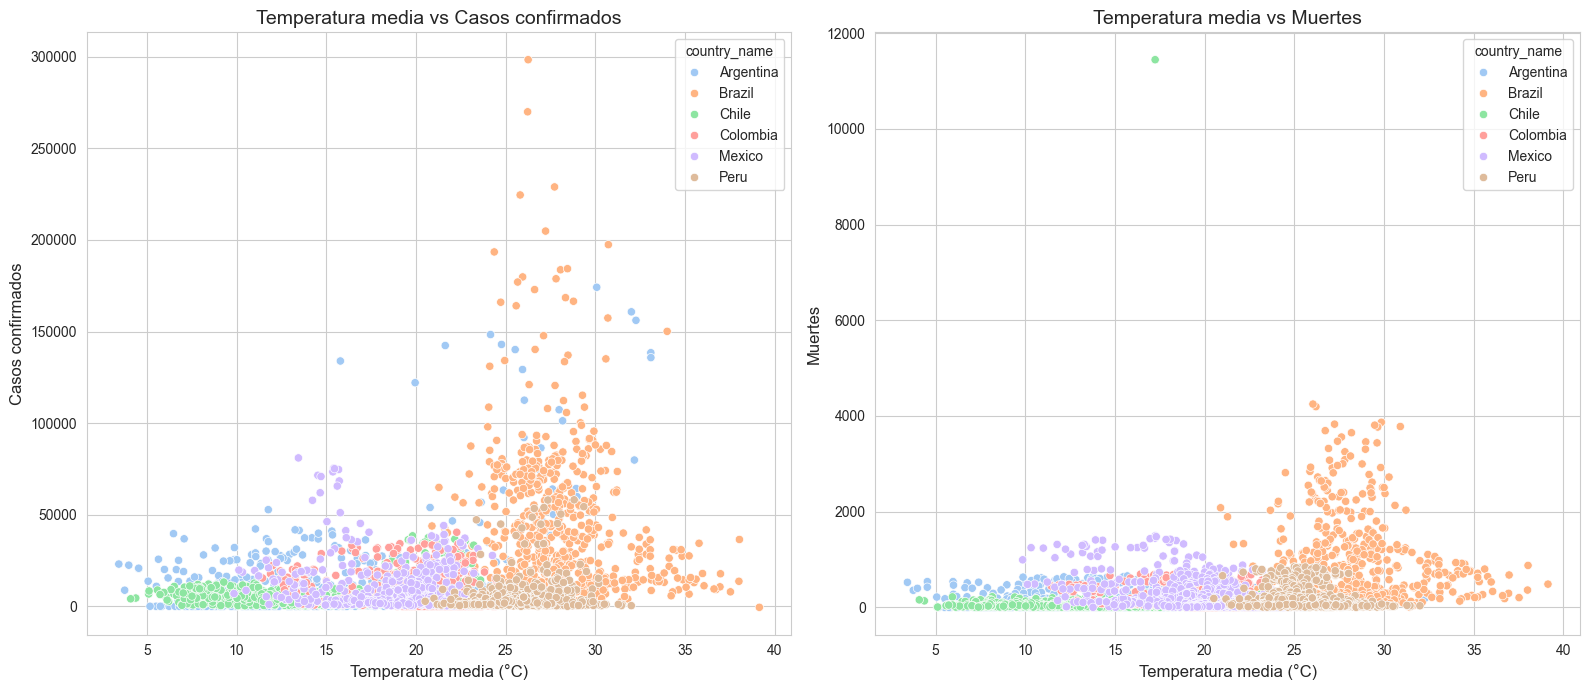

In [100]:
# Crear figura con una fila y dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 7))  # Ajustar tamaño

# Configurar colores pastel
pastel_palette = sns.color_palette("pastel")

# Gráfico 1: Temperatura media vs Casos confirmados
sns.scatterplot(
    x='average_temperature_celsius', 
    y='new_confirmed', 
    hue='country_name', 
    palette=pastel_palette,  # Aplicar colores pastel
    data=data_final, 
    ax=axes[0]
)
axes[0].set_title('Temperatura media vs Casos confirmados', fontsize=14)
axes[0].set_xlabel('Temperatura media (°C)', fontsize=12)
axes[0].set_ylabel('Casos confirmados', fontsize=12)

# Gráfico 2: Temperatura media vs Muertes
sns.scatterplot(
    x='average_temperature_celsius', 
    y='new_deceased', 
    hue='country_name', 
    palette=pastel_palette,  # Aplicar colores pastel
    data=data_final, 
    ax=axes[1]
)
axes[1].set_title('Temperatura media vs Muertes', fontsize=14)
axes[1].set_xlabel('Temperatura media (°C)', fontsize=12)
axes[1].set_ylabel('Muertes', fontsize=12)

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar gráficos
plt.show()


1. **Casos Confirmados**:
   - En el gráfico absoluto, Brasil destaca con un gran número de casos confirmados en temperaturas de entre 20°C y 30°C. Sin embargo, dado que Brasil tiene una población grande, sus valores absolutos de casos pueden no reflejar el riesgo real en términos relativos.

2. **Muertes Confirmadas**:
   - En el gráfico absoluto, nuevamente Brasil aparece con un alto número de muertes en temperaturas de 20°C a 30°C, mientras que otros países tienen valores mucho más bajos.


##### - Analisis de Temperatura media por pais

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/4065824306.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/4065824306.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


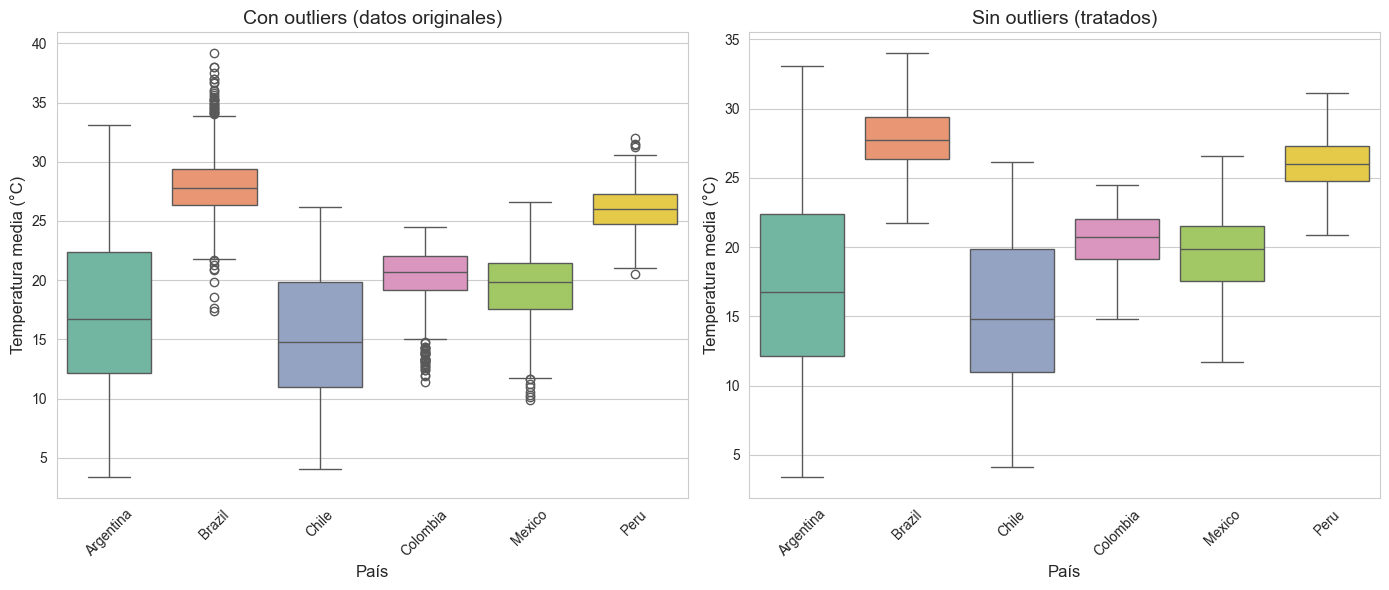

In [101]:
# 1. Calcular Q1, Q3 e IQR para cada país
q1 = data_final.groupby('country_name')['average_temperature_celsius'].quantile(0.25)
q3 = data_final.groupby('country_name')['average_temperature_celsius'].quantile(0.75)
iqr = q3 - q1

# 2. Calcular límites para identificar outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 3. Crear una copia de los datos originales para graficar con outliers
data_with_outliers = data_final.copy()

# 4. Función para tratar los outliers
def tratar_outliers(row):
    country = row['country_name']
    temp = row['average_temperature_celsius']
    # Reemplazar valores fuera de los límites con el límite correspondiente
    if temp < lower_bound[country]:
        return lower_bound[country]
    elif temp > upper_bound[country]:
        return upper_bound[country]
    else:
        return temp

# 5. Aplicar la función para tratar los outliers y actualizar data_final
data_final['average_temperature_celsius'] = data_final.apply(tratar_outliers, axis=1)

# 6. Crear figura con dos gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Una fila, dos columnas

# 7. Gráfico 1: Boxplot con los datos originales (con outliers)
sns.boxplot(
    x='country_name',
    y='average_temperature_celsius',
    data=data_with_outliers,
    palette="Set2",
    ax=axes[0],
    showfliers=True  # Mostrar outliers
)
axes[0].set_title('Con outliers (datos originales)', fontsize=14)
axes[0].set_xlabel('País', fontsize=12)
axes[0].set_ylabel('Temperatura media (°C)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# 8. Gráfico 2: Boxplot con los datos tratados (sin outliers)
sns.boxplot(
    x='country_name',
    y='average_temperature_celsius',
    data=data_final,
    palette="Set2",
    ax=axes[1],
    showfliers=False  # Ocultar outliers
)
axes[1].set_title('Sin outliers (tratados)', fontsize=14)
axes[1].set_xlabel('País', fontsize=12)
axes[1].set_ylabel('Temperatura media (°C)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 9. Ajustar diseño para evitar superposición
plt.tight_layout()

# 10. Mostrar gráficos
plt.show()


##### - Preparacion de datos para analisis temporal

In [102]:
# Este proceso prepara los datos para un análisis basado en el tiempo, 
# permitiendo extraer insights temporales y hacer análisis como tendencias mensuales o anuales, 
# comparaciones entre periodos, y facilitar visualizaciones cronológicas.

# Asegurarse de que la columna 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Eliminar filas con valores nulos en 'date' que podrían haber surgido si alguna conversión falló
#datos_finales_filtrados.dropna(subset=['date'], inplace=True)

# Crear una columna que represente el mes y año basado en la columna 'date'
data_final['month'] = data_final['date'].dt.to_period('M')

# Establecer la columna 'date' como índice para análisis temporal
data_final.set_index('date', inplace=True)

# Mostrar el DataFrame actualizado
data_final.sort_index(inplace=True)  # Ordenar por índice para asegurar que esté en orden cronológico
data_final.head()


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina           7767   
2021-01-02           PE           PE         Peru           1695   
2021-01-02           CL           CL        Chile           3338   
2021-01-02           MX           MX       Mexico           6948   
2021-01-02           CO           CO     Colombia          11723   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166               1670634                46688   
2021-01-02           200               1025025                94333   
2021-01-02            64                615902                16724   
2021-01-02           993               1533239               151435   
2021-01-02           328               1723443                50806   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                  20334    44938712   
2021-01-02                                   3762    29381884   
2021-01-02                                   9053    17574003   
2021-01-02                                  43960   110991953   
2021-01-02                                     18    50882884   

            population_male  ...  population_male_percent  \
date                         ...                            
2021-01-02         19523766  ...                43.445317   
2021-01-02         14450757  ...                49.182541   
2021-01-02          8972014  ...                51.052762   
2021-01-02         54855231  ...                49.422710   
2021-01-02         24984564  ...                49.102099   

            population_female_percent  population_rural_percent  \
date                                                              
2021-01-02                  45.825368                  8.008999   
2021-01-02                  50.817459                 24.233007   
2021-01-02                  48.947238                 13.325951   
2021-01-02                  51.788716                 22.477909   
2021-01-02                  50.897901                 18.694186   

            population_urban_percent  new_confirmed_per_100k  \
date                                                           
2021-01-02                 91.991001               17.283539   
2021-01-02                 86.414945                5.768861   
2021-01-02                 94.515376               18.993965   
2021-01-02                 92.463333                6.259913   
2021-01-02                 80.237791               23.039182   

            new_deceased_per_100k  cumulative_confirmed_per_100k  \
date                                                               
2021-01-02               0.369392                    3717.583183   
2021-01-02               0.680692                    3488.629252   
2021-01-02               0.364174                    3504.619864   
2021-01-02               0.894659                    1381.396541   
2021-01-02               0.644618                    3387.078059   

            cumulative_deceased_per_100k  \
date                                       
2021-01-02                    103.892608   
2021-01-02                    321.058377   
2021-01-02                     95.163293   
2021-01-02                    136.437819   
2021-01-02                     99.848900   

            cumulative_vaccine_doses_administered_per_100k    month  
date                                                                 
2021-01-02                                       45.248293  2021-01  
2021-01-02                                       12.803808  2021-01  
2021-01-02                                       51.513591  2021-01  
2021-01-02                                       39.606475  2021-01  
2021-01-02                 

#### Comportamiento de las dosis administradas de todos los países (Valor medio).

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/2671817167.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vaccine_doses_per_month = data_final.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered']


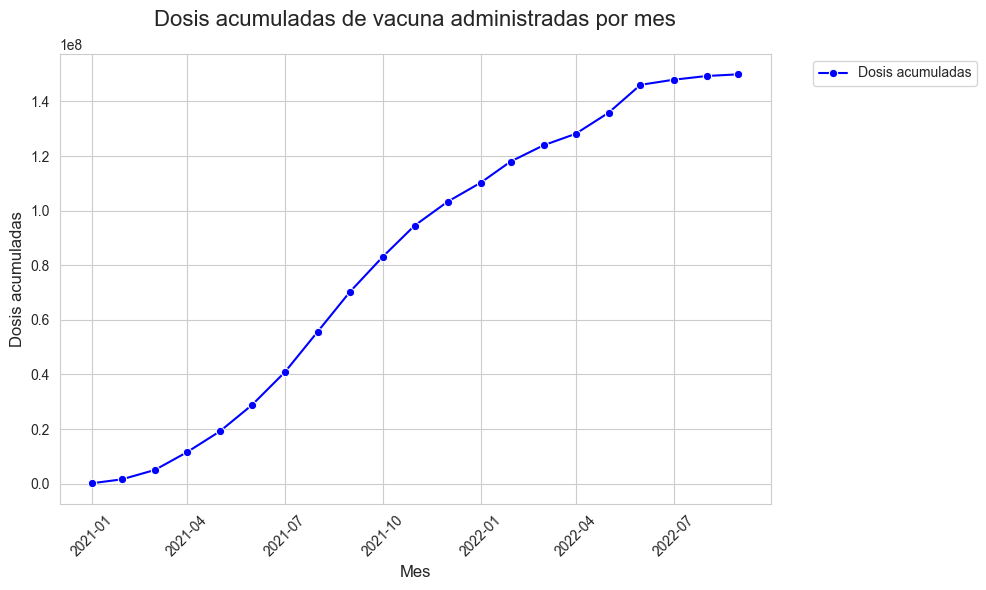

In [103]:
# Asegúrate de que la columna de fechas esté en el índice y sea de tipo datetime
if not isinstance(data_final.index, pd.DatetimeIndex):
    data_final.reset_index(inplace=True)  # Mueve el índice a una columna si es necesario
    data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')  # Convierte a datetime
    data_final.set_index('date', inplace=True)  # Establece la columna de fecha como índice

# Agrupar los datos por mes y calcular la media de las dosis administradas acumuladas
vaccine_doses_per_month = data_final.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered']

# Crear la figura y el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos
sns.lineplot(data=vaccine_doses_per_month, ax=ax, marker='o', color='b')

# Mejorar el gráfico con etiquetas y título
ax.set_title('Dosis acumuladas de vacuna administradas por mes', fontsize=16, pad=20)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Dosis acumuladas', fontsize=12)

# Ajustar las etiquetas del eje X para que se muestren solo algunas fechas (p. ej., cada 3 meses)
xticks = vaccine_doses_per_month.index[::3]  # Mostrar una etiqueta cada 3 meses
ax.set_xticks(xticks)
ax.set_xticklabels([date.strftime('%Y-%m') for date in xticks], rotation=45)

# Añadir leyenda y ajustar su posición fuera del gráfico
ax.legend(['Dosis acumuladas'], loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Mejorar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


##### Este gráfico muestra la evolución de las dosis acumuladas de vacunas administradas mensualmente entre enero de 2021 y septiembre de 2022. Se observa un crecimiento exponencial en los primeros meses, indicando un fuerte impulso inicial en las campañas de vacunación, seguido de una desaceleración a mediados de 2021, probablemente debido a la saturación de la población vacunada o desafíos logísticos. Hacia mediados de 2022, el ritmo de vacunación se estabiliza, lo que sugiere que la mayoría de la población objetivo ya fue vacunada, aunque el progreso se mantiene constante.

#### Evolución de dosis administradas por mes de cada país.


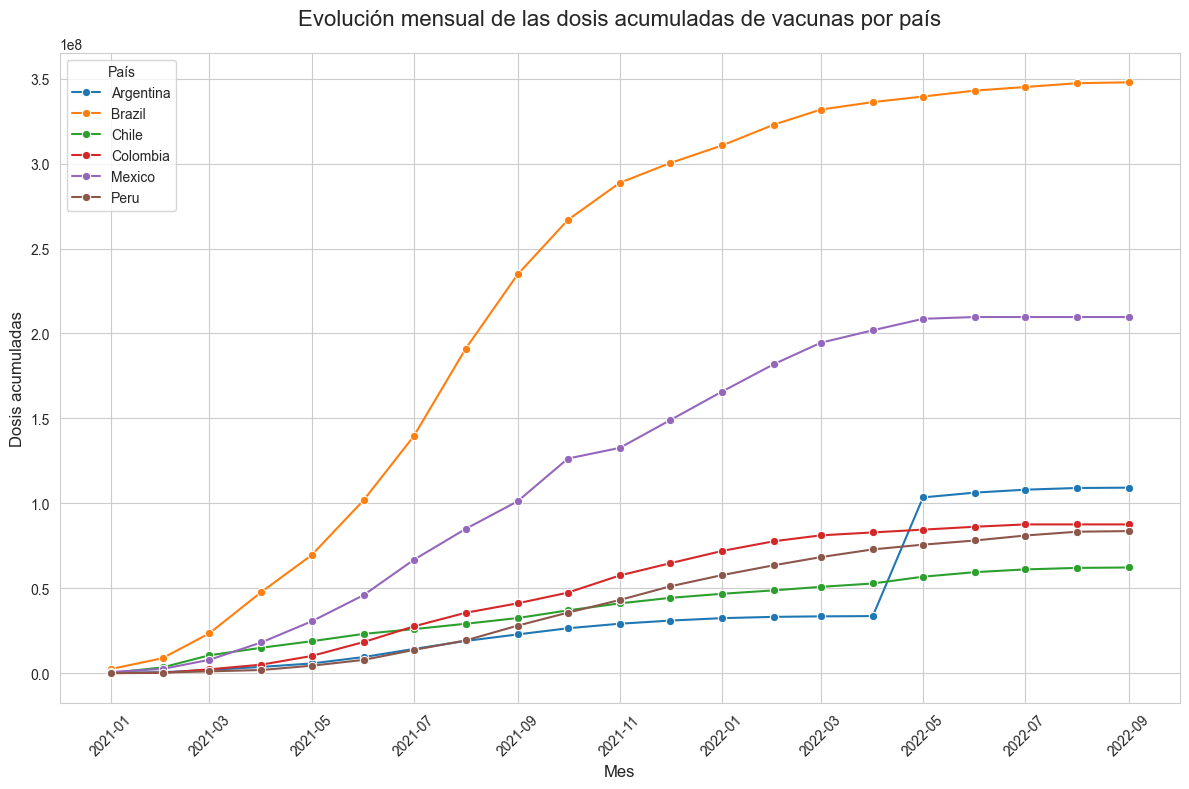

In [104]:

# Si el índice contiene las fechas, convertirlo a una columna
if 'date' not in data_final.columns:
    data_final.reset_index(inplace=True)  # Mueve el índice a una columna si es necesario

# Convertir la columna de fechas al formato datetime (si no está ya)
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Agrupar por mes y país, calculando la suma de las dosis administradas
dosis_por_mes_pais = (
    data_final.groupby([data_final['date'].dt.to_period('M'), 'country_name'])['cumulative_vaccine_doses_administered']
    .max()
    .reset_index()
)

# Convertir el período mensual a un formato de fecha adecuado para graficar
dosis_por_mes_pais['date'] = dosis_por_mes_pais['date'].dt.to_timestamp()

# Crear la figura y el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la evolución mensual para cada país
sns.lineplot(
    data=dosis_por_mes_pais,
    x='date',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    marker='o',
    ax=ax
)

# Mejorar el gráfico con etiquetas y título
ax.set_title('Evolución mensual de las dosis acumuladas de vacunas por país', fontsize=16, pad=20)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Dosis acumuladas', fontsize=12)
ax.tick_params(axis='x', rotation=45)

# Añadir la leyenda
ax.legend(title='País', fontsize=10)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


1. **Chile** destaca en dosis administradas por cada 100,000 habitantes, reflejando una alta cobertura de vacunación relativa.
2. **Brasil** tiene el mayor número absoluto de dosis administradas, pero su tasa per cápita es más baja debido a su gran población.
3. **México** muestra altos valores absolutos de dosis administradas, aunque su tasa per cápita es más baja, indicando una menor cobertura en proporción a su población.
4. **Argentina, Colombia y Perú** tienen tasas medias de vacunación per cápita, con Perú sobresaliendo levemente entre ellos.

El gráfico normalizado permite comparar mejor la efectividad de la vacunación entre países con diferentes tamaños de población.

#### Evolucion de muertes, casos y recuperaciones por mes de cada país


- Muertes

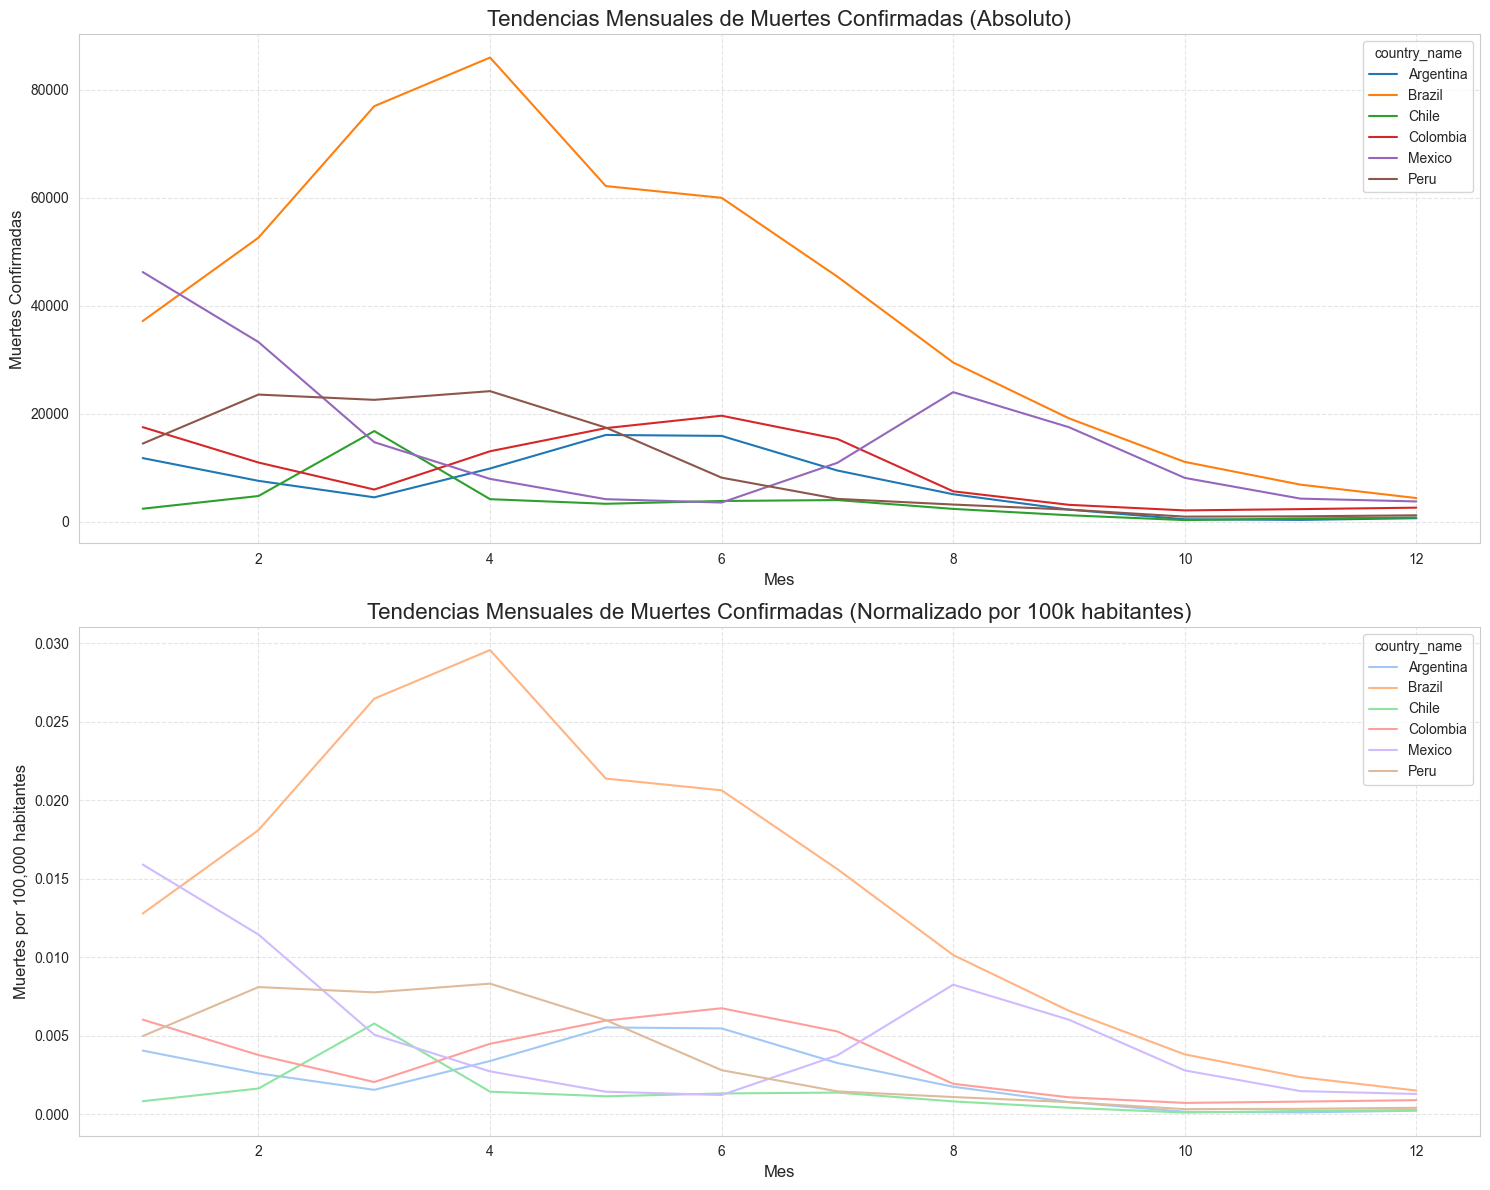

In [105]:
# Asegurarse de que la columna 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'])

# Crear columna 'month' si no existe
data_final['month'] = data_final['date'].dt.month

# Agrupar por país y mes para calcular la suma de muertes confirmadas y normalizadas
muertes_por_mes_pais = data_final.groupby(['country_name', 'month']).agg(
    total_deaths=('new_deceased', 'sum'),
    deaths_per_100k=('new_deceased', lambda x: (x.sum() / data_final['population'].sum()) * 100000)
).reset_index()

# Crear el gráfico de muertes confirmadas (absolutas y normalizadas)
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Colores personalizados para diferenciar valores absolutos y normalizados
palette_absoluto = sns.color_palette("tab10", n_colors=len(muertes_por_mes_pais['country_name'].unique()))
palette_normalizado = sns.color_palette("pastel", n_colors=len(muertes_por_mes_pais['country_name'].unique()))

# Muertes confirmadas (absoluto)
sns.lineplot(
    data=muertes_por_mes_pais, x='month', y='total_deaths', hue='country_name',
    palette=palette_absoluto, ax=axes[0]
)
axes[0].set_title('Tendencias Mensuales de Muertes Confirmadas (Absoluto)', fontsize=16)
axes[0].set_xlabel('Mes', fontsize=12)
axes[0].set_ylabel('Muertes Confirmadas', fontsize=12)
axes[0].grid(alpha=0.5, linestyle='--')

# Muertes confirmadas (normalizado por 100,000 habitantes)
sns.lineplot(
    data=muertes_por_mes_pais, x='month', y='deaths_per_100k', hue='country_name',
    palette=palette_normalizado, ax=axes[1]
)
axes[1].set_title('Tendencias Mensuales de Muertes Confirmadas (Normalizado por 100k habitantes)', fontsize=16)
axes[1].set_xlabel('Mes', fontsize=12)
axes[1].set_ylabel('Muertes por 100,000 habitantes', fontsize=12)
axes[1].grid(alpha=0.5, linestyle='--')

# Ajustar diseño
plt.tight_layout()
plt.show()




1. **Muertes Confirmadas**:
   - **Valores Absolutos**: Brasil presenta picos elevados de muertes confirmadas en el primer trimestre de 2021, reflejando el fuerte impacto de la pandemia en este país al inicio. A medida que avanza el tiempo, las muertes disminuyen significativamente, lo que puede estar relacionado con el avance de la vacunación y otras medidas de control.
   - **Normalizados por 100k Habitantes**: Chile y Perú muestran picos altos al inicio de la pandemia en comparación con otros países, lo cual es relevante considerando su menor tamaño poblacional. Esto indica una tasa de mortalidad proporcionalmente mayor en estos países, especialmente en comparación con Brasil, que tiene cifras absolutas más altas debido a su tamaño poblacional.

2. **Casos Confirmados**:
   - **Valores Absolutos**: Brasil y Argentina presentan los picos más altos de casos confirmados en diferentes momentos de la pandemia. Esto podría indicar olas de contagio en distintas fases, posiblemente influenciadas por la aparición de nuevas variantes y la relajación de medidas de distanciamiento social.
   - **Normalizados por 100k Habitantes**: Chile tiene una tasa alta de casos confirmados por 100k habitantes en comparación con otros países, especialmente durante el primer trimestre de 2022. Esto sugiere que, aunque sus números absolutos no sean tan altos como los de Brasil, su población experimentó una mayor incidencia proporcionalmente.

3. **Recuperaciones Confirmadas**:
   - **Valores Absolutos**: Brasil tiene el mayor número de recuperaciones confirmadas en valores absolutos, lo que es consistente con sus cifras de casos confirmados. Se observa un pico destacado a principios de 2022, lo cual puede reflejar la recuperación de muchos casos detectados en olas previas.
   - **Análisis**: Las recuperaciones siguen una tendencia similar a la de los casos confirmados, mostrando cómo los países fueron capaces de manejar el tratamiento de los casos activos con el tiempo.

Conclusiones Generales:

- **Impacto Proporcional**: La normalización de los datos por cada 100,000 habitantes revela que, aunque Brasil tenga los valores absolutos más altos debido a su gran población, países como Chile y Perú han experimentado tasas de mortalidad y contagio proporcionalmente elevadas en ciertos periodos, lo cual es un indicador relevante para evaluar la carga de la pandemia en cada población.
- **Evolución Temporal**: En general, todos los países muestran una disminución en las cifras hacia el final del periodo analizado, lo que sugiere un posible control de la pandemia, probablemente debido al avance de la vacunación y la implementación de medidas de salud pública.
- **Variabilidad entre Países**: Las diferencias entre los países reflejan factores como la capacidad del sistema de salud, las políticas de respuesta a la pandemia y la estructura poblacional. La comparación entre valores absolutos y normalizados es crucial para entender el impacto relativo en cada país.

Estos gráficos ofrecen una perspectiva completa que ayuda a comprender la evolución y el impacto de la pandemia en los diferentes países de América Latina.

- Nuevos casos

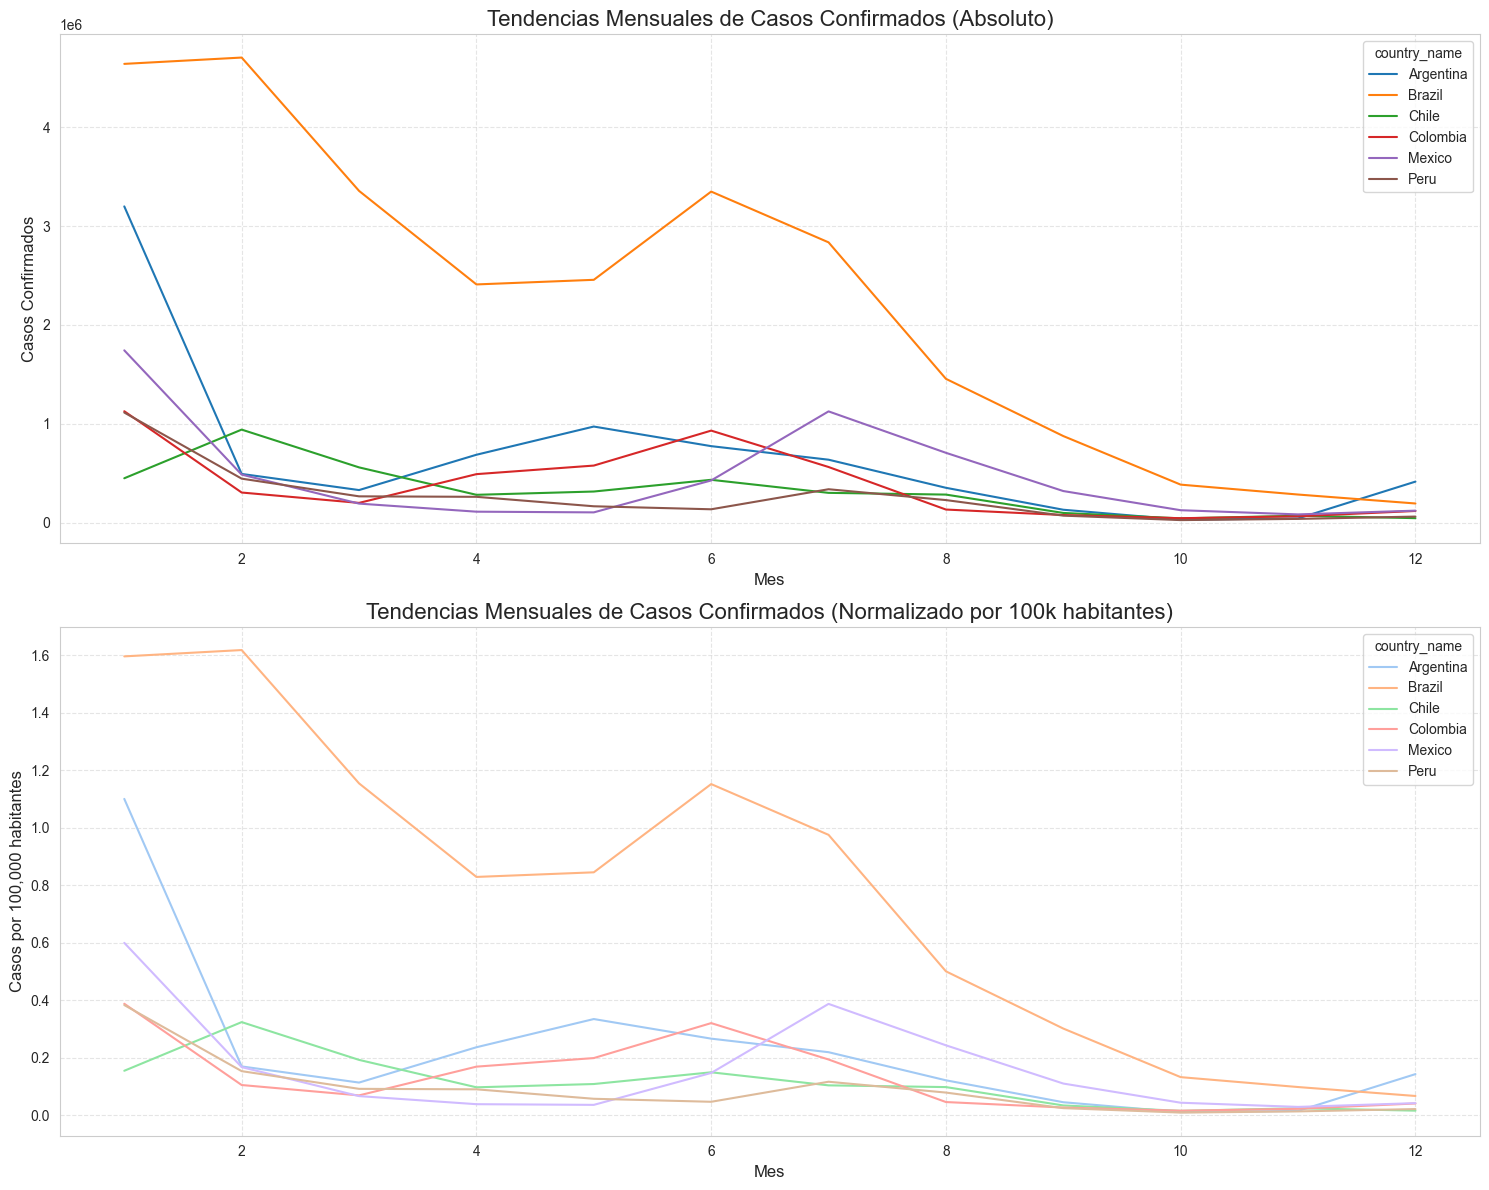

In [106]:
# Asegurarse de que la columna 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'])

# Crear columna 'month' si no existe
data_final['month'] = data_final['date'].dt.month

# Agrupar por país y mes para calcular la suma de casos confirmados y normalizados
casos_por_mes_pais = data_final.groupby(['country_name', 'month']).agg(
    total_cases=('new_confirmed', 'sum'),
    cases_per_100k=('new_confirmed', lambda x: (x.sum() / data_final['population'].sum()) * 100000)
).reset_index()

# Crear el gráfico de casos confirmados (absolutos y normalizados)
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Colores personalizados para diferenciar valores absolutos y normalizados
palette_absoluto = sns.color_palette("tab10", n_colors=len(casos_por_mes_pais['country_name'].unique()))
palette_normalizado = sns.color_palette("pastel", n_colors=len(casos_por_mes_pais['country_name'].unique()))

# Casos confirmados (absoluto)
sns.lineplot(
    data=casos_por_mes_pais, x='month', y='total_cases', hue='country_name',
    palette=palette_absoluto, ax=axes[0]
)
axes[0].set_title('Tendencias Mensuales de Casos Confirmados (Absoluto)', fontsize=16)
axes[0].set_xlabel('Mes', fontsize=12)
axes[0].set_ylabel('Casos Confirmados', fontsize=12)
axes[0].grid(alpha=0.5, linestyle='--')

# Casos confirmados (normalizado por 100,000 habitantes)
sns.lineplot(
    data=casos_por_mes_pais, x='month', y='cases_per_100k', hue='country_name',
    palette=palette_normalizado, ax=axes[1]
)
axes[1].set_title('Tendencias Mensuales de Casos Confirmados (Normalizado por 100k habitantes)', fontsize=16)
axes[1].set_xlabel('Mes', fontsize=12)
axes[1].set_ylabel('Casos por 100,000 habitantes', fontsize=12)
axes[1].grid(alpha=0.5, linestyle='--')

# Ajustar diseño
plt.tight_layout()
plt.show()


#### Dosis acumulada por pais


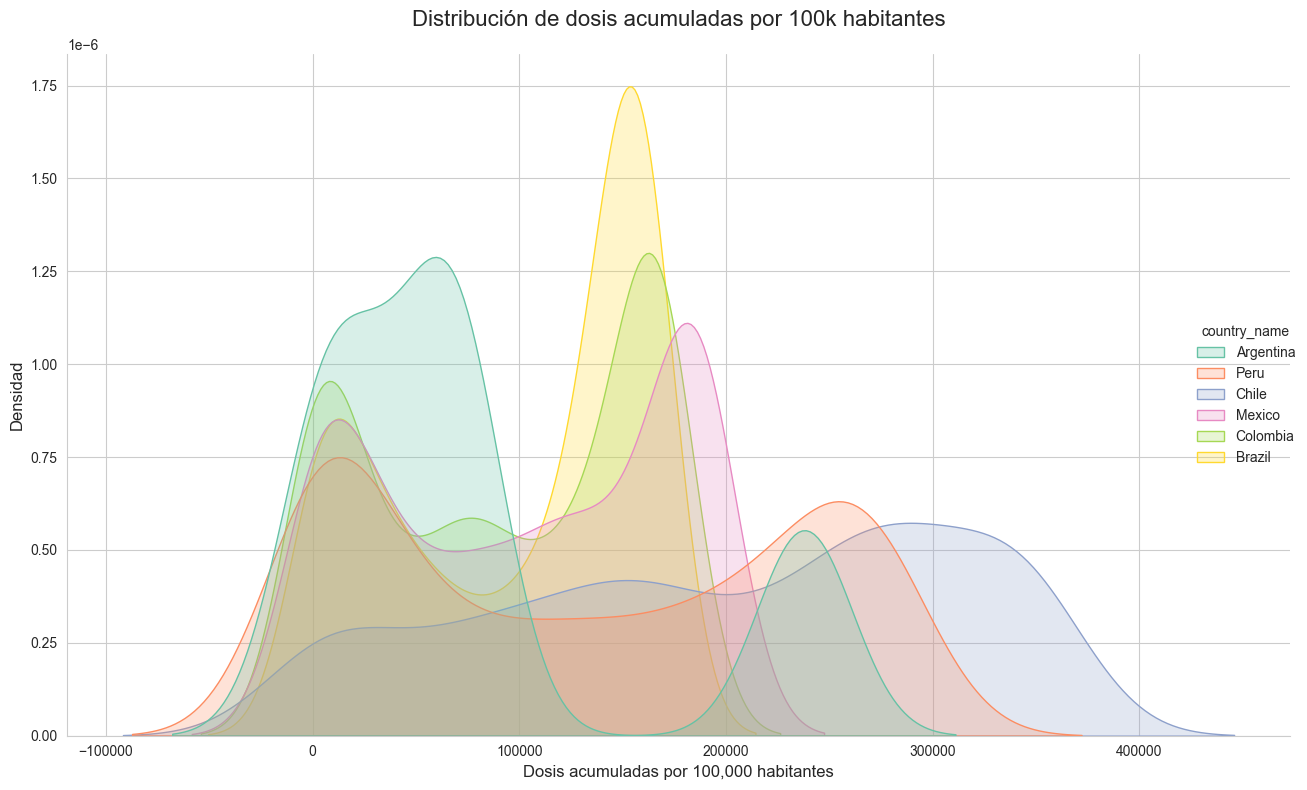

In [107]:
# Asegurarte de que las columnas necesarias existen
if 'population' in data_final.columns and 'cumulative_vaccine_doses_administered' in data_final.columns:
    # Crear la columna 'vaccine_doses_per_100k' si no existe
    data_final['vaccine_doses_per_100k'] = (
        data_final['cumulative_vaccine_doses_administered'] / data_final['population']
    ) * 100000
else:
    raise KeyError("Las columnas 'population' o 'cumulative_vaccine_doses_administered' no existen en el DataFrame.")

# Filtrar los datos para eliminar valores negativos (en caso de que existan errores)
data_filtrada = data_final[data_final['vaccine_doses_per_100k'] >= 0]

# Gráfico KDE de la distribución de las dosis acumuladas normalizadas por país (dosis por 100k habitantes)
sns.displot(
    data=data_filtrada,  # Usar los datos filtrados
    x='vaccine_doses_per_100k',
    hue='country_name',
    kind='kde',
    fill=True,
    height=8,
    aspect=1.5,
    palette='Set2'
)

# Mejorar el gráfico
plt.title('Distribución de dosis acumuladas por 100k habitantes', fontsize=16, pad=20)
plt.xlabel('Dosis acumuladas por 100,000 habitantes', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Este gráfico muestra la **distribución de dosis acumuladas de vacunas por cada 100,000 habitantes** en diferentes países, reflejando patrones y estrategias de vacunación.

 Puntos clave:
1. **Chile lidera en vacunación relativa:**
   - Su distribución se concentra en valores altos (300,000-400,000), indicando una estrategia sólida y uniforme.

2. **Brasil tiene una cobertura intermedia:**
   - Un pico alrededor de 150,000-200,000 dosis refleja consistencia en la vacunación, aunque menor en comparación con Chile.

3. **Otros países muestran coberturas más bajas:**
   - Argentina, México, Colombia y Perú tienen distribuciones en valores menores a 200,000 dosis, indicando menor alcance o disparidades en la estrategia.

4. **Variabilidad en estrategias:**
   - Chile y Brasil presentan distribuciones más compactas, mientras otros países tienen mayor dispersión, reflejando diferencias en logística o implementación.


Conclusión:
Chile destaca por su cobertura amplia y uniforme, mientras que otros países enfrentaron desafíos que limitaron su alcance. La revisión de datos y el aprendizaje de estrategias exitosas como las de Chile podrían ayudar a mejorar futuras campañas de vacunación.

#### Violinplot

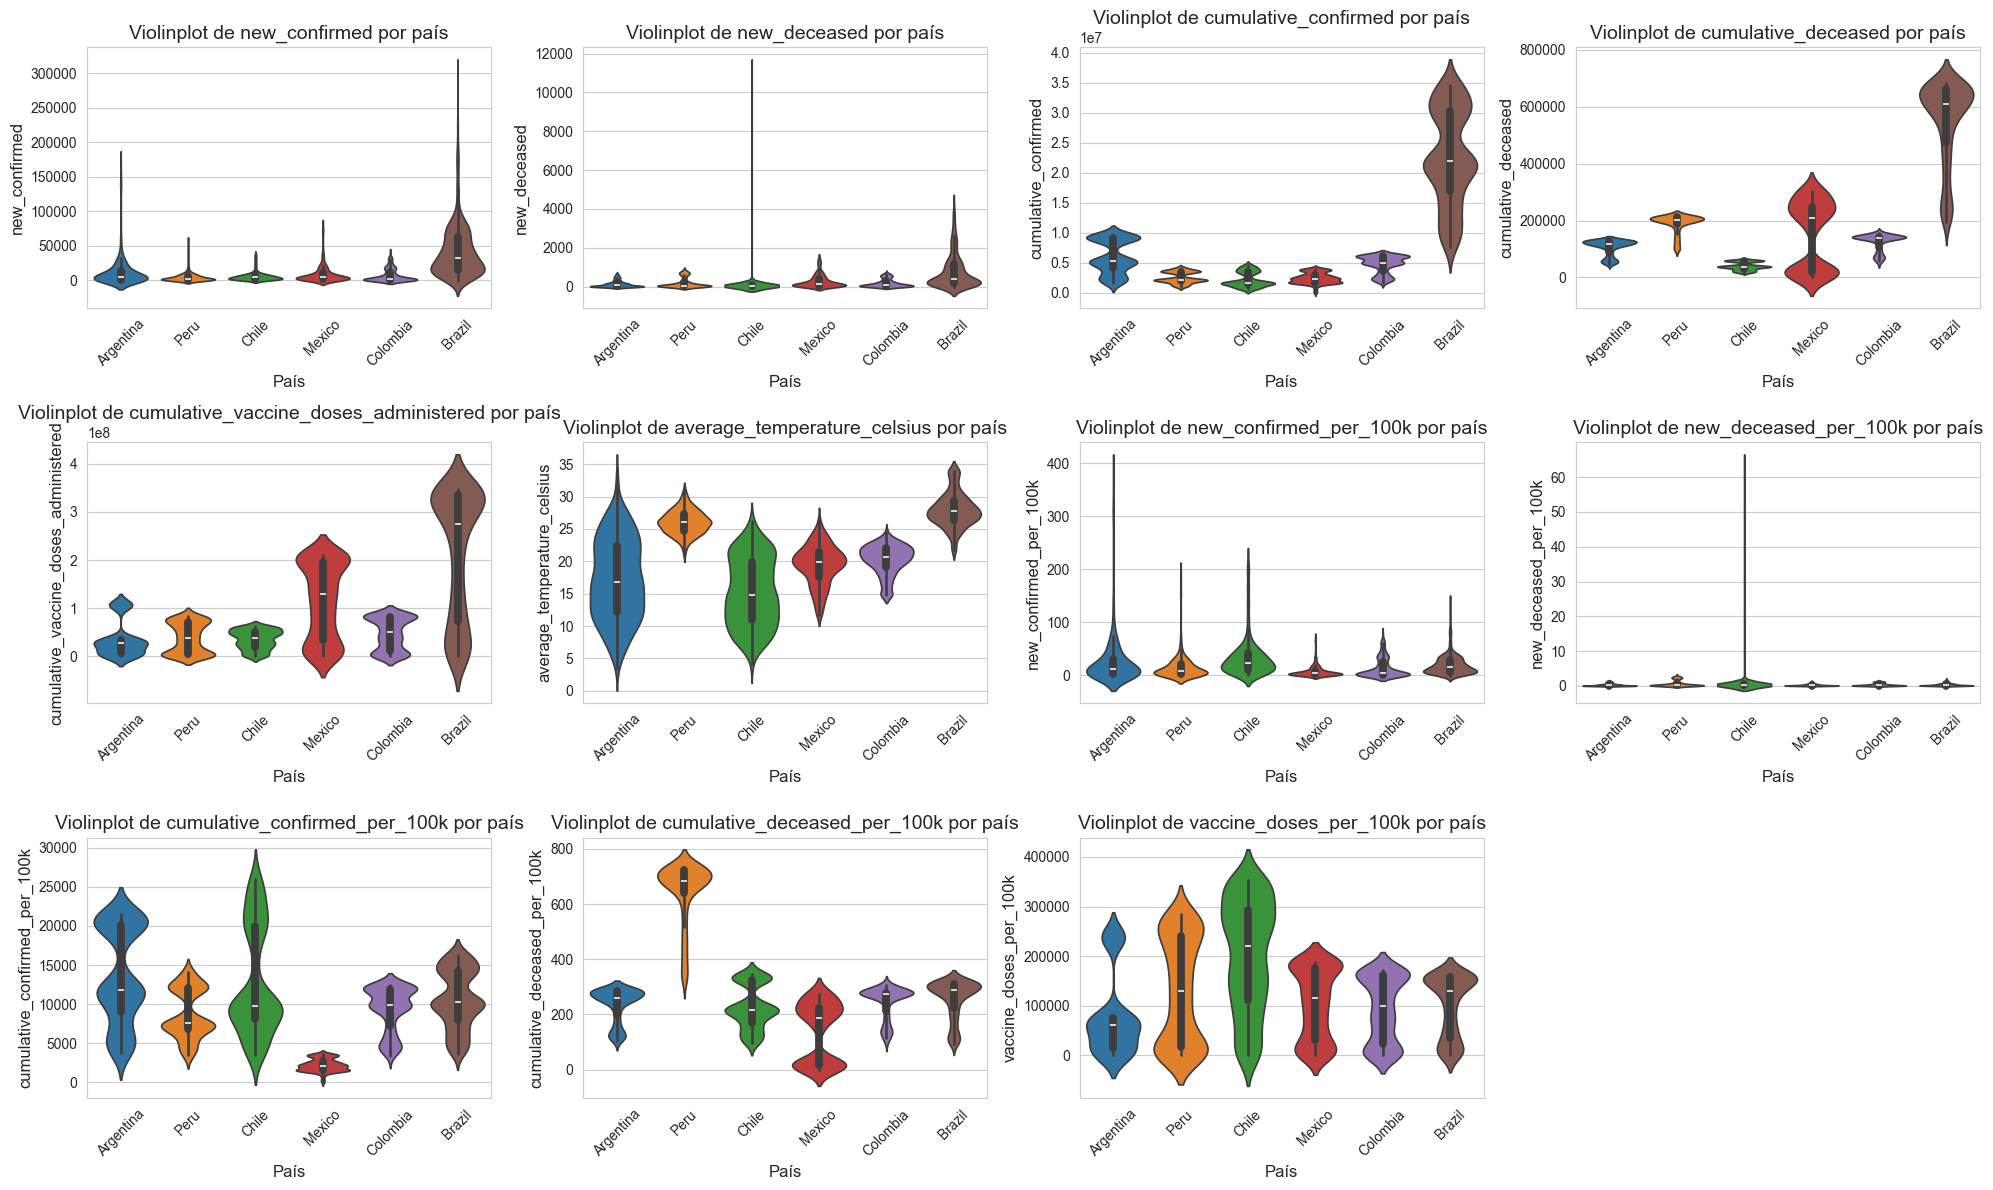

In [108]:

# Normalización de las variables relacionadas con COVID-19
data_final['new_confirmed_per_100k'] = data_final['new_confirmed'] / data_final['population'] * 100000
data_final['new_deceased_per_100k'] = data_final['new_deceased'] / data_final['population'] * 100000
data_final['cumulative_confirmed_per_100k'] = data_final['cumulative_confirmed'] / data_final['population'] * 100000
data_final['cumulative_deceased_per_100k'] = data_final['cumulative_deceased'] / data_final['population'] * 100000
data_final['vaccine_doses_per_100k'] = data_final['cumulative_vaccine_doses_administered'] / data_final['population'] * 100000

# Lista de variables originales y normalizadas
variables_interes = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius',
    'new_confirmed_per_100k', 'new_deceased_per_100k', 'cumulative_confirmed_per_100k', 'cumulative_deceased_per_100k', 'vaccine_doses_per_100k'
]

# Crear una figura con una cuadrícula para los gráficos (por ejemplo, 3 filas y 4 columnas para abarcar todas las variables)
num_filas = 3
num_columnas = 4
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
axes = axes.flatten()  # Aplanar los ejes para acceder fácilmente en un bucle

# Bucle sobre las variables de interés para crear los gráficos de violín
for i, variable in enumerate(variables_interes):
    sns.violinplot(x='country_name', y=variable, data=data_final, ax=axes[i], hue='country_name', legend=False)
    
    # Título y rotación de etiquetas
    axes[i].set_title(f'Violinplot de {variable} por país', fontsize=14)
    axes[i].set_xlabel('País', fontsize=12)
    axes[i].set_ylabel(variable, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar cualquier gráfico vacío si hay más ejes que variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



- **Chile y Perú**: Ambos países se destacan en términos de casos y muertes acumuladas por cada 100,000 habitantes, lo que sugiere un alto impacto de la pandemia relativo a su población. La alta cobertura de vacunación en Chile también es notable, lo cual pudo haber ayudado a mitigar los efectos de la pandemia en etapas posteriores.
- **Brasil**: Aunque tiene altos valores en las métricas absolutas debido a su gran población, sus tasas normalizadas muestran una menor variabilidad en comparación con otros países, lo que podría indicar una propagación más uniforme de COVID-19 en el tiempo.
- **Temperatura**: Las variaciones de temperatura media en diferentes países pueden aportar contexto al análisis de cómo las condiciones climáticas pudieron haber influido en la propagación del virus, aunque se necesitarían estudios específicos para establecer una relación clara.

Estos gráficos de violín permiten observar la variabilidad interna de cada métrica dentro de cada país y ofrecen una visión más profunda que las estadísticas globales, permitiendo comparar el impacto relativo de la pandemia y la respuesta de cada país en términos de vacunación y mortalidad.

#### - Distribucion de la poblacion por grupos de edad

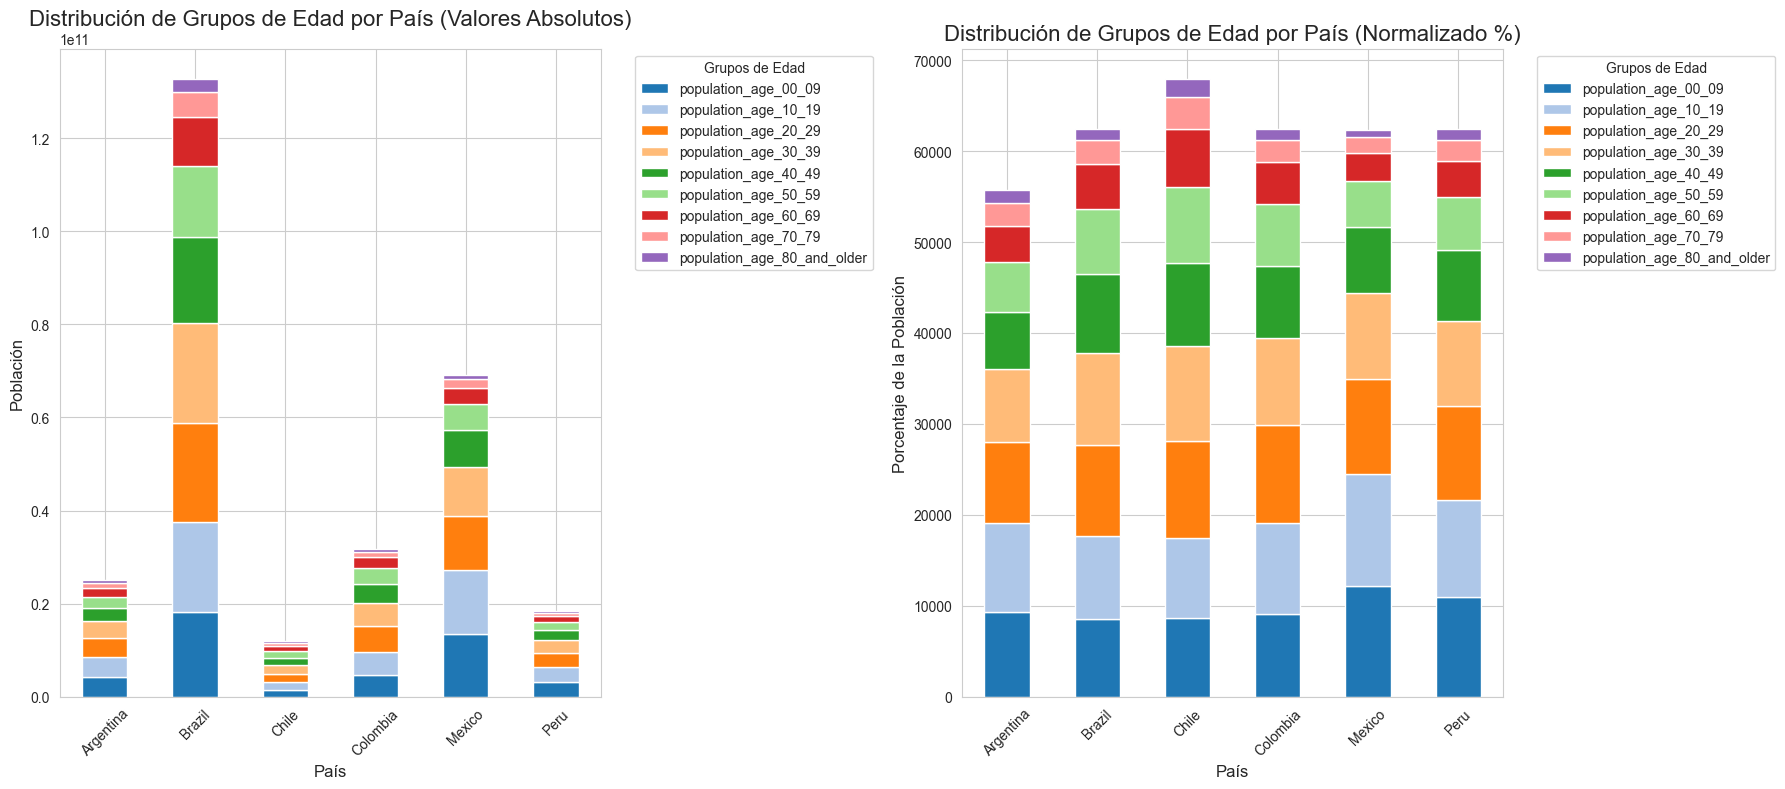

In [109]:

# Definir los grupos de edad
grupos_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 
               'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 
               'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Crear un DataFrame con los valores absolutos y otro con los valores normalizados por grupo de edad para cada país
datos_edad_pais_absoluto = data_final.groupby('country_name')[grupos_edad].sum()

# Crear columnas normalizadas como porcentaje de cada grupo de edad en la población total
for group in grupos_edad:
    data_final[f'{group}_percent'] = (data_final[group] / data_final['population']) * 100

# DataFrame con los valores normalizados
datos_edad_pais_normalizado = data_final.groupby('country_name')[
    [f'{group}_percent' for group in grupos_edad]
].sum()

# Configuración de tamaño de la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Lista de colores para cada grupo de edad
colores = plt.cm.tab20.colors[:len(grupos_edad)]  # Usar una paleta de colores

# Gráfico de barras apiladas con valores absolutos
datos_edad_pais_absoluto.plot(kind='bar', stacked=True, color=colores, ax=ax1)
ax1.set_title('Distribución de Grupos de Edad por País (Valores Absolutos)', fontsize=16)
ax1.set_xlabel('País', fontsize=12)
ax1.set_ylabel('Población', fontsize=12)
ax1.legend(grupos_edad, title="Grupos de Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de barras apiladas con valores normalizados
datos_edad_pais_normalizado.plot(kind='bar', stacked=True, color=colores, ax=ax2)
ax2.set_title('Distribución de Grupos de Edad por País (Normalizado %)', fontsize=16)
ax2.set_xlabel('País', fontsize=12)
ax2.set_ylabel('Porcentaje de la Población', fontsize=12)
ax2.legend(grupos_edad, title="Grupos de Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# Ajustar diseño para evitar solapamiento
plt.tight_layout()
plt.show()



Para decidir en qué países sería relevante expandir la empresa de vacunación, observemos ambos gráficos:

1. **Gráfico de Valores Absolutos (Izquierda)**:
   - **Brasil y México** tienen la mayor cantidad absoluta de personas en todos los grupos de edad, lo que indica una alta demanda potencial en términos de volumen de vacunación.
   - **Argentina** también tiene una población significativa, aunque mucho menor que Brasil y México.

2. **Gráfico Normalizado (Derecha)**:
   - La distribución porcentual de grupos etarios es similar en todos los países, pero Brasil y México aún resaltan debido al alto volumen en términos absolutos.
   - La proporción de personas en grupos de mayor riesgo (por ejemplo, población de más de 60 años) es relevante en todos los países, pero en Brasil y México tendría el mayor impacto por su volumen absoluto.

Recomendación:
- **Brasil** y **México** son los mercados más atractivos para la expansión debido a su alto volumen de población en todos los grupos de edad, especialmente en los grupos de riesgo de 60 años y más.
- **Argentina** podría ser un mercado secundario debido a su tamaño de población intermedio.

Estos datos sugieren que, para maximizar el impacto de vacunación, sería más efectivo enfocar la expansión inicial en Brasil y México, donde se pueden lograr mayores volúmenes de vacunación debido a la cantidad de personas en cada grupo de edad.



0-------------------------------

La elección entre normalizar los datos o usar valores absolutos depende del objetivo del análisis:

1. **Contexto de Estrategia de Vacunación (Valores Absolutos)**
   - **Uso de valores absolutos** es útil cuando se considera la logística, como el número total de vacunas que se deben distribuir. Si el objetivo es evaluar la demanda total de vacunas en cada país, los valores absolutos proporcionan una imagen clara de cuántas dosis se necesitan.
   - Los **valores absolutos** permiten entender mejor la escala del esfuerzo requerido en términos de población total a vacunar en cada país, lo cual es clave para la planificación logística, la distribución y el suministro de vacunas.

2. **Comparación de Necesidades Relativas (Datos Normalizados)**
   - **La normalización** (por ejemplo, por cada 100,000 habitantes) permite una comparación más equitativa entre países con diferentes tamaños de población. Esto es útil para entender la necesidad relativa de vacunación en proporción a la población, independientemente del tamaño total del país.
   - Los datos normalizados pueden ayudar a identificar países donde la proporción de población en ciertos grupos de edad (como adultos mayores) es relativamente más alta, lo cual podría indicar una prioridad mayor para la vacunación en esos grupos.

3. **Perspectiva Combinada**
   - **Usar ambos enfoques** puede ser la mejor opción para una planificación integral. Los valores absolutos proporcionan una visión de la magnitud total de la vacunación necesaria, mientras que los datos normalizados ayudan a identificar qué países o grupos de edad tienen mayores necesidades relativas.
   - Por ejemplo, si un país tiene una alta proporción de adultos mayores (según datos normalizados) y también tiene una gran población (según datos absolutos), podría ser una prioridad en términos de impacto de la vacunación.

Recomendación
En este caso, si el objetivo es expandir una empresa de vacunación:
   - **Comienza con valores absolutos** para planificar la cantidad total de dosis y los recursos logísticos necesarios para cada país.
   - Luego, **usa datos normalizados** para priorizar países donde ciertos grupos de riesgo representan un porcentaje significativo de la población, optimizando así los esfuerzos de vacunación en términos de impacto.

En resumen, ambos enfoques son valiosos y complementarios. Los valores absolutos ayudan en la planificación de recursos, mientras que los datos normalizados permiten una priorización más estratégica en función de las necesidades relativas.

#### - Mapa de calor de Métricas por país


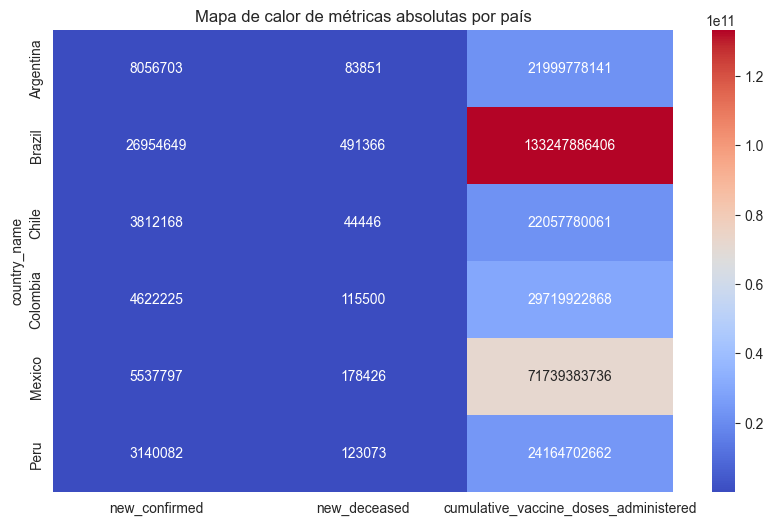

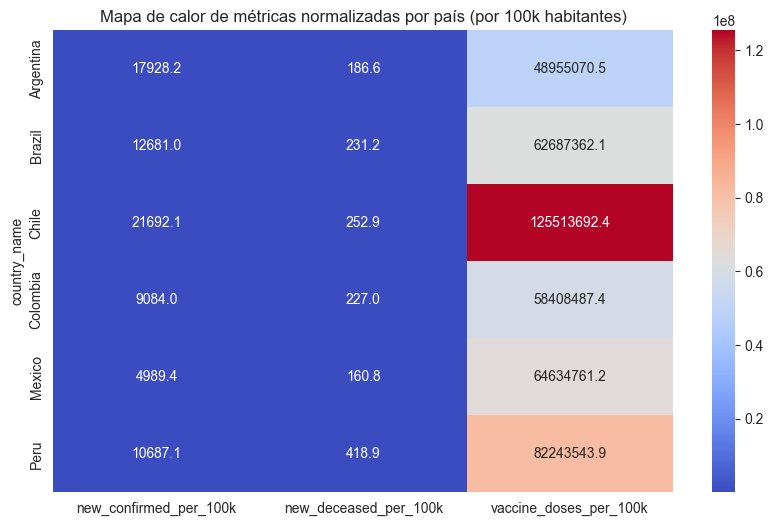

In [110]:
# Crear datos de heatmap con valores absolutos
heatmap_data_absolute = data_final.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum',
    'cumulative_vaccine_doses_administered': 'sum'
})

# Crear datos de heatmap con valores normalizados por cada 100k habitantes
heatmap_data_normalized = data_final.groupby('country_name').agg({
    'new_confirmed_per_100k': 'sum',
    'new_deceased_per_100k': 'sum',
    'vaccine_doses_per_100k': 'sum'
})

# Gráfico de heatmap con valores absolutos
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_absolute, annot=True, cmap="coolwarm", fmt=".0f")
plt.title('Mapa de calor de métricas absolutas por país')
plt.show()

# Gráfico de heatmap con valores normalizados por cada 100k habitantes
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_normalized, annot=True, cmap="coolwarm", fmt=".1f")
plt.title('Mapa de calor de métricas normalizadas por país (por 100k habitantes)')
plt.show()


Para una posible expansión de una empresa de vacunación contra el COVID-19, considerando los mapas de calor de métricas absolutas y normalizadas, se pueden destacar los siguientes insights:

1. **Demanda Potencial de Vacunas**:
   - **Chile y Brasil** tienen un alto número de dosis administradas acumuladas tanto en términos absolutos como normalizados. Esto indica un buen avance en la vacunación, pero también una alta demanda en relación con la población, especialmente en Chile, donde el porcentaje de vacunación por cada 100,000 habitantes es muy alto.
   - **Perú**, por otro lado, presenta una tasa relativamente alta de mortalidad (new_deceased_per_100k) en la métrica normalizada, lo cual podría indicar una demanda importante en términos de necesidad de aumentar la cobertura de vacunación.

2. **Prioridad de Expansión Basada en Necesidades de Salud Pública**:
   - **Perú y Colombia** presentan una mayor mortalidad por cada 100,000 habitantes comparado con otros países, lo cual sugiere que la expansión en estos países podría tener un impacto positivo en reducir la mortalidad, ya que podrían necesitar mayor cobertura de vacunación.
   - En **México**, aunque la mortalidad relativa es menor, la dosis acumulada de vacunas es relativamente baja en relación con su población, lo cual también puede representar una oportunidad de expansión.

3. **Estrategia para Alta Cobertura**:
   - **Brasil y Chile** tienen la mayor cobertura de dosis por cada 100,000 habitantes, lo que significa que cualquier estrategia de expansión debe enfocarse en mantener o cubrir los grupos de edad que aún no han sido totalmente vacunados. En estos países, la estrategia puede ser ofrecer vacunas de refuerzo o nuevos servicios relacionados.

4. **Comparación Absoluta vs. Normalizada**:
   - En el mapa de calor de valores absolutos, Brasil destaca por su gran cantidad de dosis administradas, lo cual podría interpretarse como una buena respuesta a la vacunación.
   - Sin embargo, el análisis de valores normalizados revela que otros países, como **Chile y Perú**, también enfrentan grandes necesidades a nivel de mortalidad y casos confirmados, indicando que el análisis normalizado es útil para entender las demandas relativas.

**Conclusión**:  
La expansión de la empresa debería priorizar países como **Perú, Colombia y México**, donde la cobertura de vacunación podría mejorar, y donde existe una necesidad de reducir la mortalidad relativa. Además, continuar con campañas de refuerzo en **Brasil y Chile** sería útil para consolidar la cobertura en estos países con alta demanda de vacunación.

#### - Matriz de correlación de indicadores demográficos y de salud.


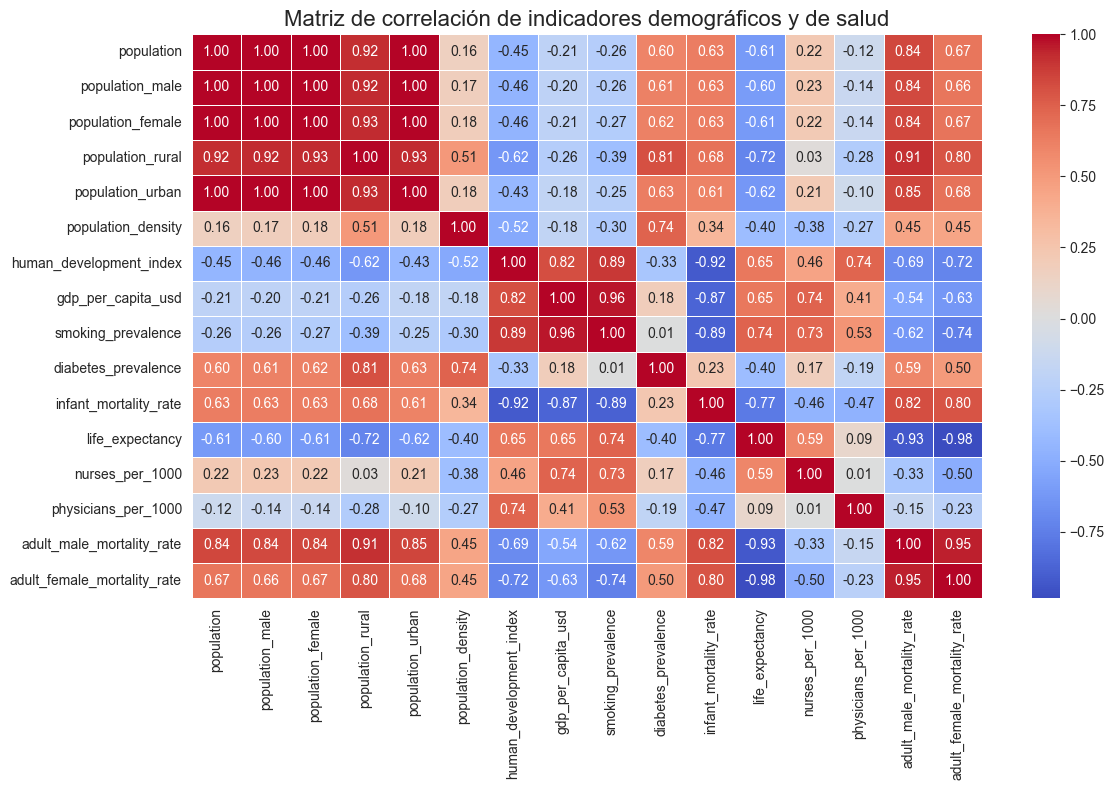

In [111]:
# Seleccionar columnas de indicadores demográficos y de salud
indicadores = [
    'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 
    'population_density', 'human_development_index', 'gdp_per_capita_usd', 'smoking_prevalence', 
    'diabetes_prevalence', 'infant_mortality_rate', 'life_expectancy', 'nurses_per_1000', 
    'physicians_per_1000', 'adult_male_mortality_rate', 'adult_female_mortality_rate'
]

# Filtrar el dataframe con solo los indicadores seleccionados
indicadores_data = data_final[indicadores]

# Calcular la matriz de correlación
correlacion_indicadores = indicadores_data.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_indicadores, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título
plt.title('Matriz de correlación de indicadores demográficos y de salud', fontsize=16)

# Mostrar gráfico
plt.tight_layout()
plt.show()


 El mapa de correlación de indicadores demográficos y de salud revela relaciones importantes, como la alta correlación entre variables poblacionales, una fuerte correlación negativa entre la mortalidad infantil y la esperanza de vida (-0.77), y una relación positiva entre el índice de desarrollo humano (HDI) y la esperanza de vida (0.82). También destaca que la prevalencia de diabetes y el tabaquismo están correlacionados (0.74), mientras que la tasa de mortalidad masculina y femenina muestran una fuerte correlación (0.95), indicando que ambos géneros son afectados de manera similar por los factores de mortalidad. Estos hallazgos subrayan la importancia de mejorar los servicios de salud y abordar enfermedades no transmisibles para mejorar la calidad de vida.
 
Para analizar los insights relevantes para la expansión de una empresa de salud o vacunación basados en la matriz de correlación, es útil observar cómo ciertos indicadores demográficos y de salud están relacionados entre sí, lo que podría influir en la estrategia de intervención en diferentes países. Aquí algunos puntos destacados:

1. **Población y Densidad de Población**:
   - Existe una alta correlación entre la población total, población masculina y femenina, y la densidad de población. Esto indica que los países con poblaciones más grandes suelen tener también áreas densamente pobladas.
   - La expansión en áreas de alta densidad podría mejorar la eficiencia de los esfuerzos de vacunación, permitiendo un mayor alcance en menos tiempo.

2. **Índice de Desarrollo Humano (HDI)**:
   - El HDI tiene una correlación negativa con la mortalidad infantil y mortalidad adulta, y una correlación positiva con la esperanza de vida, lo cual es esperable.
   - Esto sugiere que los países con un bajo HDI pueden ser buenos objetivos para intervenciones de salud, ya que suelen presentar mayores tasas de mortalidad y menor esperanza de vida, mostrando una mayor necesidad de mejorar el acceso a la salud.

3. **Prevalencia de Diabetes y Mortalidad**:
   - Existe una correlación positiva entre la prevalencia de diabetes y las tasas de mortalidad (tanto masculina como femenina). Esto sugiere que las poblaciones con alta prevalencia de diabetes pueden ser más vulnerables.
   - Para una empresa de salud, estas áreas pueden representar un enfoque prioritario, ya que las personas con diabetes son particularmente susceptibles a complicaciones graves por enfermedades infecciosas, como el COVID-19.

4. **Recursos de Salud (enfermeras y médicos por 1000 habitantes)**:
   - Los países con mayor densidad de recursos de salud, como médicos y enfermeras, tienden a tener menores tasas de mortalidad y mayor esperanza de vida.
   - Esto indica que los países con menos recursos de salud podrían beneficiarse más de la expansión de servicios de salud o vacunación, ya que enfrentan mayores desafíos de mortalidad.

5. **Expectativa de Vida y Mortalidad Infantil**:
   - La esperanza de vida está fuertemente correlacionada de forma negativa con la mortalidad infantil. Esto indica que los países con alta mortalidad infantil tienen menor esperanza de vida.
   - Los países con alta mortalidad infantil pueden ser objetivos clave para reducir la carga de enfermedades y mejorar la calidad de vida general.

Recomendaciones para Expansión:
- **Enfoque en Países con Bajo HDI**: Los países con bajo índice de desarrollo humano, alta mortalidad infantil y adulta, y menor expectativa de vida representan áreas donde una empresa de salud podría tener un impacto significativo en la mejora de los indicadores de salud.
- **Priorizar Áreas de Alta Densidad y Baja Cobertura de Salud**: Los países con alta densidad de población y bajos recursos de salud, como personal médico insuficiente, son adecuados para intervenciones que puedan incrementar rápidamente el acceso a la atención y vacunación.
- **Enfocar en Enfermedades Crónicas como la Diabetes**: Las poblaciones con alta prevalencia de diabetes y enfermedades crónicas deberían ser prioridad, ya que estas condiciones agravan el riesgo de complicaciones por enfermedades infecciosas.

Este análisis sugiere que una empresa de salud debe priorizar su expansión en países con alta densidad de población, bajos indicadores de desarrollo humano, y alta prevalencia de condiciones de salud crónicas para maximizar el impacto de sus esfuerzos.

#### - Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.


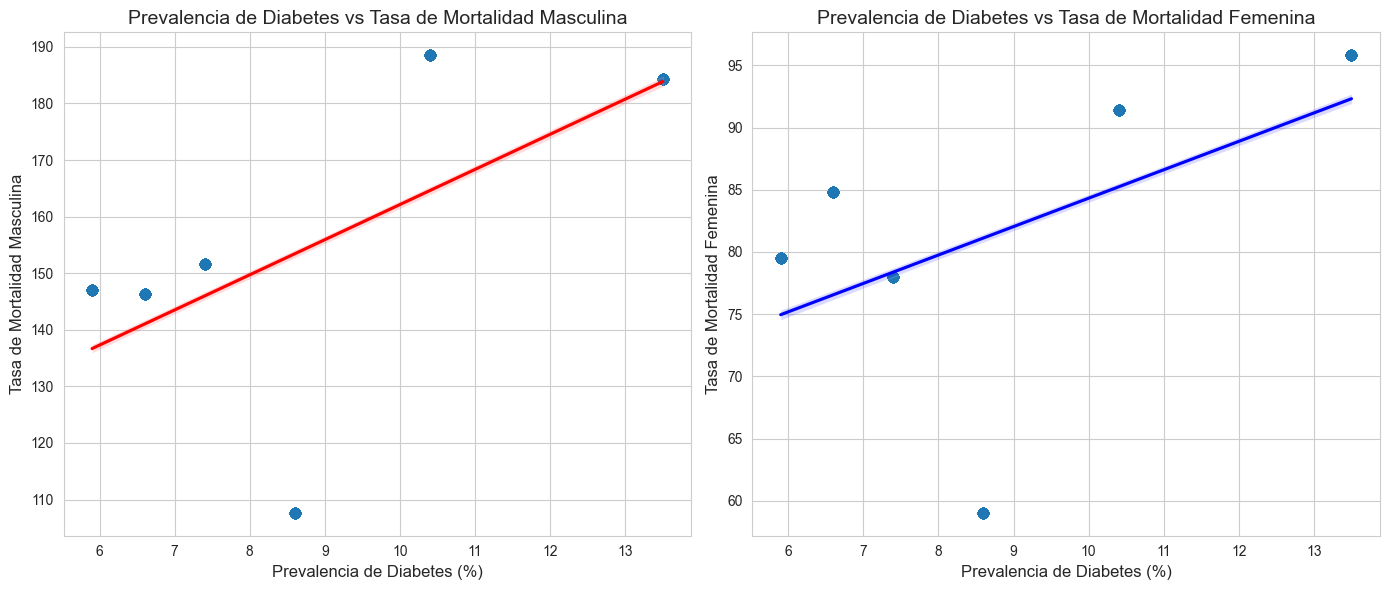

In [112]:

# Crear una figura con 2 gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión para Diabetes vs. Mortalidad masculina
sns.regplot(x='diabetes_prevalence', y='adult_male_mortality_rate', data=data_final, ax=axes[0], scatter_kws={'s':50}, line_kws={'color':'red'})
axes[0].set_title('Prevalencia de Diabetes vs Tasa de Mortalidad Masculina', fontsize=14)
axes[0].set_xlabel('Prevalencia de Diabetes (%)', fontsize=12)
axes[0].set_ylabel('Tasa de Mortalidad Masculina', fontsize=12)

# Gráfico de dispersión para Diabetes vs. Mortalidad femenina
sns.regplot(x='diabetes_prevalence', y='adult_female_mortality_rate', data=data_final, ax=axes[1], scatter_kws={'s':50}, line_kws={'color':'blue'})
axes[1].set_title('Prevalencia de Diabetes vs Tasa de Mortalidad Femenina', fontsize=14)
axes[1].set_xlabel('Prevalencia de Diabetes (%)', fontsize=12)
axes[1].set_ylabel('Tasa de Mortalidad Femenina', fontsize=12)

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Los gráficos de dispersión con líneas de regresión que comparan la **prevalencia de diabetes** con la **tasa de mortalidad masculina y femenina** muestran una correlación positiva en ambos casos, sugiriendo que a medida que aumenta la prevalencia de diabetes, también lo hace la mortalidad, especialmente en hombres, donde la relación es más pronunciada. Estos resultados subrayan el impacto significativo de la diabetes en la mortalidad y sugieren la necesidad de políticas de salud pública enfocadas en su prevención y manejo, particularmente en los países con alta prevalencia de esta enfermedad.
Estos gráficos muestran la relación entre la prevalencia de diabetes y la tasa de mortalidad, desagregada por género (masculino y femenino). Cada punto representa un país, y las líneas de regresión indican la tendencia general en la relación entre estas variables.

Interpretación:
1. **Relación Positiva**: En ambos gráficos, existe una correlación positiva entre la prevalencia de diabetes y la tasa de mortalidad para ambos géneros. Esto significa que a mayor prevalencia de diabetes en una población, se observa una mayor tasa de mortalidad, tanto para hombres como para mujeres. Esto puede indicar que la diabetes es un factor de riesgo que afecta significativamente la mortalidad.

2. **Diferencia entre Géneros**: La pendiente de la línea de regresión es más pronunciada para el gráfico masculino (izquierda) en comparación con el femenino (derecha). Esto podría sugerir que la prevalencia de diabetes tiene un impacto ligeramente mayor en la mortalidad masculina en comparación con la femenina, al menos en los países representados en los datos.

3. **Normalidad de los Datos**: Los datos no siguen una distribución completamente lineal ni uniforme. Hay ciertos puntos que se alejan de la línea de tendencia, especialmente en los extremos de la prevalencia de diabetes, lo que indica variabilidad entre países. Esto sugiere que, aunque exista una correlación, otros factores (como el acceso a la atención médica o diferencias culturales) pueden estar influyendo en la tasa de mortalidad.

4. **Utilidad del Gráfico**: 
   - **Expansión de la Empresa**: Si tu empresa de salud o vacunación está considerando un enfoque específico en enfermedades crónicas, este gráfico es útil. Muestra que en países con alta prevalencia de diabetes, existe una mayor necesidad de intervención para reducir la tasa de mortalidad. La empresa podría priorizar estos países para ofrecer soluciones de salud o programas de manejo de enfermedades crónicas.
   - **Normalidad y Adecuación del Modelo**: Si se busca hacer un análisis predictivo, es posible que los datos no cumplan completamente con los supuestos de normalidad y linealidad debido a la variabilidad observada. Un análisis más avanzado podría requerir un modelo no lineal o ajustarse para otros factores.

En resumen, estos gráficos son útiles para identificar la relación entre diabetes y mortalidad, y pueden guiar la toma de decisiones sobre en qué países expandir la intervención, especialmente en aquellos con alta prevalencia de diabetes.

In [113]:
# Guarda el DataFrame en un archivo CSV manteniendo la columna 'date' como índice
data_final.to_csv('DataFinal.csv', index=True)


### **Avance 3**



In [114]:
# Cargar el archivo CSV
data_final = pd.read_csv('DataFinal.csv')

# Convertir la columna 'date' a formato datetime
data_final['date'] = pd.to_datetime(data_final['date'])

# Crear nuevas columnas para año, semana, día y mes
data_final['year'] = data_final['date'].dt.year  # Extraer el año
data_final['month'] = data_final['date'].dt.month  # Extraer el mes
data_final['month_name'] = data_final['date'].dt.month_name()  # Nombre del mes
data_final['week'] = data_final['date'].dt.isocalendar().week  # Extraer la semana
data_final['day'] = data_final['date'].dt.day  # Extraer el día del mes
data_final['day_of_week'] = data_final['date'].dt.day_name()  # Nombre del día
data_final['day_of_week_num'] = data_final['date'].dt.weekday  # Número del día (lunes=0, domingo=6)

# Mostrar las primeras filas para verificar
data_final.head(5)



Unnamed: 0       date location_key country_code country_name  \
0           0 2021-01-02           AR           AR    Argentina   
1           1 2021-01-02           PE           PE         Peru   
2           2 2021-01-02           CL           CL        Chile   
3           3 2021-01-02           MX           MX       Mexico   
4           4 2021-01-02           CO           CO     Colombia   

   new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0           7767           166               1670634                46688   
1           1695           200               1025025                94333   
2           3338            64                615902                16724   
3           6948           993               1533239               151435   
4          11723           328               1723443                50806   

   cumulative_vaccine_doses_administered  ...  population_age_50_59_percent  \
0                                  20334  ...                      8.705063   
1                                   3762  ...                      9.436318   
2                                   9053  ...                     13.384947   
3                                  43960  ...                      8.072347   
4                                     18  ...                     10.895570   

   population_age_60_69_percent  population_age_70_79_percent  \
0                      6.484946                      4.044524   
1                      6.284168                      3.669152   
2                     10.195668                      5.651109   
3                      4.895608                      2.810489   
4                      7.411840                      3.890819   

   population_age_80_and_older_percent  year  month_name  week  day  \
0                             2.211968  2021     January    53    2   
1                             1.950532  2021     January    53    2   
2                             3.059753  2021     January    53    2   
3                             1.353459  2021     January    53    2   
4                             1.858399  2021     January    53    2   

   day_of_week  day_of_week_num  
0     Saturday                5  
1     Saturday                5  
2     Saturday                5  
3     Saturday                5  
4     Saturday                5  

[5 rows x 77 columns]

#### Análisis de Series Temporales:
##### Analisis del comportamiento de los nuevos casos confirmados de covid 19 por semana y mes

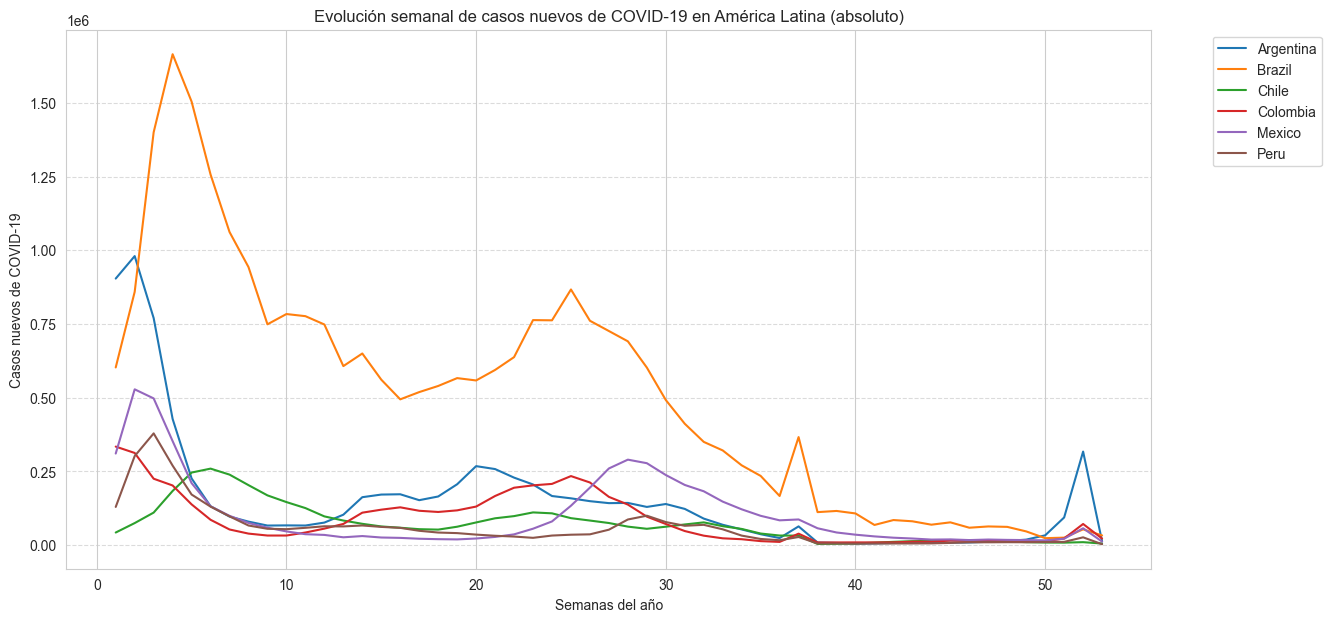

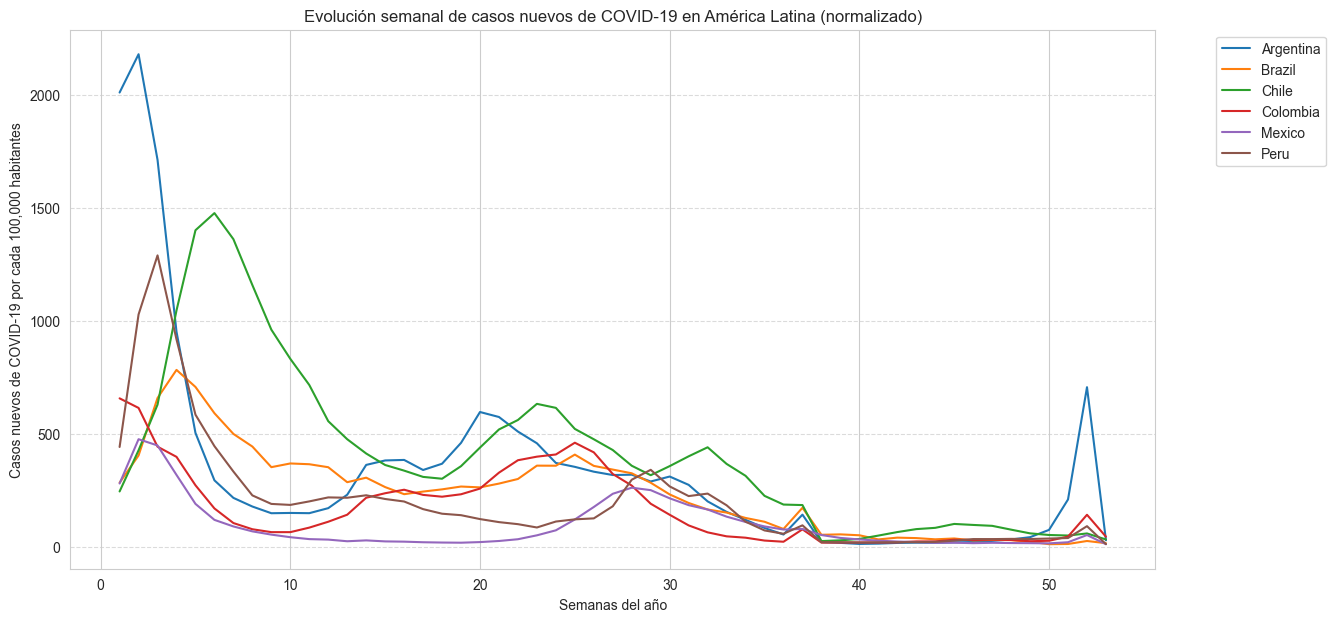

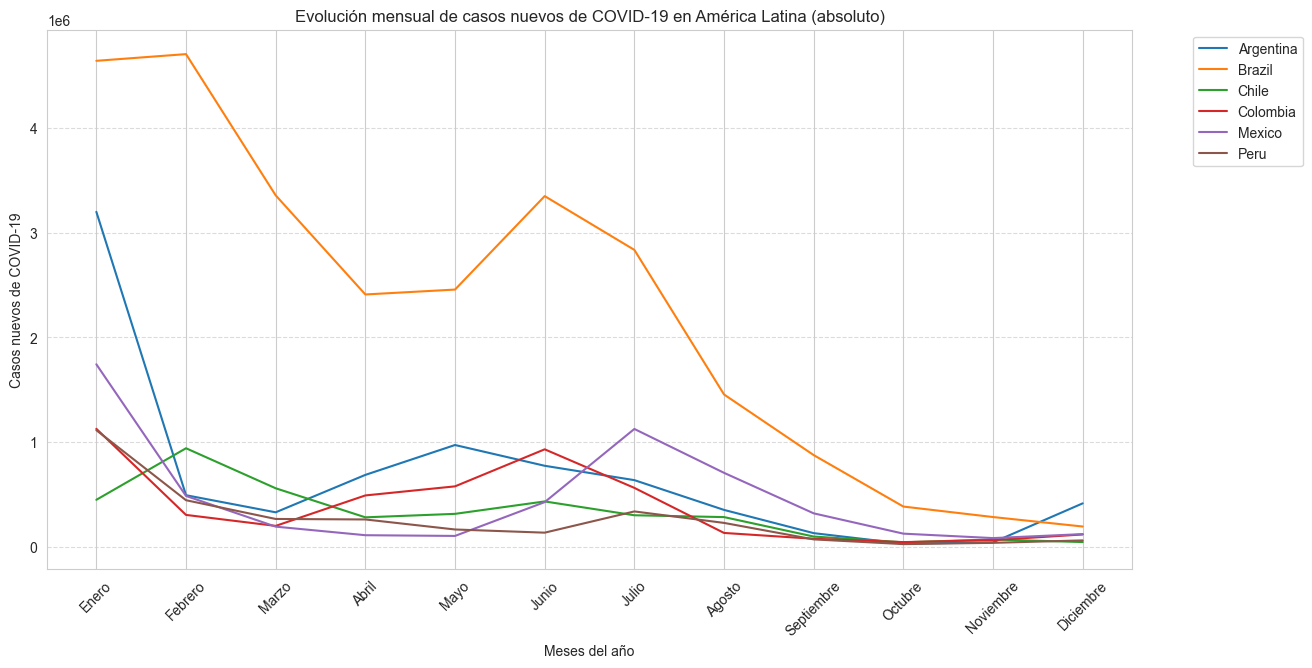

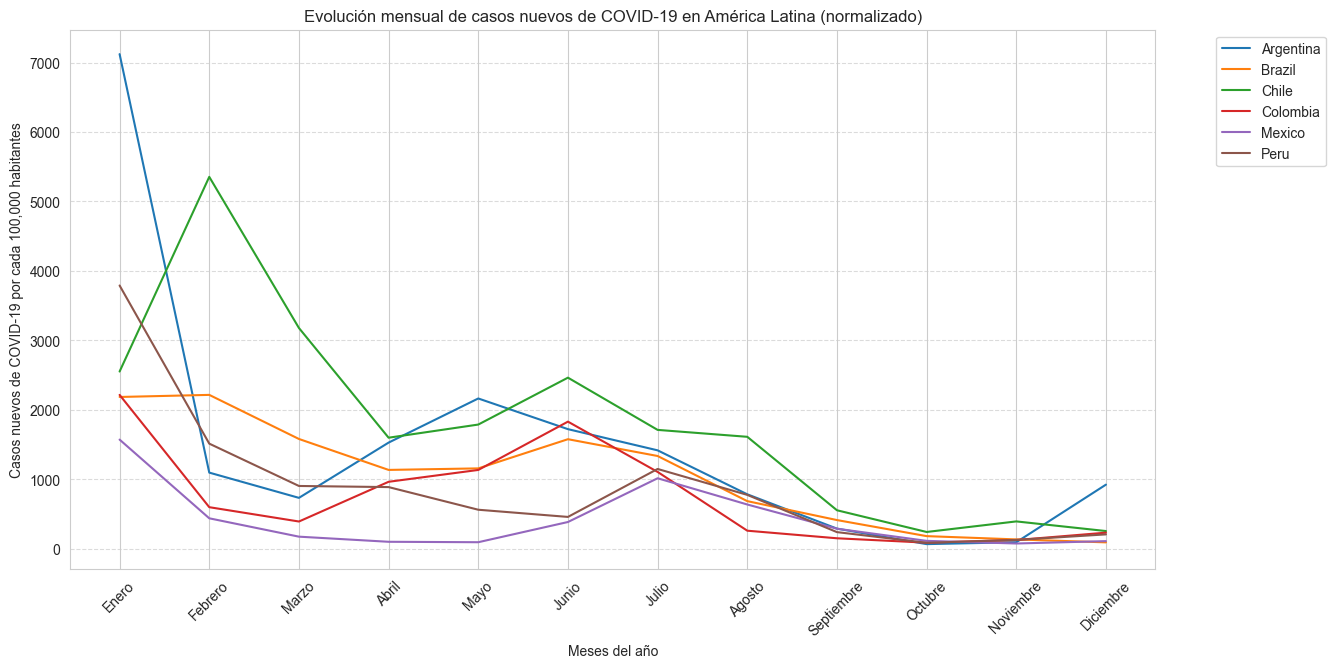

In [115]:

# Cargar los datos y asegurarse de que 'date' sea datetime
data_final['date'] = pd.to_datetime(data_final['date'])

# Calcular casos nuevos normalizados por 100,000 habitantes
data_final['new_confirmed_per_100k'] = (data_final['new_confirmed'] / data_final['population']) * 100000

# Extraer información temporal adicional
data_final['week'] = data_final['date'].dt.isocalendar().week
data_final['month'] = data_final['date'].dt.month

# 1. Análisis semanal de casos absolutos
casos_semanales = data_final.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

# Graficar evolución semanal (absoluto)
plt.figure(figsize=(14, 7))
for pais in casos_semanales['country_name'].unique():
    pais_data = casos_semanales[casos_semanales['country_name'] == pais]
    plt.plot(pais_data['week'], pais_data['new_confirmed'], label=pais)

plt.xlabel('Semanas del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución semanal de casos nuevos de COVID-19 en América Latina (absoluto)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Análisis semanal de casos normalizados
casos_semanales_normalizados = data_final.groupby(['country_name', 'week'])['new_confirmed_per_100k'].sum().reset_index()

# Graficar evolución semanal (normalizado)
plt.figure(figsize=(14, 7))
for pais in casos_semanales_normalizados['country_name'].unique():
    pais_data = casos_semanales_normalizados[casos_semanales_normalizados['country_name'] == pais]
    plt.plot(pais_data['week'], pais_data['new_confirmed_per_100k'], label=pais)

plt.xlabel('Semanas del año')
plt.ylabel('Casos nuevos de COVID-19 por cada 100,000 habitantes')
plt.title('Evolución semanal de casos nuevos de COVID-19 en América Latina (normalizado)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Análisis mensual de casos absolutos
casos_mensuales = data_final.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Graficar evolución mensual (absoluto)
plt.figure(figsize=(14, 7))
for pais in casos_mensuales['country_name'].unique():
    pais_data = casos_mensuales[casos_mensuales['country_name'] == pais]
    plt.plot(pais_data['month'], pais_data['new_confirmed'], label=pais)

plt.xlabel('Meses del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución mensual de casos nuevos de COVID-19 en América Latina (absoluto)')
plt.xticks(range(1, 13), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Análisis mensual de casos normalizados
casos_mensuales_normalizados = data_final.groupby(['country_name', 'month'])['new_confirmed_per_100k'].sum().reset_index()

# Graficar evolución mensual (normalizado)
plt.figure(figsize=(14, 7))
for pais in casos_mensuales_normalizados['country_name'].unique():
    pais_data = casos_mensuales_normalizados[casos_mensuales_normalizados['country_name'] == pais]
    plt.plot(pais_data['month'], pais_data['new_confirmed_per_100k'], label=pais)

plt.xlabel('Meses del año')
plt.ylabel('Casos nuevos de COVID-19 por cada 100,000 habitantes')
plt.title('Evolución mensual de casos nuevos de COVID-19 en América Latina (normalizado)')
plt.xticks(range(1, 13), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Conclusión Resumida

1. **Chile y Perú**:
   - Destacan como los países con mayor incidencia relativa de casos nuevos por 100,000 habitantes. Esto indica una **alta necesidad de vacunas per cápita**, haciendo que sean prioridades clave para la expansión de la compañía.

2. **Brasil**:
   - Lidera en números absolutos, lo que refleja un gran tamaño de mercado. Sin embargo, al normalizar, muestra una **menor incidencia proporcional**. Aun así, su gran población sigue representando una **oportunidad estratégica**.

3. **México y Colombia**:
   - Tienen una incidencia relativa moderada pero constante. Esto podría representar mercados interesantes para estrategias de vacunación sostenida o reforzamiento a mediano y largo plazo.

4. **Recomendación**:
   - Los gráficos **normalizados por semana** son los más relevantes para identificar **prioridades estratégicas** al considerar el impacto relativo en cada país y permitir una distribución más equitativa y eficaz.

Chile y Perú emergen como los focos más prioritarios para una expansión rápida, mientras que Brasil, México y Colombia ofrecen oportunidades estratégicas complementarias.

Columnas disponibles: Index(['Unnamed: 0', 'date', 'location_key', 'country_code', 'country_name',
       'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'population', 'population_male', 'population_female',
       'population_rural', 'population_urban', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older', 'gdp_usd',
       'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'populatio

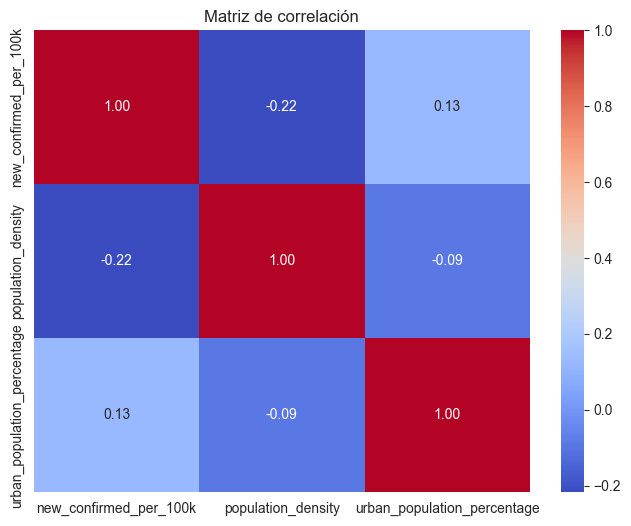

In [116]:
# Asegúrate de que estás cargando el archivo correctamente
data_final = pd.read_csv('DataFinal.csv')

# Verifica las columnas disponibles
print("Columnas disponibles:", data_final.columns)

# Calcula o verifica la existencia de las columnas necesarias
if 'new_confirmed_per_100k' not in data_final.columns:
    data_final['new_confirmed_per_100k'] = (data_final['new_confirmed'] / data_final['population']) * 100000

if 'urban_population_percentage' not in data_final.columns:
    if 'population_urban' in data_final.columns and 'population' in data_final.columns:
        data_final['urban_population_percentage'] = (data_final['population_urban'] / data_final['population']) * 100
    else:
        raise KeyError("Las columnas 'population_urban' y/o 'population' no están presentes para calcular 'urban_population_percentage'.")

# Asegúrate de que la columna population_density existe
if 'population_density' not in data_final.columns:
    raise KeyError("La columna 'population_density' no está presente en el DataFrame.")

# Calcula la matriz de correlación entre las columnas relevantes
cols_to_corr = ['new_confirmed_per_100k', 'population_density', 'urban_population_percentage']
corr_matrix = data_final[cols_to_corr].corr()
print("\nMatriz de correlación:")
print(corr_matrix)

# Visualiza la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


La matriz de correlación muestra cómo las variables seleccionadas están relacionadas entre sí:

1. **new_confirmed_per_100k y population_density**: Correlación negativa moderada (-0.22), lo que sugiere que en áreas con mayor densidad poblacional, los nuevos casos por cada 100k habitantes no aumentan significativamente.
   
2. **new_confirmed_per_100k y urban_population_percentage**: Correlación positiva baja (0.13), lo que indica que la proporción de población urbana tiene un leve impacto en los casos nuevos por 100k habitantes.

3. **population_density y urban_population_percentage**: Correlación negativa muy baja (-0.09), casi inexistente, sugiriendo que estas variables no están muy relacionadas.


Interpretación y pasos sugeridos:

1. **Correlaciones bajas**:
   - Si la correlación es baja o moderada, esto no necesariamente implica una relación causal entre las variables.
   - Puedes explorar más visualizaciones (como gráficos de dispersión) para entender mejor las relaciones entre estas variables.

2. **Investigación adicional**:
   - Investiga otros factores que puedan influir en los nuevos casos confirmados, como medidas gubernamentales, movilidad, vacunación, etc.

3. **Pruebas de significancia**:
   - Para validar la relevancia de estas correlaciones, se podrían realizar pruebas estadísticas (como p-valores).

Si necesitas un análisis más avanzado, como regresiones lineales o clustering basado en estas variables, puedo ayudarte con el código y las interpretaciones.

##### Evolucion de casos por mes

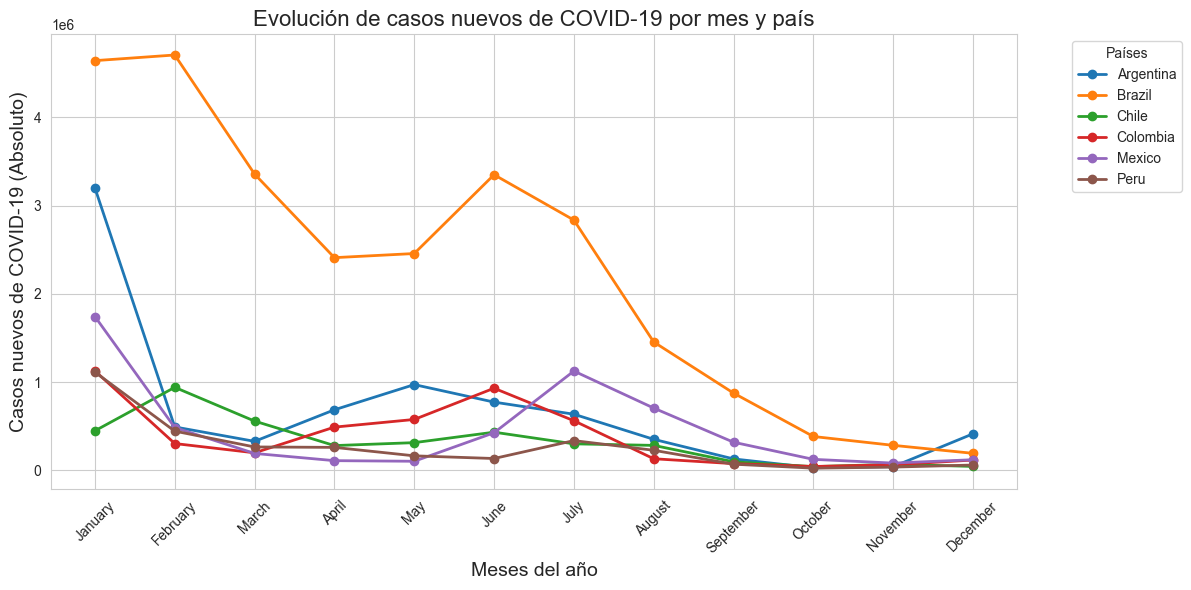

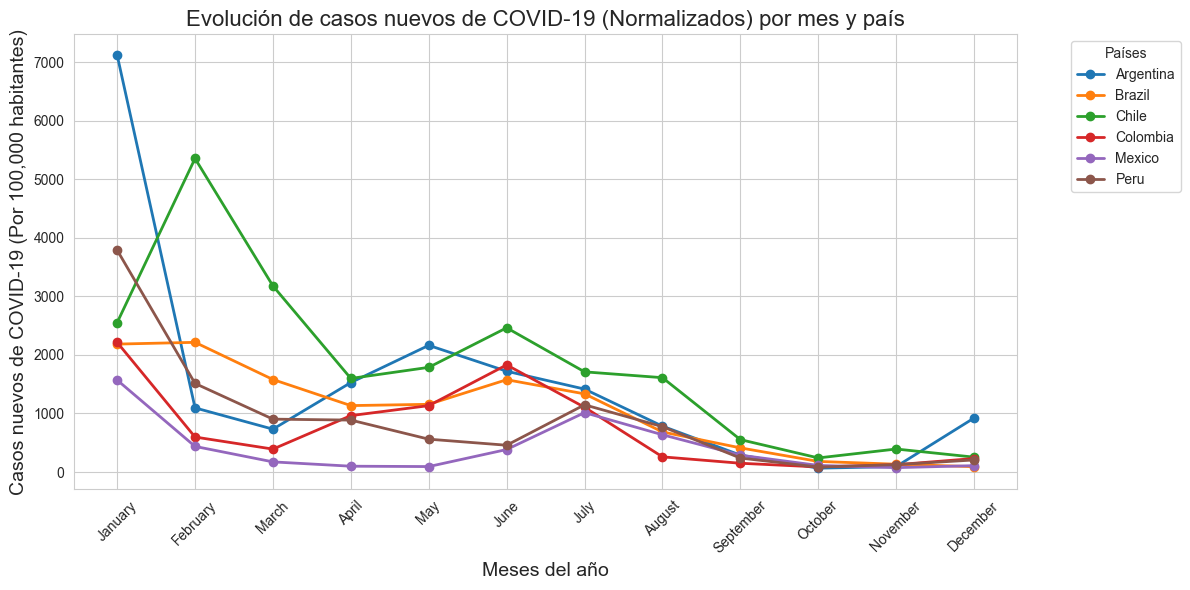

In [117]:
import calendar

# Asegúrate de que la columna de fecha está en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'])

# Crear una columna con el mes
data_final['month'] = data_final['date'].dt.month

# Normalizar casos nuevos por cada 100,000 habitantes
data_final['new_confirmed_per_100k'] = (data_final['new_confirmed'] / data_final['population']) * 100000

# Agrupar por país y mes para calcular la suma de casos nuevos confirmados y normalizados
casos_mensuales_normalizados = data_final.groupby(['country_name', 'month'])[['new_confirmed', 'new_confirmed_per_100k']].sum().reset_index()

# Visualización de valores absolutos
plt.figure(figsize=(12, 6))
for pais in casos_mensuales_normalizados['country_name'].unique():
    pais_data = casos_mensuales_normalizados[casos_mensuales_normalizados['country_name'] == pais]
    plt.plot(
        pais_data['month'], 
        pais_data['new_confirmed'], 
        label=pais, 
        marker='o', 
        linewidth=2
    )
plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:13], rotation=45)
plt.xlabel('Meses del año', fontsize=14)
plt.ylabel('Casos nuevos de COVID-19 (Absoluto)', fontsize=14)
plt.title('Evolución de casos nuevos de COVID-19 por mes y país', fontsize=16)
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualización de valores normalizados
plt.figure(figsize=(12, 6))
for pais in casos_mensuales_normalizados['country_name'].unique():
    pais_data = casos_mensuales_normalizados[casos_mensuales_normalizados['country_name'] == pais]
    plt.plot(
        pais_data['month'], 
        pais_data['new_confirmed_per_100k'], 
        label=pais, 
        marker='o', 
        linewidth=2
    )
plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:13], rotation=45)
plt.xlabel('Meses del año', fontsize=14)
plt.ylabel('Casos nuevos de COVID-19 (Por 100,000 habitantes)', fontsize=14)
plt.title('Evolución de casos nuevos de COVID-19 (Normalizados) por mes y país', fontsize=16)
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insights Resumidos:

1. **Brasil como prioridad**: Tiene el mayor número absoluto de casos, lo que lo convierte en un mercado clave para expansión masiva de vacunas.

2. **Chile y Perú destacados per cápita**: Presentan las tasas más altas de casos nuevos por cada 100,000 habitantes, indicando alta presión sobre sus sistemas de salud y necesidad de estrategias específicas.

3. **Disminución uniforme**: Todos los países muestran una clara reducción de casos hacia fin de año, probablemente reflejando el impacto de la vacunación.

4. **Estacionalidad en Brasil**: Picos a mitad de año sugieren la importancia de planificar campañas antes de los aumentos estacionales.

Recomendaciones:
- **Expandir primero en Brasil** por su gran volumen de casos.
- **Focalizar en Chile y Perú** para abordar las altas tasas per cápita.
- **Planificar por estacionalidad** para maximizar el impacto de las campañas. 

Ambos gráficos son útiles, pero el normalizado ayuda a identificar necesidades proporcionales y dirigir recursos estratégicamente.

##### - Progreso de la vacunacion por pais

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/2832510125.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datos_vacunacion.values, y=datos_vacunacion.index, palette='Blues_r', ax=axes[0])
/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/2832510125.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datos_vacunacion_normalizado.values, y=datos_vacunacion_normalizado.index, palette='Greens_r', ax=axes[1])


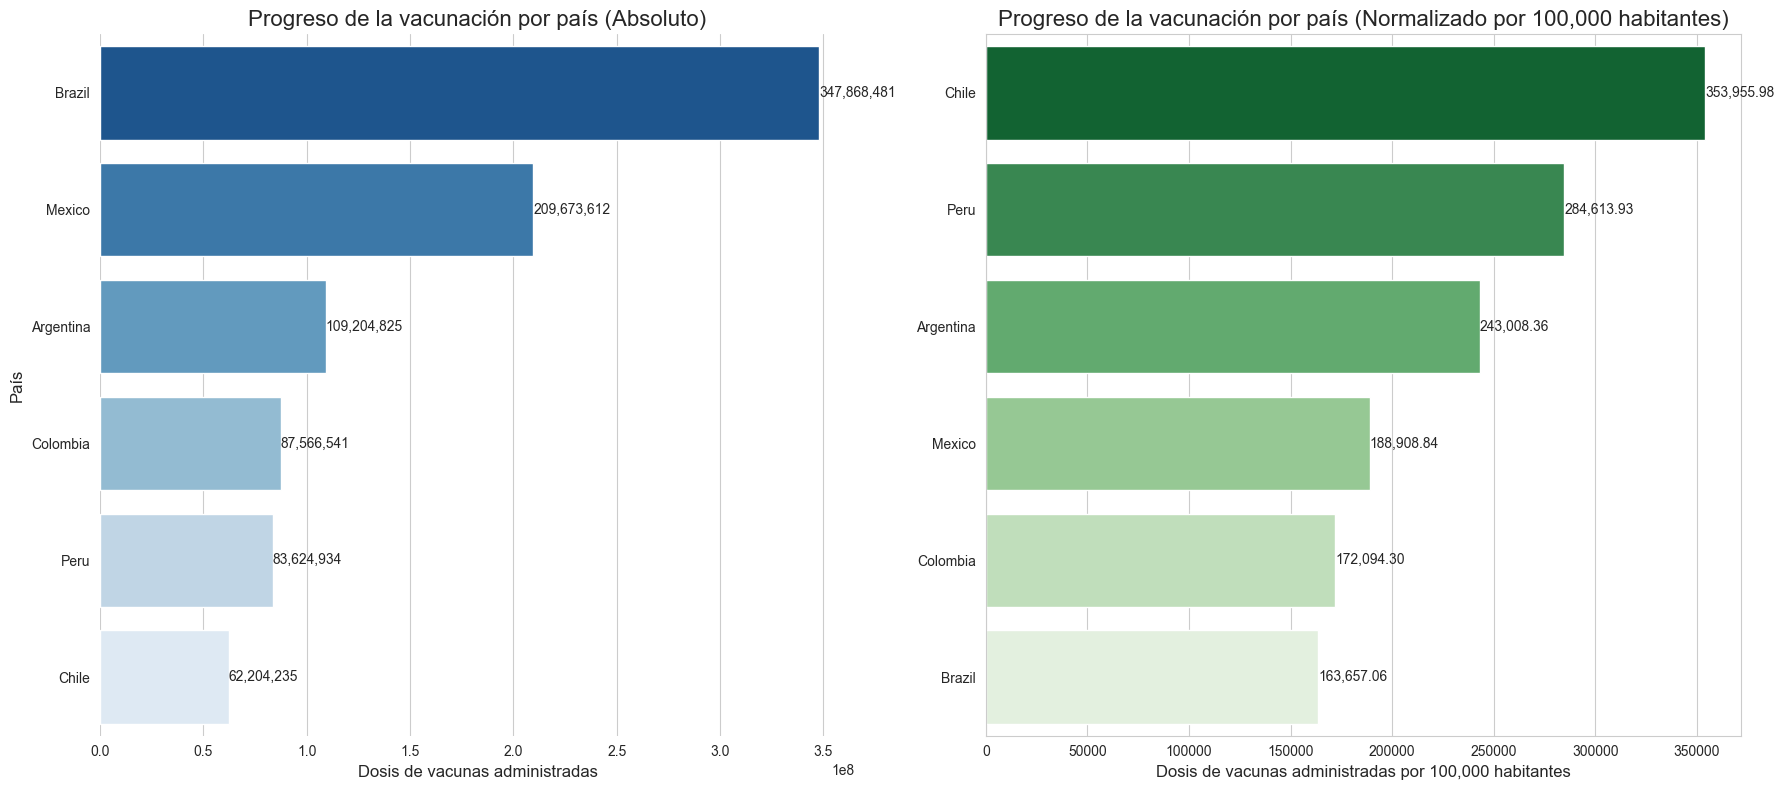

In [118]:
# Calculate the maximum cumulative vaccine doses administered for each country
datos_vacunacion = data_final.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Calculate the normalized maximum vaccine doses administered per 100,000 inhabitants
data_final['vaccine_doses_per_100k'] = (data_final['cumulative_vaccine_doses_administered'] / data_final['population']) * 100000
datos_vacunacion_normalizado = data_final.groupby('country_name')['vaccine_doses_per_100k'].max().sort_values(ascending=False)

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot absolute vaccination data
sns.barplot(x=datos_vacunacion.values, y=datos_vacunacion.index, palette='Blues_r', ax=axes[0])
for index, value in enumerate(datos_vacunacion.values):
    axes[0].text(value, index, f'{int(value):,}', va='center', fontsize=10)
axes[0].set_title('Progreso de la vacunación por país (Absoluto)', fontsize=16)
axes[0].set_xlabel('Dosis de vacunas administradas', fontsize=12)
axes[0].set_ylabel('País', fontsize=12)
sns.despine(left=True, bottom=True, ax=axes[0])

# Plot normalized vaccination data
sns.barplot(x=datos_vacunacion_normalizado.values, y=datos_vacunacion_normalizado.index, palette='Greens_r', ax=axes[1])
for index, value in enumerate(datos_vacunacion_normalizado.values):
    axes[1].text(value, index, f'{value:,.2f}', va='center', fontsize=10)
axes[1].set_title('Progreso de la vacunación por país (Normalizado por 100,000 habitantes)', fontsize=16)
axes[1].set_xlabel('Dosis de vacunas administradas por 100,000 habitantes', fontsize=12)
axes[1].set_ylabel('')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



insights del Progreso de Vacunación:

**Datos de Vacunación Absoluta**
1. **Brasil** lidera en términos absolutos con más de 347 millones de dosis administradas, lo que refleja su gran población y esfuerzos significativos en vacunación.
2. **México** ocupa el segundo lugar con más de 209 millones de dosis, destacando una campaña robusta acorde a su tamaño poblacional.
3. **Argentina**, **Colombia** y **Perú** se encuentran en niveles intermedios, mientras que **Chile** tiene la menor cantidad absoluta de dosis debido a su menor población.

**Datos de Vacunación Normalizada (Por cada 100,000 habitantes)**
1. **Chile** sobresale con más de 353,000 dosis por cada 100,000 habitantes, lo que evidencia una campaña altamente eficiente y amplia en relación con su población.
2. **Perú** sigue con 284,000 dosis por cada 100,000 habitantes, mostrando esfuerzos destacados a pesar de desafíos logísticos.
3. **Argentina** también presenta un buen desempeño en términos normalizados, lo que sugiere un acceso equitativo a la vacunación.
4. **Brasil** y **México**, a pesar de los números absolutos altos, tienen un rango más bajo en términos normalizados debido a sus grandes poblaciones, lo que revela posibles brechas en la cobertura proporcional.

**Comparación**
- **Chile** se posiciona como líder en cobertura proporcional, siendo un modelo ideal para campañas de vacunación eficientes.
- **Perú** y **Argentina** destacan por su esfuerzo, aunque necesitarían mantener el ritmo para seguir avanzando.
- La diferencia entre datos absolutos y normalizados en **Brasil** y **México** sugiere que las grandes poblaciones enfrentan mayores desafíos para lograr una cobertura equitativa.

Implicaciones para la Expansión de Vacunas
- **Chile y Perú** representan modelos exitosos de campañas de vacunación que podrían replicarse en otros países.
- **Brasil y México**, con sus grandes poblaciones, podrían beneficiarse de apoyo adicional en logística e infraestructura para mejorar las tasas de cobertura proporcional.
- Enfocarse en países con tasas normalizadas más bajas, pese a números absolutos altos, ayudaría a reducir desigualdades en la distribución y cobertura de vacunas.

##### - Evolucion de casos activos vs recuperados

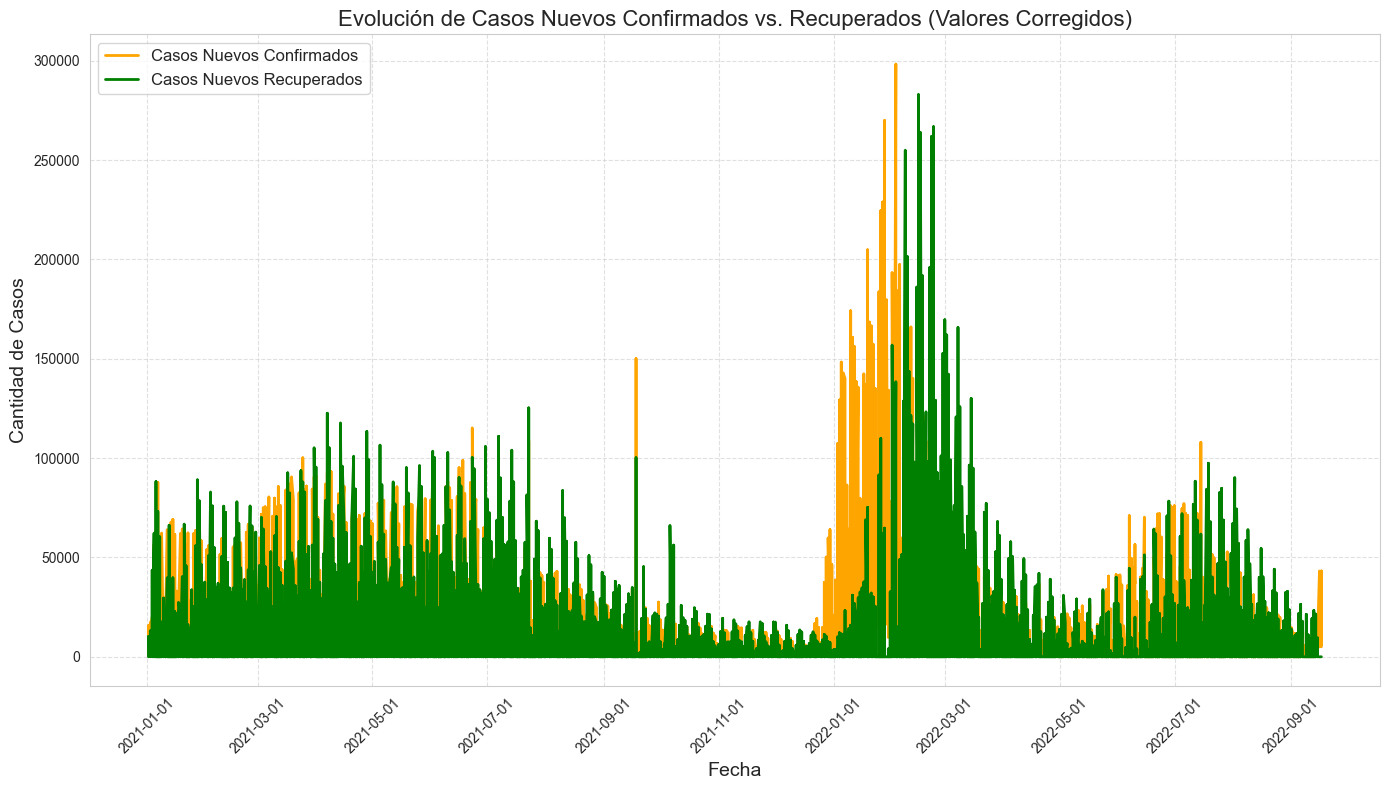

In [119]:
# Asegúrate de que 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Filtrar valores inválidos (fechas nulas o años fuera del rango esperado)
data_final = data_final[data_final['date'].notnull()]  # Eliminar fechas nulas
data_final = data_final[(data_final['date'] >= '2020-01-01') & (data_final['date'] <= '2023-12-31')]

# Reemplazar valores negativos por 0 en 'new_confirmed' y 'new_recovered'
data_final['new_confirmed'] = data_final['new_confirmed'].clip(lower=0)
data_final['new_recovered'] = data_final['new_recovered'].clip(lower=0)

# Configurar 'date' como índice
data_final.set_index('date', inplace=True)

# Crear el gráfico nuevamente
plt.figure(figsize=(14, 8))
plt.plot(data_final.index, data_final['new_confirmed'], label='Casos Nuevos Confirmados', color='orange', linewidth=2)
plt.plot(data_final.index, data_final['new_recovered'], label='Casos Nuevos Recuperados', color='green', linewidth=2)

# Títulos y etiquetas
plt.title('Evolución de Casos Nuevos Confirmados vs. Recuperados (Valores Corregidos)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Casos', fontsize=14)

# Formato de las fechas en el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, fontsize=10)

# Agregar cuadrícula
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend(loc='upper left', fontsize=12)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()



##### El gráfico muestra la **evolución de los casos activos y recuperados de COVID-19** entre 2021 y 2022. Se observan múltiples picos de casos activos a lo largo del período, especialmente hacia mediados de 2021 y principios de 2022, coincidiendo probablemente con nuevas olas del virus y la aparición de variantes. En esos momentos, los casos activos superan significativamente a los casos recuperados. Sin embargo, hacia mediados de 2022, se observa una tendencia a la baja en ambos indicadores, con los casos recuperados manteniéndose generalmente más altos o equiparados a los casos activos, lo que sugiere una mejora en el control de la pandemia. Esto puede estar relacionado con avances en la vacunación y las medidas de contención.

##### Tasa de crecimiento

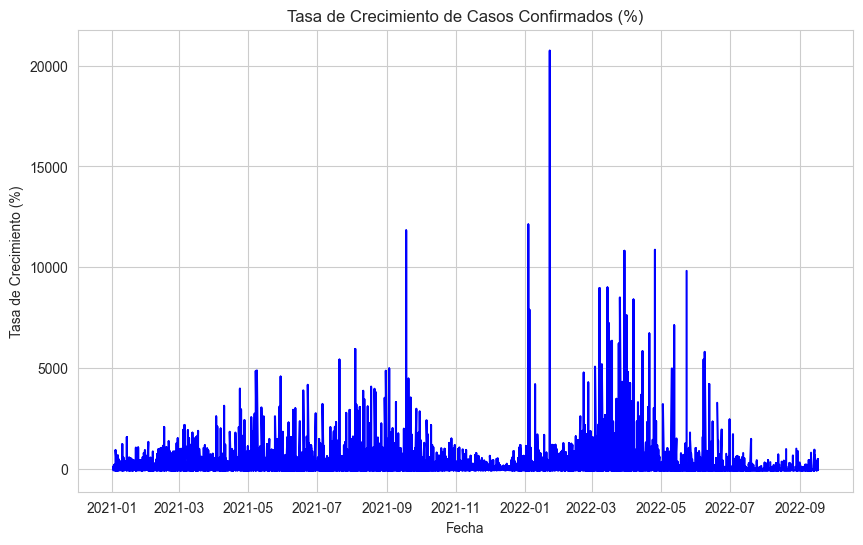

In [120]:
data_final['growth_rate'] = data_final['new_confirmed'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.plot(data_final.index, data_final['growth_rate'], label='Tasa de Crecimiento (%)', color='blue')
plt.title('Tasa de Crecimiento de Casos Confirmados (%)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento (%)')
plt.show()


##### - Relación entre la Cobertura de Vacunación y la Reducción de Casos: Analiza la relación entre el porcentaje de vacunación y la reducción de casos:

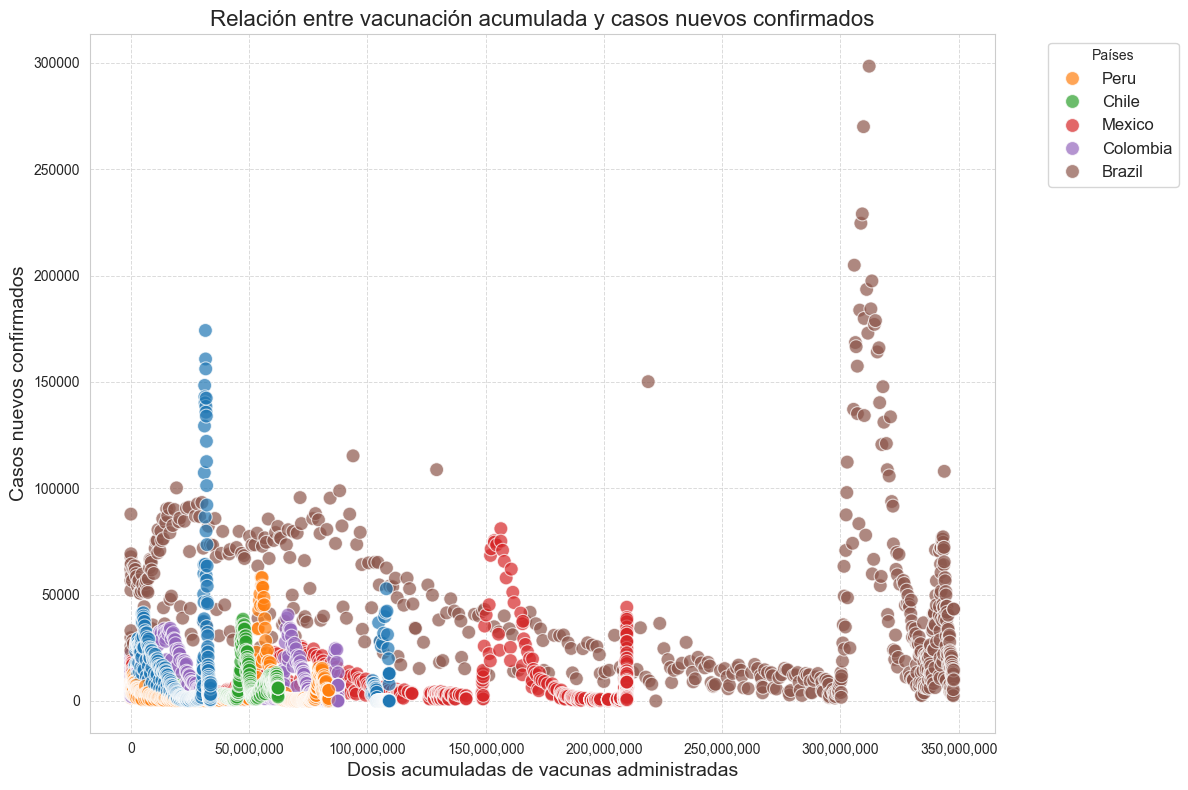

In [121]:
# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de dispersión
scatter = sns.scatterplot(
    x='cumulative_vaccine_doses_administered', 
    y='new_confirmed', 
    hue='country_name', 
    data=data_final, 
    palette='tab10', 
    alpha=0.7, 
    s=100,  # Tamaño de los puntos
    ax=ax
)

# Configurar títulos y etiquetas
ax.set_title('Relación entre vacunación acumulada y casos nuevos confirmados', fontsize=16)
ax.set_xlabel('Dosis acumuladas de vacunas administradas', fontsize=14)
ax.set_ylabel('Casos nuevos confirmados', fontsize=14)

# Formatear el eje X con separadores de miles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

# Agregar una cuadrícula para facilitar la lectura
ax.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Mejorar la posición de la leyenda
handles, labels = scatter.get_legend_handles_labels()
ax.legend(
    handles=handles[1:],  # Excluir el encabezado de "hue"
    labels=labels[1:], 
    title='Países', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    fontsize=12
)

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


La relación entre la vacunación acumulada y los casos nuevos confirmados muestra que países con mayores dosis acumuladas, como Brasil, tienden a estabilizar sus casos nuevos, aunque Brasil presenta alta dispersión debido a su densidad poblacional y otros factores. Chile destaca con menores casos nuevos y mayor efectividad en su campaña de vacunación. En niveles bajos de vacunación (menos de 50M de dosis), hay alta variabilidad de casos, mientras que a partir de 150M de dosis, los casos tienden a estabilizarse. Esto sugiere que la vacunación contribuye significativamente a la reducción de casos, aunque factores como políticas públicas y adherencia a medidas también influyen.

##### Nuevos casos y Temperatura promedio

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/2769561216.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data_final.resample('M').mean(numeric_only=True)


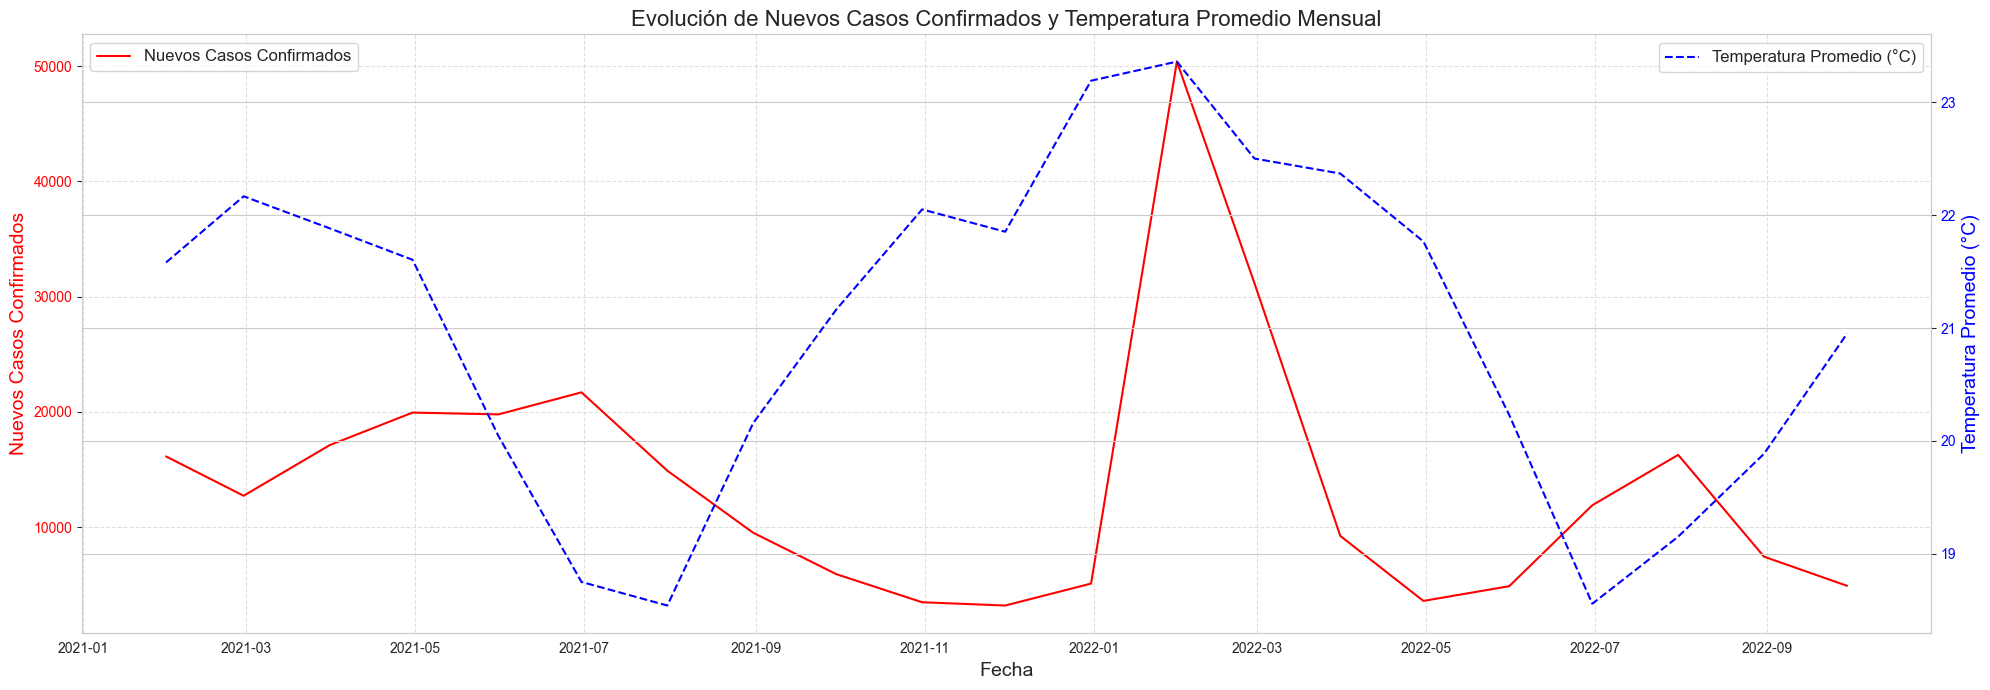

In [122]:

# Crear una figura y un par de ejes
plt.figure(figsize=(20, 7))
ax1 = plt.gca()  # Eje principal (para los casos nuevos de COVID-19)
ax2 = ax1.twinx()  # Eje secundario (para la temperatura)

# Resamplear los datos mensualmente y calcular el promedio
monthly_data = data_final.resample('ME').mean(numeric_only=True)

# Graficar los nuevos casos confirmados en el eje 1 (ax1)
ax1.plot(
    monthly_data.index, 
    monthly_data['new_confirmed'], 
    color='red', 
    label='Nuevos Casos Confirmados'
)

# Graficar la temperatura promedio en el eje 2 (ax2)
ax2.plot(
    monthly_data.index, 
    monthly_data['average_temperature_celsius'], 
    color='blue', 
    label='Temperatura Promedio (°C)', 
    linestyle='--'
)

# Configuración del eje principal (ax1)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_ylabel('Nuevos Casos Confirmados', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(visible=True, linestyle='--', alpha=0.6)

# Configuración del eje secundario (ax2)
ax2.set_ylabel('Temperatura Promedio (°C)', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Título del gráfico
plt.title('Evolución de Nuevos Casos Confirmados y Temperatura Promedio Mensual', fontsize=16)

# Configurar leyendas para ambos ejes
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Ajustar la disposición del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Este gráfico muestra la relación temporal entre los nuevos casos confirmados de COVID-19 y la temperatura promedio. Algunos insights clave son:

1. **Relación Inversa Aparente**: En meses más fríos (temperatura más baja), se observa un aumento en los casos nuevos de COVID-19. Esto podría indicar una mayor propagación del virus en climas fríos debido a factores como mayor tiempo en espacios cerrados y menor ventilación.

2. **Pico Invernal**: El aumento de casos parece coincidir con períodos de temperaturas bajas, como los picos de casos en invierno, reflejando tendencias similares observadas en otros países.

3. **Reducción en Meses Cálidos**: En períodos de mayor temperatura, los casos tienden a disminuir, lo cual podría estar relacionado con factores estacionales que afectan la transmisibilidad del virus.

4. **Ciclos Repetitivos**: Los patrones muestran un comportamiento cíclico que podría estar influenciado por las estaciones, medidas de contención y campañas de vacunación.

Aplicación:
Este análisis sugiere que las estrategias de vacunación y prevención deben intensificarse antes y durante los meses más fríos para mitigar los picos de contagio. Además, los factores climáticos pueden ser importantes al diseñar políticas de salud pública para gestionar la pandemia.

##### - Impacto de la urbanizacion en la pandemia

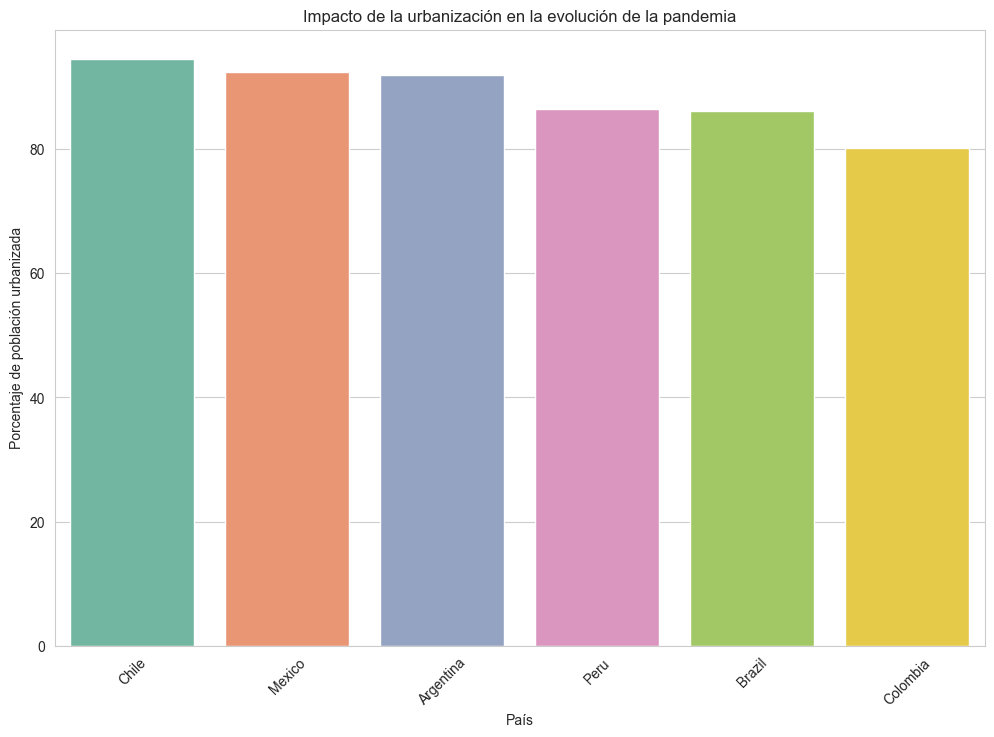

In [123]:
# Asegurarse de que la columna de fecha esté en formato datetime
data_final.index = pd.to_datetime(data_final.index)

# Calcular el porcentaje de población urbanizada
data_final['urban_population_percentage'] = (data_final['population_urban'] / data_final['population']) * 100

# Obtener el último registro por país
ultimo_registro = data_final.groupby('country_name').last().reset_index()

# Ordenar por el porcentaje de población urbanizada
ultimo_registro = ultimo_registro.sort_values(by='urban_population_percentage', ascending=False)

# Crear una paleta de colores combinados
paleta_colores = sns.color_palette("Set2", len(ultimo_registro['country_name']))

# Crear el gráfico de barras con colores diferentes para cada país y usando 'hue'
plt.figure(figsize=(12, 8))
sns.barplot(x='country_name', y='urban_population_percentage', data=ultimo_registro, hue='country_name', palette=paleta_colores, dodge=False)

plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Porcentaje de población urbanizada')
plt.title('Impacto de la urbanización en la evolución de la pandemia')
plt.legend([],[], frameon=False)  # Desactiva la leyenda
plt.grid(True, axis='y')
plt.show()


El gráfico muestra el **porcentaje de población urbanizada** en diferentes países de América Latina. Se observa que todos los países analizados tienen un alto porcentaje de población viviendo en áreas urbanas, con cifras superiores al 80%. Chile tiene el mayor porcentaje de urbanización, seguido por México, Argentina, Perú, Brasil y Colombia. Estos altos niveles de urbanización pueden influir en la propagación de la pandemia, ya que las áreas urbanas tienden a tener mayor densidad poblacional y movilidad, lo que podría facilitar la transmisión del virus. Sin embargo, también es posible que los países más urbanizados hayan implementado mejores infraestructuras y políticas sanitarias para controlar el impacto del COVID-19 en estas áreas densamente pobladas.
Aplicaciones:
Prevención y Planificación: Países con alta urbanización necesitan implementar medidas estrictas en áreas urbanas densas para controlar la propagación.
Infraestructura de Salud: Estos resultados subrayan la importancia de fortalecer los servicios de salud en áreas metropolitanas para futuras emergencias.

##### - Paises con mayor mortalidad

  country_name  cumulative_deceased  cumulative_deceased_per_100k
5         Peru               216173                    735.735666
2        Chile                60822                    346.090757
1       Brazil               685203                    322.358348


/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/1365934827.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/1365934827.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


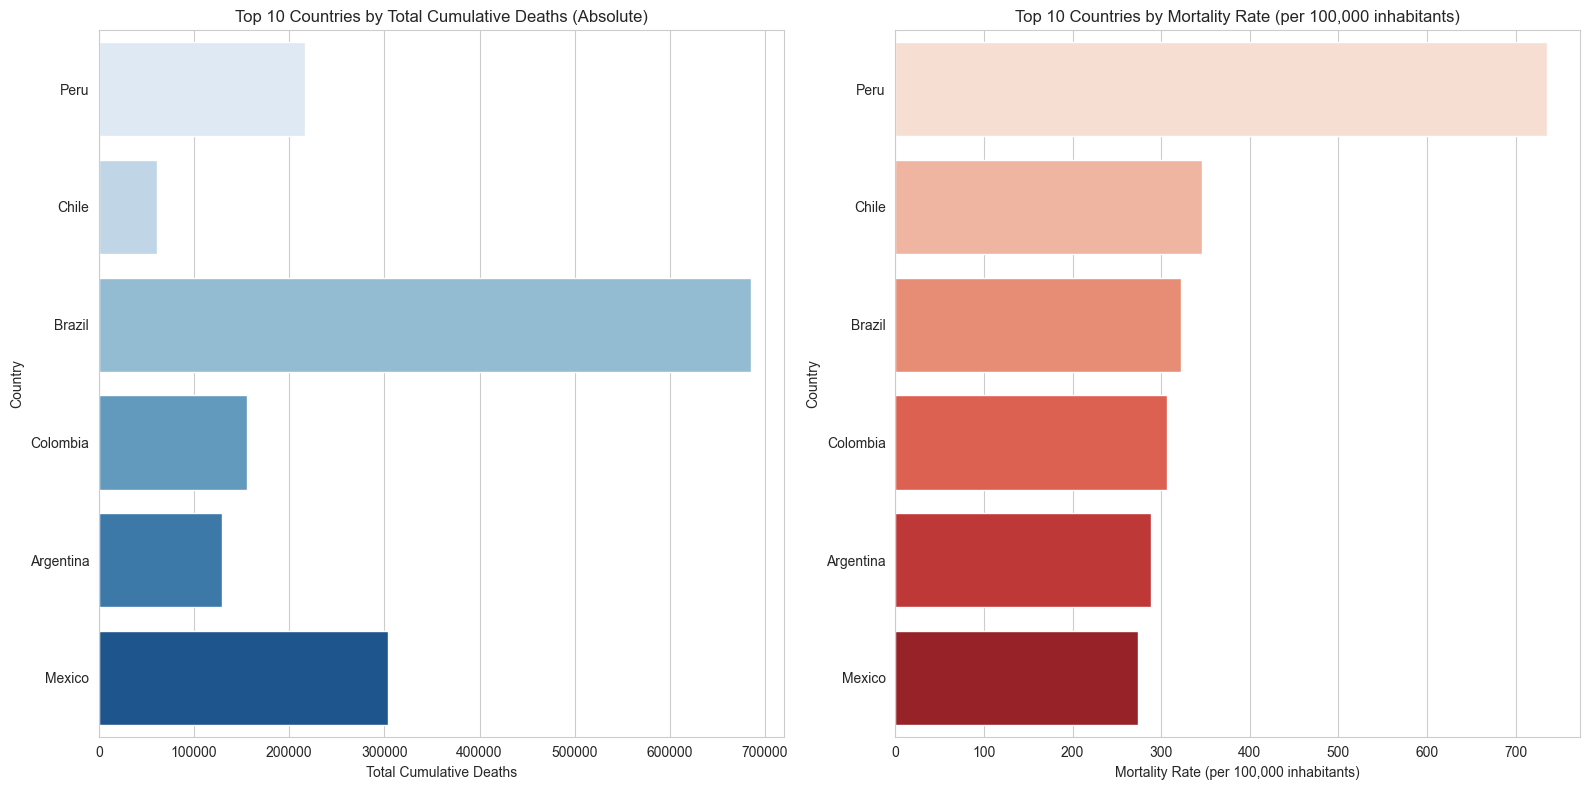

In [124]:
# Ensure population values are not zero to avoid division errors
data_final = data_final[data_final['population'] > 0]

# Calculate mortality rate per 100,000 inhabitants
data_final['new_deceased_per_100k'] = (data_final['new_deceased'] / data_final['population']) * 100000
data_final['cumulative_deceased_per_100k'] = (data_final['cumulative_deceased'] / data_final['population']) * 100000

# Group by country to calculate the cumulative and normalized values
mortality_data = data_final.groupby('country_name').agg({
    'new_deceased': 'sum',  # Total new deaths
    'cumulative_deceased': 'max',  # Maximum cumulative deaths
    'new_deceased_per_100k': 'mean',  # Average daily mortality rate per 100,000 inhabitants
    'cumulative_deceased_per_100k': 'max'  # Maximum cumulative mortality rate per 100,000 inhabitants
}).reset_index()

# Sort by cumulative mortality rate (normalized)
mortality_data_sorted = mortality_data.sort_values(by='cumulative_deceased_per_100k', ascending=False)

# Save the top 3 countries to a variable
top_3_countries = mortality_data_sorted.head(3)

# Display the top 10 countries with the highest normalized mortality rate
print(top_3_countries[['country_name', 'cumulative_deceased', 'cumulative_deceased_per_100k']])

# Plot the results for both absolute and normalized values
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot absolute values
sns.barplot(
    x='cumulative_deceased',
    y='country_name',
    data=mortality_data_sorted.head(10),
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('Top 10 Countries by Total Cumulative Deaths (Absolute)')
axes[0].set_xlabel('Total Cumulative Deaths')
axes[0].set_ylabel('Country')

# Plot normalized values
sns.barplot(
    x='cumulative_deceased_per_100k',
    y='country_name',
    data=mortality_data_sorted.head(10),
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Top 10 Countries by Mortality Rate (per 100,000 inhabitants)')
axes[1].set_xlabel('Mortality Rate (per 100,000 inhabitants)')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()





La relevancia de analizar valores normalizados o absolutos depende del contexto y objetivo del análisis:

Valores Normalizados (por cada 100,000 habitantes):
Más relevantes para comparar países de diferente tamaño poblacional.
Ayudan a identificar la gravedad relativa de la pandemia en términos proporcionales.
Son ideales si el objetivo es comprender el impacto de la mortalidad en relación con la población, sin que países más grandes (como Brasil o México) dominen el análisis.
Útiles para guiar decisiones de políticas públicas o estrategias de salud, especialmente en países con recursos limitados.
Ejemplo: Si una empresa farmacéutica quiere expandirse a países donde el impacto per cápita es más alto, los valores normalizados son clave.
Valores Absolutos:
Más relevantes para medir el volumen total de muertes y la escala del problema.
Indican la carga total de mortalidad y permiten entender dónde los sistemas de salud enfrentaron mayores desafíos en términos absolutos.
Son importantes si el objetivo es determinar la cantidad total de recursos necesarios, como dosis de vacunas o personal médico.
Ejemplo: Si el enfoque es ofrecer soluciones en países con las mayores necesidades globales (independientemente del tamaño de la población), los valores absolutos son más útiles.
Conclusión:
Para una estrategia empresarial (como la expansión de una farmacéutica):

Los valores normalizados son más relevantes para identificar mercados con mayor impacto relativo, ya que indican dónde la necesidad es proporcionalmente más alta.
Sin embargo, los valores absolutos también son importantes para evaluar el tamaño del mercado y la escala de recursos necesarios.
Recomendación práctica:

Analizar ambos. Los valores normalizados proporcionan insights sobre la vulnerabilidad proporcional, mientras que los absolutos permiten medir la magnitud total del problema. La combinación de ambos brinda un panorama completo.

Insights sobre los gráficos:

**Gráfico 1: Muertes acumuladas totales (valores absolutos)**
- **Brasil** lidera en número total de muertes acumuladas, lo cual es esperable dado su gran población. Esto refleja la **carga absoluta** que enfrentó el sistema de salud brasileño durante la pandemia.
- **México** también muestra un alto número de muertes acumuladas, seguido de **Colombia** y **Argentina**, lo que sugiere una gran afectación en términos absolutos, posiblemente relacionada con las densidades de población y respuestas de salud pública.
- **Perú y Chile** tienen cifras absolutas más bajas en comparación, pero esto debe interpretarse considerando su menor tamaño poblacional.

**Gráfico 2: Tasa de mortalidad (valores normalizados por 100,000 habitantes)**
- **Perú destaca como el país con la mayor tasa de mortalidad relativa**, lo que indica un impacto desproporcionadamente alto en su población. Esto podría estar relacionado con factores como limitaciones en infraestructura de salud, alta prevalencia de comorbilidades, o un acceso limitado a recursos durante los picos de la pandemia.
- **Chile**, a pesar de tener valores absolutos bajos, muestra una tasa de mortalidad relativa alta, lo que indica que la gravedad de la pandemia per cápita fue significativa.
- **Brasil**, **Colombia**, **Argentina**, y **México** tienen tasas intermedias, con valores similares pero relevantes para analizar las estrategias de mitigación adoptadas.

---

**Conclusión General**
- **Valores absolutos:** Ayudan a identificar países que enfrentaron la mayor carga total, como Brasil y México. Esto es importante para evaluar dónde los sistemas de salud estuvieron más exigidos.
- **Valores normalizados:** Destacan la vulnerabilidad relativa, especialmente en países como Perú y Chile, donde la tasa de mortalidad fue significativamente alta respecto a su población.

**Relevancia para estrategias:**
- **Expansión de recursos de salud o vacunas:** Países con altas tasas de mortalidad relativa, como Perú y Chile, son prioritarios para iniciativas de refuerzo de sistemas de salud o futuras campañas de vacunación.
- **Gestión de riesgos:** Los valores absolutos indican países donde los recursos deben estar preparados para gestionar grandes volúmenes de afectados, como Brasil y México.

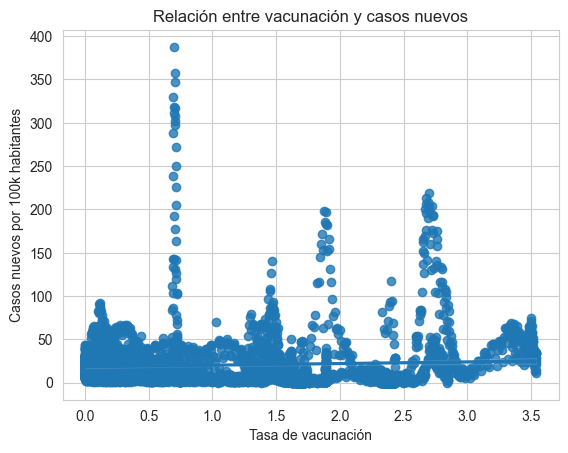

In [125]:
# Correlación entre vacunación y disminución de casos
data_final['vaccination_rate'] = data_final['cumulative_vaccine_doses_administered'] / data_final['population']
sns.regplot(data=data_final, x='vaccination_rate', y='new_confirmed_per_100k')
plt.title('Relación entre vacunación y casos nuevos')
plt.xlabel('Tasa de vacunación')
plt.ylabel('Casos nuevos por 100k habitantes')
plt.show()


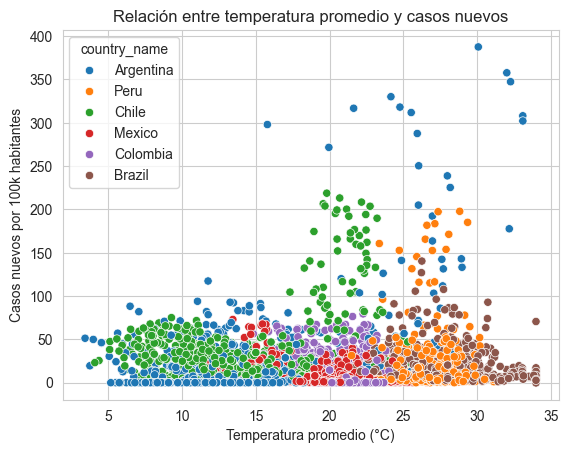

In [126]:
sns.scatterplot(data=data_final, x='average_temperature_celsius', y='new_confirmed_per_100k', hue='country_name')
plt.title('Relación entre temperatura promedio y casos nuevos')
plt.xlabel('Temperatura promedio (°C)')
plt.ylabel('Casos nuevos por 100k habitantes')
plt.show()


##### Distribucion por edad en los paises con mayor tasa de mortalidad

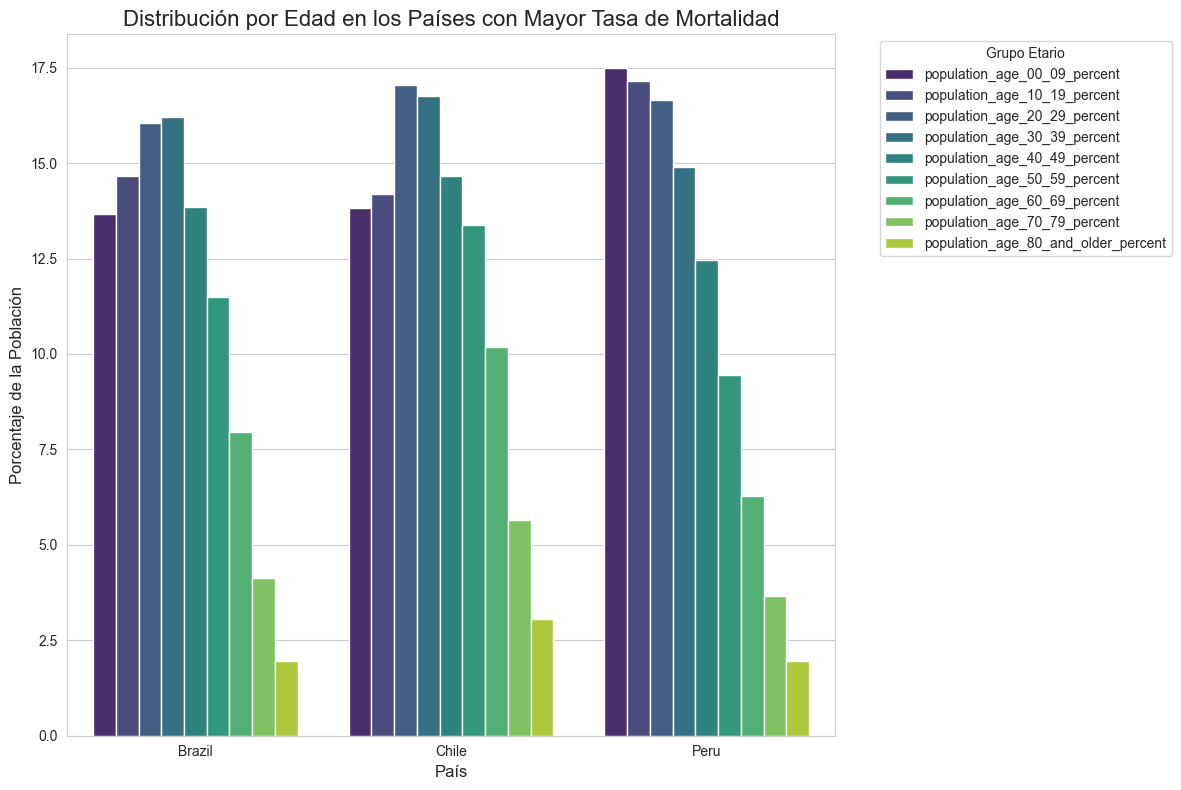

In [127]:
# Filtrar los países con la mayor tasa de mortalidad acumulada (top 3)
top_countries_by_mortality = mortality_data_sorted.head(3)['country_name']

# Filtrar el dataset original para incluir solo los países del top 3
data_top_countries = data_final[data_final['country_name'].isin(top_countries_by_mortality)]

# Agrupar por país y calcular la suma de las proporciones de cada grupo etario
age_distribution = data_top_countries.groupby('country_name').agg({
    'population_age_00_09_percent': 'mean',
    'population_age_10_19_percent': 'mean',
    'population_age_20_29_percent': 'mean',
    'population_age_30_39_percent': 'mean',
    'population_age_40_49_percent': 'mean',
    'population_age_50_59_percent': 'mean',
    'population_age_60_69_percent': 'mean',
    'population_age_70_79_percent': 'mean',
    'population_age_80_and_older_percent': 'mean'
}).reset_index()

# Transformar los datos para un gráfico de barras apiladas
age_distribution_melted = age_distribution.melt(
    id_vars='country_name',
    var_name='age_group',
    value_name='percentage'
)

# Configurar el gráfico de barras apiladas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x='country_name',
    y='percentage',
    hue='age_group',
    data=age_distribution_melted,
    palette='viridis'
)
plt.title('Distribución por Edad en los Países con Mayor Tasa de Mortalidad', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje de la Población', fontsize=12)
plt.legend(title='Grupo Etario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



En los países con mayor tasa de mortalidad por COVID-19 (Brasil, Chile y Perú), los grupos de población mayores de 60 años, más vulnerables a complicaciones severas, representan una proporción significativa, aunque predominan las poblaciones más jóvenes (0-39 años), que pueden actuar como vectores de transmisión. 

Brasil y Chile tienen una proporción ligeramente mayor de población de 70 años o más en comparación con Perú, lo que indica que factores adicionales, como acceso a servicios de salud e infraestructura médica, también influyen en las tasas de mortalidad. 

Estos datos sugieren que los países deben priorizar la atención médica y estrategias de vacunación dirigidas a los grupos vulnerables para reducir el impacto de la pandemia.

##### Estrategias de vacunacion por pais

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/4265893477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


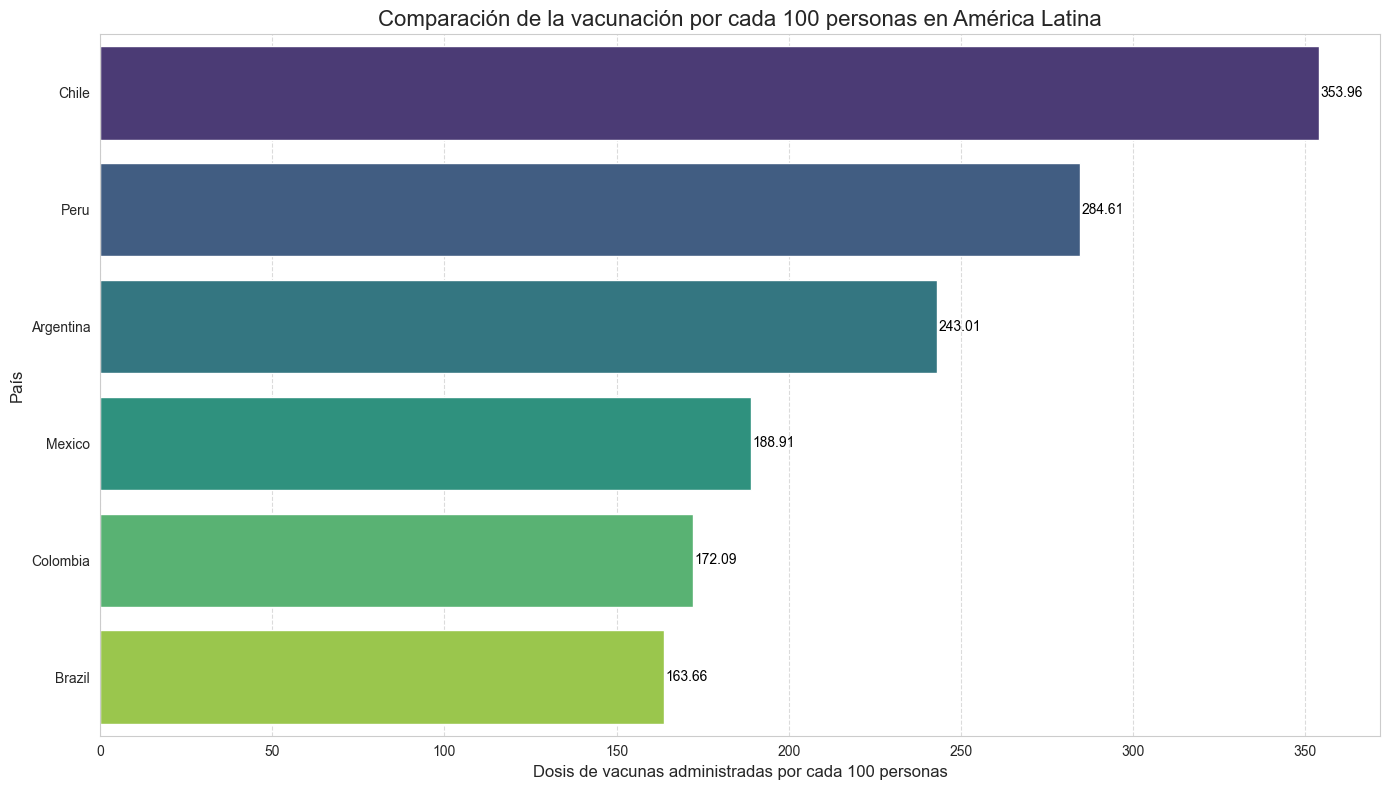

In [128]:
# Paso 1: Calcular el número de dosis de vacunas administradas por cada 100 personas
data_final['vaccination_per_100'] = (data_final['cumulative_vaccine_doses_administered'] / data_final['population']) * 100

# Paso 2: Obtener el último registro de cada país para ver la vacunación final
ultimo_registro_vacunas = data_final.groupby('country_name').last().reset_index()

# Paso 3: Ordenar los países por vacunación cada 100 personas
ultimo_registro_vacunas = ultimo_registro_vacunas.sort_values(by='vaccination_per_100', ascending=False)

# Paso 4: Crear un gráfico de barras mejorado con seaborn
plt.figure(figsize=(14, 8))
sns.barplot(
    x='vaccination_per_100',
    y='country_name',
    data=ultimo_registro_vacunas,
    palette='viridis'
)

# Etiquetas y título
plt.xlabel('Dosis de vacunas administradas por cada 100 personas', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title('Comparación de la vacunación por cada 100 personas en América Latina', fontsize=16)

# Mostrar valores en cada barra
for index, value in enumerate(ultimo_registro_vacunas['vaccination_per_100']):
    plt.text(value + 0.5, index, f'{value:.2f}', va='center', fontsize=10, color='black')

# Ajustar diseño
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### El gráfico muestra que **Chile** lidera en la vacunación con el mayor número de dosis administradas por cada 100 personas en América Latina, lo que indica una estrategia de vacunación altamente efectiva. **Perú** y **Argentina** también destacan con altas tasas de vacunación, lo que refleja una implementación eficiente. En contraste, **México**, **Colombia**, y **Brasil** presentan tasas más bajas, lo que podría ser resultado de diferencias en la disponibilidad de vacunas, logística o políticas de salud pública. Este análisis sugiere que las estrategias nacionales y los desafíos logísticos han influido en el éxito de las campañas de vacunación en la región.

##### Tasa de mortalidad vs condiciones preexistentes

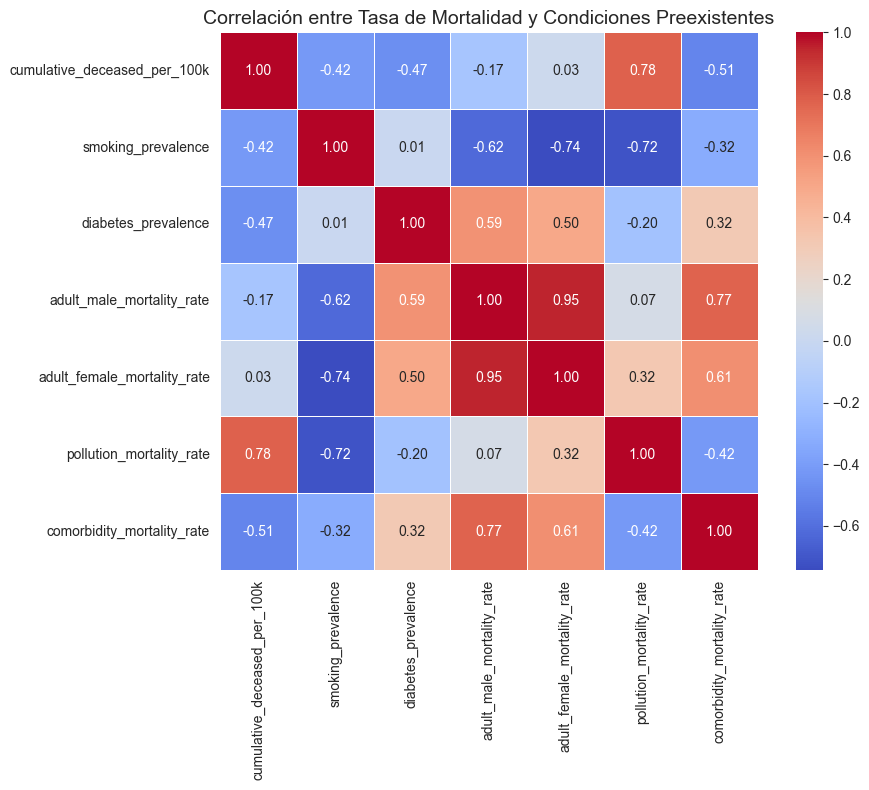

In [129]:

# Cargar los datos
data_final = pd.read_csv('DatosFinalesFiltrado.csv')

# Asegurarnos de que los valores de población no sean cero para evitar divisiones por cero
data_final = data_final[data_final['population'] > 0]

# Calcular la tasa de mortalidad acumulada por cada 100,000 habitantes
data_final['cumulative_deceased_per_100k'] = (data_final['cumulative_deceased'] / data_final['population']) * 100000

# Seleccionar columnas relevantes para el análisis
columns_of_interest = [
    'cumulative_deceased_per_100k',  # Tasa de mortalidad
    'smoking_prevalence',            # Prevalencia de tabaquismo
    'diabetes_prevalence',           # Prevalencia de diabetes
    'adult_male_mortality_rate',     # Mortalidad masculina adulta
    'adult_female_mortality_rate',   # Mortalidad femenina adulta
    'pollution_mortality_rate',      # Mortalidad atribuida a contaminación
    'comorbidity_mortality_rate'     # Mortalidad por comorbilidades
]

# Crear un DataFrame solo con las columnas de interés
correlation_data = data_final[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5
)

# Añadir título
plt.title('Correlación entre Tasa de Mortalidad y Condiciones Preexistentes', fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()





El mapa de calor muestra la **correlación entre condiciones preexistentes** (como diabetes y tabaquismo) y la cantidad de fallecidos por COVID-19. Se observa una **correlación positiva moderada** entre la **prevalencia de diabetes** y el **número de fallecidos** (0.21), así como entre la **tasa de mortalidad por comorbilidades** y los fallecidos (0.27), lo que sugiere que estas condiciones influyen en la mortalidad por COVID-19. Sin embargo, la **prevalencia de tabaquismo** muestra una correlación negativa débil con las muertes (-0.15), lo que podría indicar un impacto menos directo o factores adicionales en juego.
Insights del Heatmap:

1. **Alta correlación entre tasa de mortalidad y contaminación (0.78)**:
   - La **mortalidad por contaminación** tiene la correlación más alta con la tasa de mortalidad acumulada por COVID-19. Esto sugiere que países con mayores niveles de contaminación tienden a tener más fallecimientos, posiblemente debido a la afectación previa del sistema respiratorio.

2. **Relación moderada-negativa con tabaquismo (-0.42)**:
   - La **prevalencia de tabaquismo** presenta una correlación negativa con la tasa de mortalidad. Esto puede parecer contradictorio y requerir análisis adicionales, pero podría reflejar diferencias regionales en políticas de salud pública o distribución de la población afectada.

3. **Diabetes y mortalidad acumulada (-0.47)**:
   - La **diabetes** tiene una correlación negativa moderada con la tasa de mortalidad, aunque en otros contextos se ha señalado como un factor de riesgo. Esto podría variar según la prevalencia y manejo de esta condición en cada región.

4. **Mortalidad por comorbilidades (-0.51)**:
   - La **mortalidad por comorbilidades** presenta una correlación negativa moderada, indicando que las condiciones preexistentes son relevantes pero no son el único factor explicativo.

5. **Relaciones internas entre condiciones**:
   - Alta correlación entre **mortalidad masculina y femenina** (0.95), reflejando patrones similares en la distribución de riesgos entre géneros.
   - La **mortalidad por comorbilidades** y la **mortalidad masculina adulta** están fuertemente relacionadas (0.77), lo que podría sugerir un vínculo entre estas variables.

6. **Baja correlación de algunas variables**:
   - Variables como la **mortalidad femenina adulta** o el tabaquismo tienen correlaciones más débiles con la tasa de mortalidad acumulada.

Conclusiones:
- La **contaminación** destaca como un factor crítico a considerar en políticas públicas y estrategias de salud durante pandemias.
- Las **comorbilidades** y las **mortalidades por género** también son relevantes, pero sus efectos pueden depender de factores específicos de cada país.
- Sería útil investigar más sobre los factores que explican la correlación negativa del tabaquismo y diabetes, pues los resultados pueden estar influenciados por sesgos o dinámicas regionales.

Este análisis puede orientar estrategias específicas según las características de cada país para mitigar el impacto de futuras pandemias.

##### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
Este análisis compara la prevalencia de condiciones preexistentes, como diabetes y enfermedades cardiovasculares, en países con tasas de mortalidad altas y bajas.



Umbral bajo (Percentil 25): 0.00
Umbral alto (Percentil 75): 0.01


/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/2369879634.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


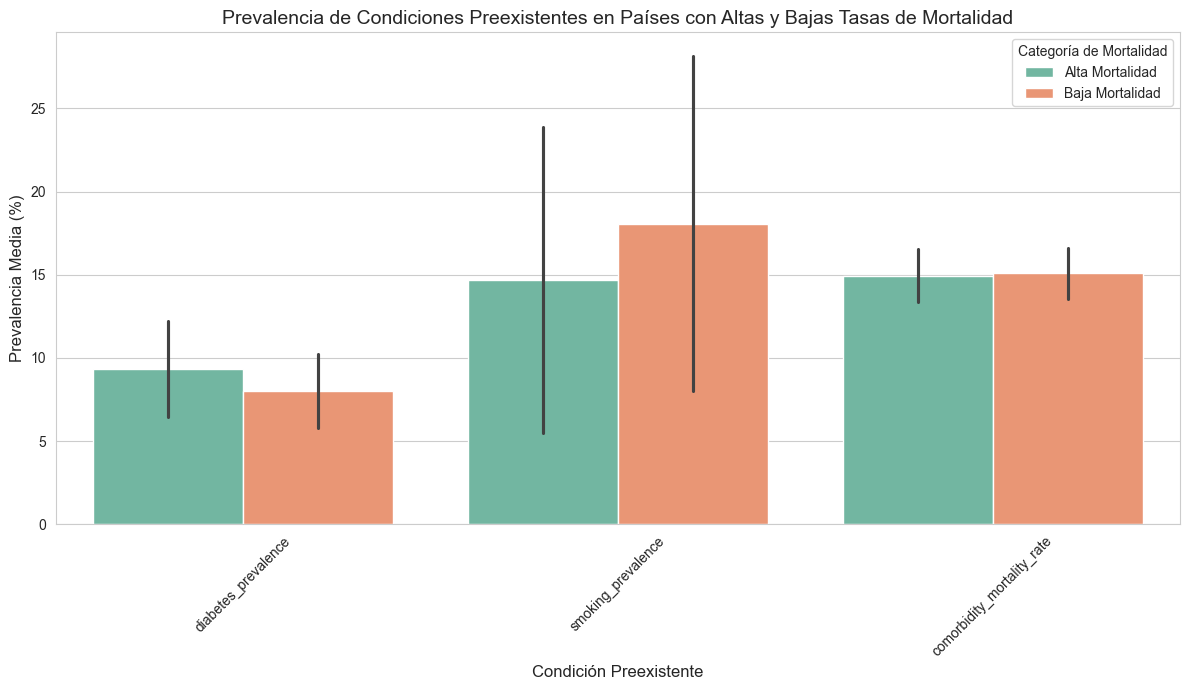

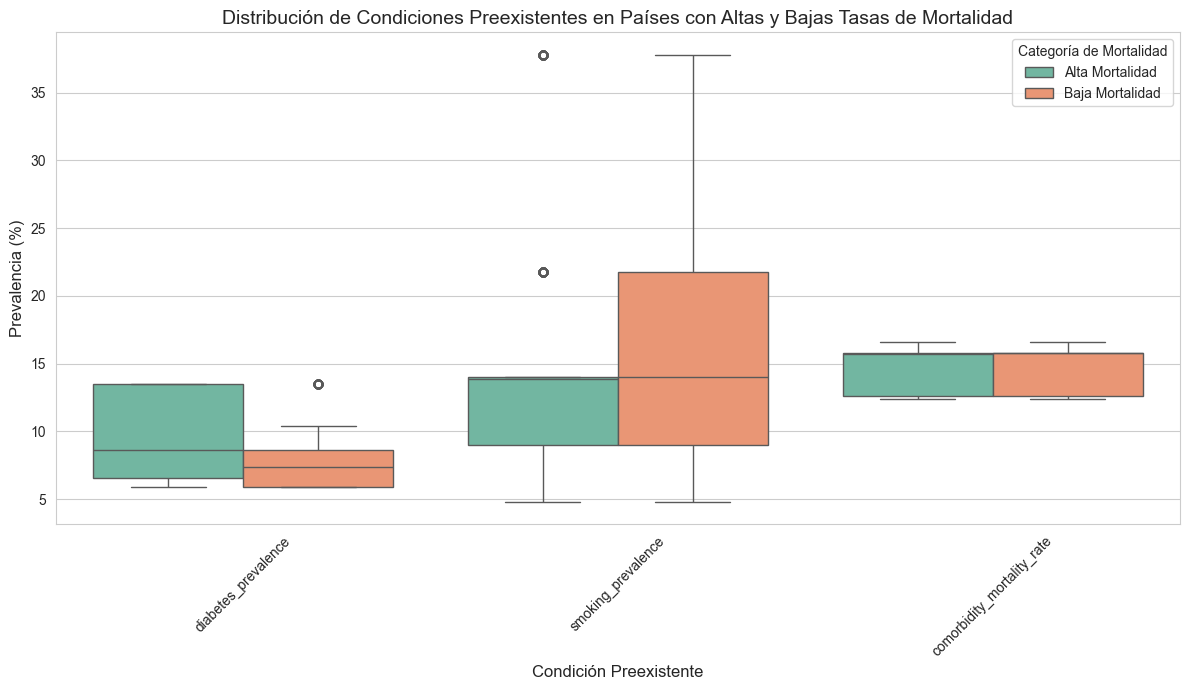

In [130]:
# Calcular la tasa de mortalidad como porcentaje
data_final['mortality_rate'] = (data_final['new_deceased'] / data_final['cumulative_confirmed']) * 100

# Calcular los umbrales basados en percentiles
umbral_bajo = data_final['mortality_rate'].quantile(0.25)  # Percentil 25
umbral_alto = data_final['mortality_rate'].quantile(0.75)  # Percentil 75

print(f"Umbral bajo (Percentil 25): {umbral_bajo:.2f}")
print(f"Umbral alto (Percentil 75): {umbral_alto:.2f}")

# Categorizar en alta y baja mortalidad
data_final['mortality_category'] = data_final['mortality_rate'].apply(
    lambda x: 'Alta Mortalidad' if x >= umbral_alto else 'Baja Mortalidad' if x <= umbral_bajo else None
)

# Filtrar datos con alta y baja mortalidad
data_filtered = data_final[data_final['mortality_category'].notnull()]

# Condiciones preexistentes
condiciones_preexistentes = ['diabetes_prevalence', 'smoking_prevalence', 'comorbidity_mortality_rate']

# Verificar si las columnas existen
missing_columns = [col for col in condiciones_preexistentes if col not in data_filtered.columns]
if missing_columns:
    raise ValueError(f"Las columnas faltantes son: {missing_columns}")

# Derretir los datos para graficar
data_melted = data_filtered.melt(
    id_vars=['mortality_category'],
    value_vars=condiciones_preexistentes,
    var_name='Condición',
    value_name='Prevalencia'
)

# **Gráfico de Barras**
plt.figure(figsize=(12, 7))
sns.barplot(
    data=data_melted,
    x='Condición',
    y='Prevalencia',
    hue='mortality_category',
    palette='Set2',
    ci='sd'
)
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad', fontsize=14)
plt.xlabel('Condición Preexistente', fontsize=12)
plt.ylabel('Prevalencia Media (%)', fontsize=12)
plt.legend(title='Categoría de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Boxplot**
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=data_melted,
    x='Condición',
    y='Prevalencia',
    hue='mortality_category',
    palette='Set2'
)
plt.title('Distribución de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad', fontsize=14)
plt.xlabel('Condición Preexistente', fontsize=12)
plt.ylabel('Prevalencia (%)', fontsize=12)
plt.legend(title='Categoría de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Insights del Boxplot:
1. **Diabetes Prevalence**:
   - En países con alta mortalidad, la prevalencia de diabetes parece tener un rango más amplio, pero los valores promedio no son marcadamente diferentes de los países con baja mortalidad.
   - Esto indica que la diabetes puede tener una correlación moderada con la mortalidad, pero no es el único factor.

2. **Smoking Prevalence**:
   - La prevalencia de tabaquismo es notablemente mayor en países con baja mortalidad.
   - Esto podría deberse a otros factores compensatorios como mejores sistemas de salud o menor prevalencia de otras comorbilidades que mitiguen el impacto del tabaquismo.

3. **Comorbidity Mortality Rate**:
   - La tasa de mortalidad asociada a comorbilidades es consistentemente más alta en países con alta mortalidad.
   - Esto sugiere que la carga de enfermedades crónicas es un factor clave para explicar las diferencias entre las tasas de mortalidad.

Conclusión:
- La **tasa de mortalidad por comorbilidades** es el factor más asociado a las diferencias entre países de alta y baja mortalidad.
- El **tabaquismo** es significativamente mayor en países con baja mortalidad, lo cual es contraintuitivo y podría requerir más análisis para entender los factores mitigadores.
- Aunque la **diabetes** está presente en ambos grupos, no parece ser el principal factor diferenciador entre alta y baja mortalidad.

Se recomienda analizar otros factores como la infraestructura del sistema de salud y acceso a tratamientos para profundizar en estas relaciones.

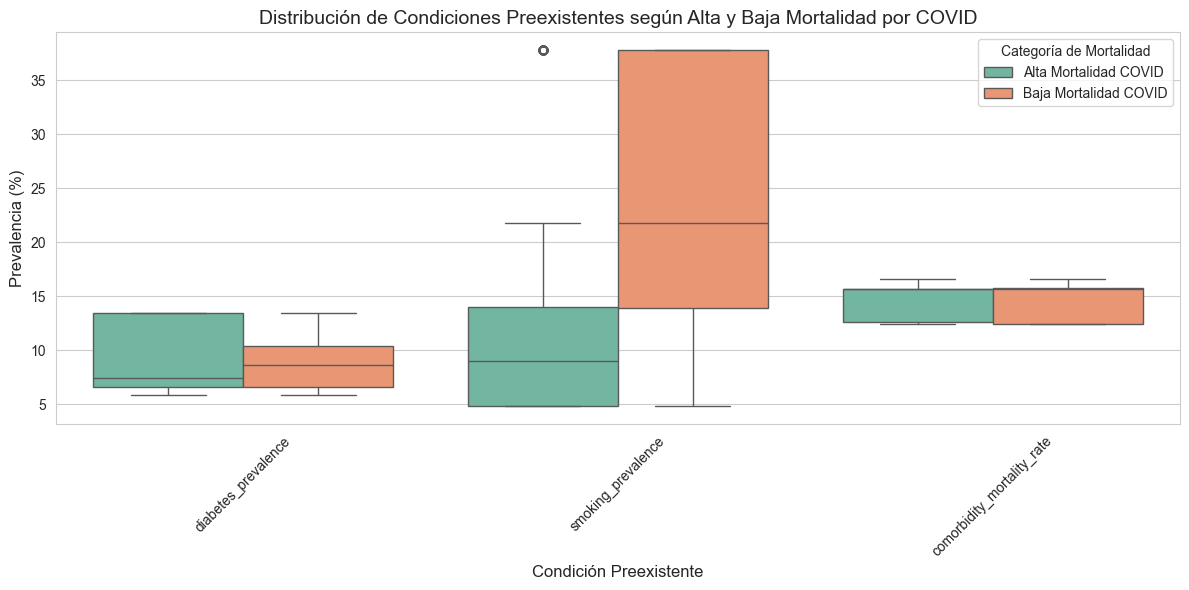

In [131]:
# Asegurarse de que los valores de población no sean cero para evitar errores de división
data_final = data_final[data_final['population'] > 0]

# Calcular la tasa de mortalidad de COVID-19 por cada 100,000 habitantes
data_final['covid_mortality_rate'] = (data_final['new_deceased'] / data_final['new_confirmed']) * 100000

# Definir umbrales para alta y baja tasa de mortalidad de COVID-19
umbral_alto_covid = data_final['covid_mortality_rate'].quantile(0.75)
umbral_bajo_covid = data_final['covid_mortality_rate'].quantile(0.25)

# Filtrar los países con alta y baja tasa de mortalidad por COVID-19
paises_alta_mortalidad_covid = data_final[data_final['covid_mortality_rate'] >= umbral_alto_covid].copy()
paises_baja_mortalidad_covid = data_final[data_final['covid_mortality_rate'] <= umbral_bajo_covid].copy()

# Crear una columna de categoría para diferenciar alta y baja mortalidad
paises_alta_mortalidad_covid.loc[:, 'Categoria_Mortalidad'] = 'Alta Mortalidad COVID'
paises_baja_mortalidad_covid.loc[:, 'Categoria_Mortalidad'] = 'Baja Mortalidad COVID'

# Combinar ambos conjuntos de datos
datos_mortalidad_covid = pd.concat([paises_alta_mortalidad_covid, paises_baja_mortalidad_covid])

# Seleccionar las columnas de condiciones preexistentes
condiciones_preexistentes = ['diabetes_prevalence', 'smoking_prevalence', 'comorbidity_mortality_rate']

# Crear el gráfico de cajas (boxplot) para comparar las condiciones preexistentes
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=datos_mortalidad_covid.melt(
        id_vars=['Categoria_Mortalidad'], 
        value_vars=condiciones_preexistentes,
        var_name='Condición Preexistente',
        value_name='Prevalencia'
    ),
    x='Condición Preexistente',
    y='Prevalencia',
    hue='Categoria_Mortalidad',
    palette='Set2'
)

# Mejorar etiquetas y título
plt.title('Distribución de Condiciones Preexistentes según Alta y Baja Mortalidad por COVID', fontsize=14)
plt.xlabel('Condición Preexistente', fontsize=12)
plt.ylabel('Prevalencia (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Categoría de Mortalidad')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Insights del gráfico:

1. **Prevalencia de diabetes**:
   - La prevalencia de diabetes parece similar en países con alta y baja mortalidad por COVID, con una ligera tendencia a ser más alta en países de alta mortalidad.

2. **Prevalencia de tabaquismo**:
   - Sorprendentemente, la prevalencia de tabaquismo es más baja en países con alta mortalidad por COVID en comparación con países de baja mortalidad. Esto es inesperado ya que el tabaquismo ha sido relacionado con un mayor riesgo de complicaciones en infecciones respiratorias.

3. **Comorbilidades generales**:
   - Las tasas de mortalidad asociadas a comorbilidades son consistentemente más altas en países con alta mortalidad por COVID, lo cual refuerza la idea de que las condiciones preexistentes contribuyen significativamente al riesgo de mortalidad.

---

Reflexión sobre la relación entre tabaquismo y COVID-19:
- Aunque el tabaquismo suele asociarse con un mayor riesgo en infecciones respiratorias, algunos estudios iniciales sugirieron que los fumadores podrían tener una susceptibilidad diferente al COVID-19 debido a la regulación del receptor ACE2. Sin embargo, esta es un área compleja y controvertida, con investigaciones posteriores indicando que los fumadores probablemente enfrentan mayores riesgos de complicaciones severas y mortalidad.

- La aparente menor prevalencia de tabaquismo en países con alta mortalidad podría deberse a **factores demográficos**, **sesgos en la recolección de datos** o incluso a **interacciones más complejas entre las condiciones preexistentes** y los factores socioeconómicos.

---

Recomendaciones para análisis adicional:
1. Investigar si la relación entre tabaquismo y mortalidad por COVID varía en función de otros factores, como edad o género.
2. Explorar datos de mortalidad en países específicos para verificar si existen discrepancias en la recolección de datos sobre tabaquismo.
3. Incorporar variables como acceso al sistema de salud y tasas de hospitalización en el análisis.

##### Análisis Temporal de la Mortalidad


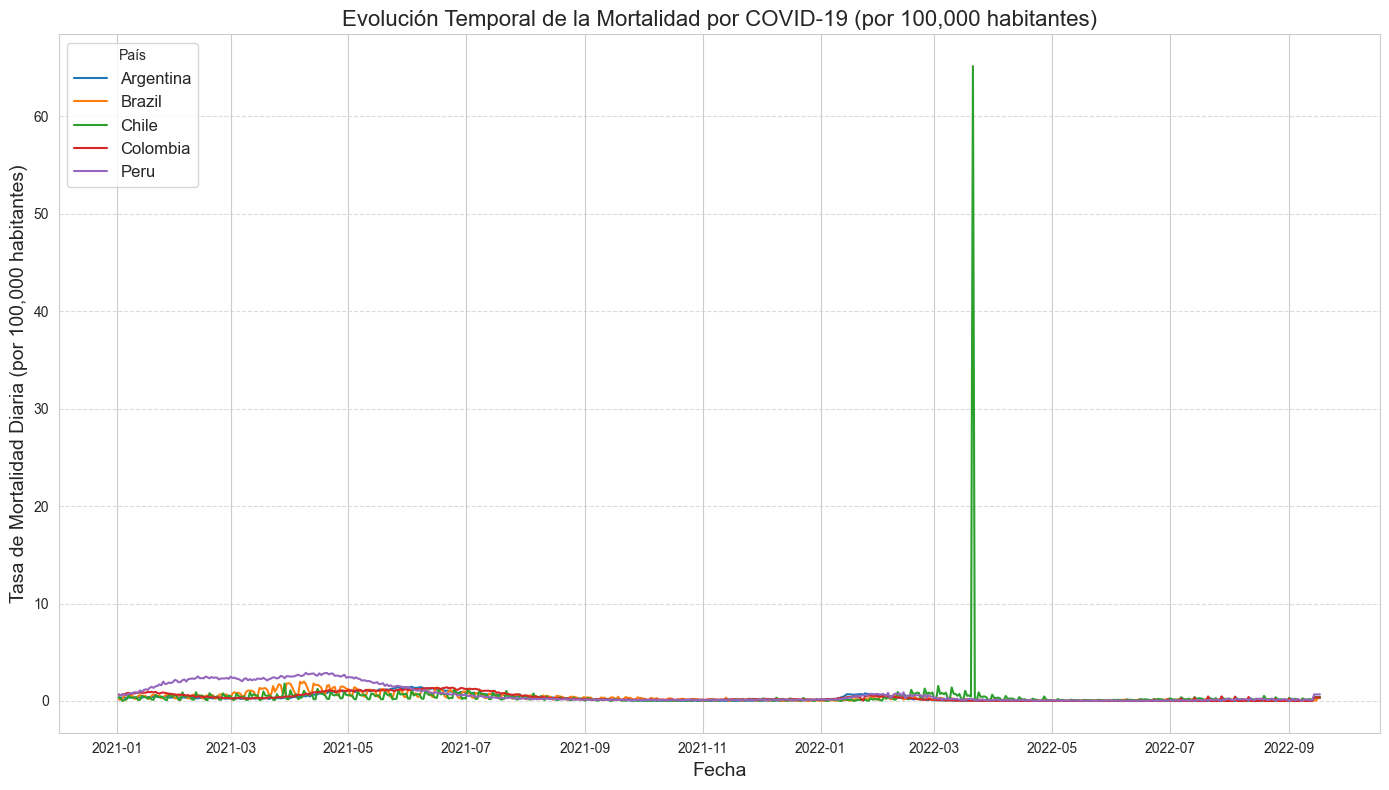

In [132]:

# Asegurarse de que las columnas relevantes están en el formato correcto
data_final['date'] = pd.to_datetime(data_final['date'])

# Calcular la tasa de mortalidad diaria por COVID-19 por cada 100,000 habitantes
data_final['daily_mortality_rate_per_100k'] = (data_final['new_deceased'] / data_final['population']) * 100000

# Agrupar por fecha y país para calcular la tasa diaria
mortalidad_temporal = data_final.groupby(['date', 'country_name']).agg({
    'daily_mortality_rate_per_100k': 'mean'
}).reset_index()

# Filtrar los países con mayores tasas de mortalidad acumulada
top_paises_mortalidad = data_final.groupby('country_name')['cumulative_deceased_per_100k'].max().nlargest(5).index
mortalidad_temporal_top = mortalidad_temporal[mortalidad_temporal['country_name'].isin(top_paises_mortalidad)]

# Graficar la evolución temporal de la tasa de mortalidad por COVID-19
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=mortalidad_temporal_top,
    x='date',
    y='daily_mortality_rate_per_100k',
    hue='country_name',
    palette='tab10'
)

# Añadir etiquetas y título
plt.title('Evolución Temporal de la Mortalidad por COVID-19 (por 100,000 habitantes)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Tasa de Mortalidad Diaria (por 100,000 habitantes)', fontsize=14)
plt.legend(title='País', loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el formato del gráfico
plt.tight_layout()
plt.show()



##### El gráfico muestra la evolución temporal de la tasa de mortalidad en varios países de América Latina. La mayoría de los países presentan tasas de mortalidad relativamente bajas y constantes a lo largo del tiempo. Sin embargo, **Chile** destaca con un pico de mortalidad extremadamente elevado en marzo de 2022, lo cual podría estar relacionado con un error en los datos o un evento excepcional en el reporte de fallecimientos. El comportamiento de la mortalidad en los demás países es más estable, con pequeñas fluctuaciones durante los picos de la pandemia, pero ninguna se aproxima al valor registrado por Chile. Esto resalta la importancia de verificar la calidad de los datos y entender el contexto detrás de estos picos inusuales.

##### COMPARACION CON SITUACION ACTUAL

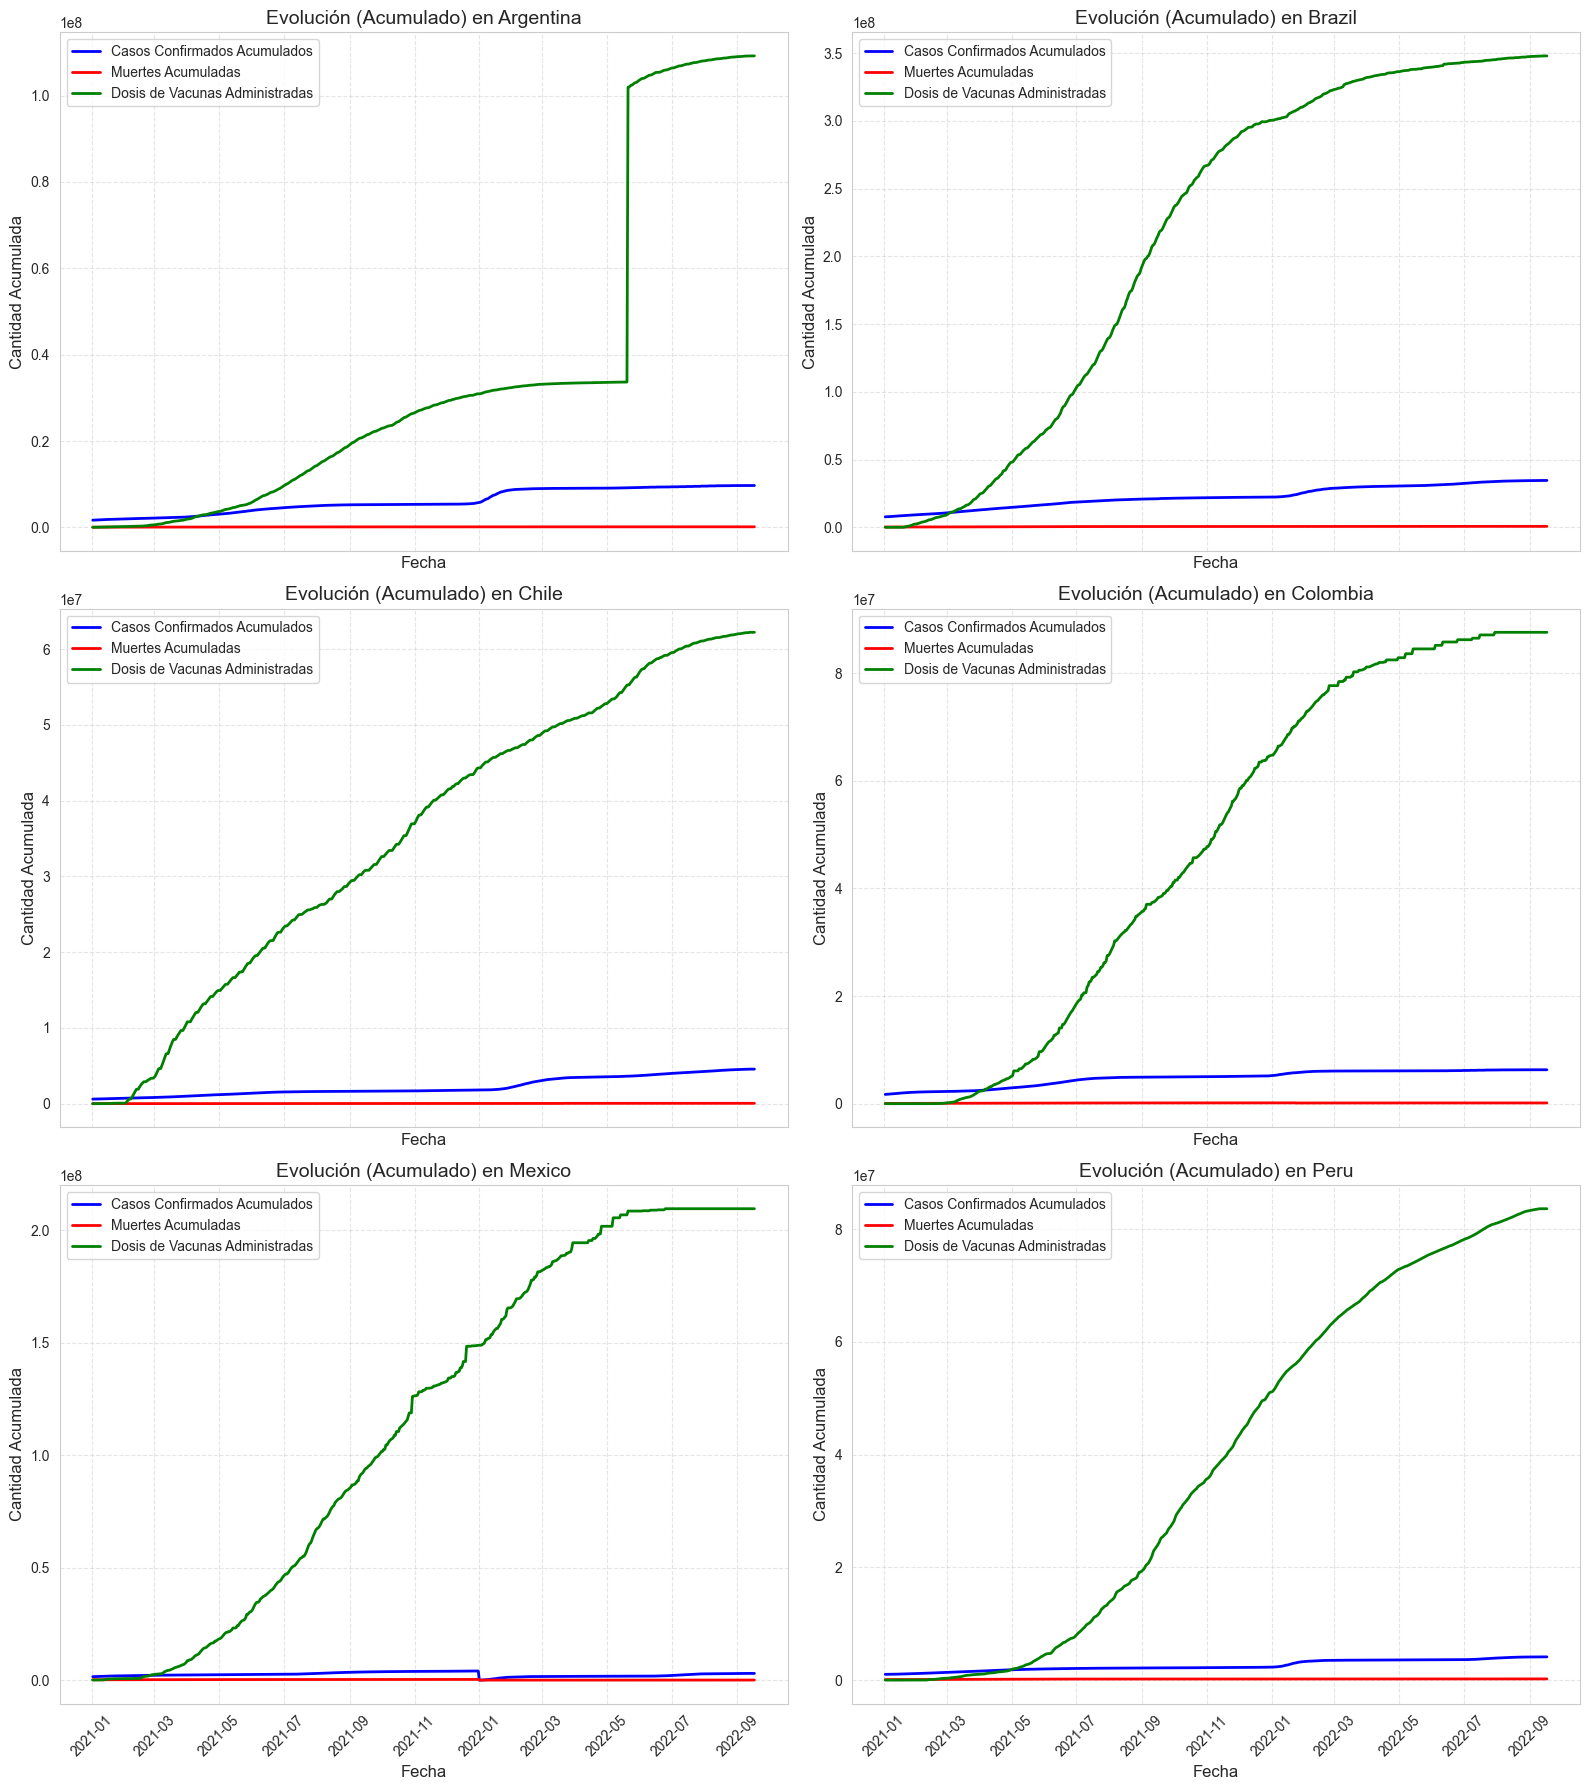

In [133]:

# Asegúrate de que 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Configura 'date' como índice
data_final.set_index('date', inplace=True)

# Verifica si las columnas necesarias están disponibles
variables_acumuladas = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered']

# Filtrar los países únicos en el dataset
paises = data_final['country_name'].unique()

# Calcular el número de filas necesarias (dos gráficos por fila)
num_filas = (len(paises) + 1) // 2

# Crear subplots: dos gráficos por fila
fig, axes = plt.subplots(num_filas, 2, figsize=(16, 6 * num_filas), sharex=True)

# Aplanar el arreglo de ejes si hay múltiples filas
axes = axes.flatten()

# Iterar sobre cada país y su correspondiente eje en el gráfico
for i, pais in enumerate(paises):
    # Filtrar los datos del país actual
    datos_pais = data_final[data_final['country_name'] == pais]
    
    # Verificar que el país tenga datos para las variables
    if all(col in datos_pais.columns for col in variables_acumuladas):
        # Graficar valores acumulados
        axes[i].plot(datos_pais.index, datos_pais['cumulative_confirmed'], label='Casos Confirmados Acumulados', color='blue', linewidth=2)
        axes[i].plot(datos_pais.index, datos_pais['cumulative_deceased'], label='Muertes Acumuladas', color='red', linewidth=2)
        axes[i].plot(datos_pais.index, datos_pais['cumulative_vaccine_doses_administered'], label='Dosis de Vacunas Administradas', color='green', linewidth=2)

        # Configurar títulos y etiquetas
        axes[i].set_title(f'Evolución (Acumulado) en {pais}', fontsize=14)
        axes[i].set_ylabel('Cantidad Acumulada', fontsize=12)
        axes[i].grid(alpha=0.5, linestyle='--')
        axes[i].legend(loc='upper left', fontsize=10)
    else:
        print(f"No hay datos suficientes para el país: {pais}")

# Desactivar los ejes sobrantes si el número de países es impar
if len(paises) % 2 != 0:
    axes[-1].axis('off')

# Etiqueta común para el eje X
for ax in axes:
    ax.set_xlabel('Fecha', fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=45)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


- **Vacunación masiva:** Brasil lidera en dosis administradas (350+ millones), seguido por México. La vacunación supera ampliamente los casos confirmados y las muertes en todos los países, destacando su impacto en la reducción de la mortalidad.

- **Casos confirmados:** Brasil tiene los mayores casos acumulados, pero países como Chile muestran una proporción más baja en relación a su población, posiblemente por una rápida respuesta de vacunación.

- **Muertes acumuladas:** Permanecen bajas en comparación con los casos confirmados, reflejando la efectividad de las vacunas. En Brasil y México, la diferencia entre muertes y casos es notable, indicando un impacto positivo tardío de las vacunas.

- **Tendencia temporal:** Las vacunas muestran una aceleración significativa a mitad del periodo analizado, mientras que los casos y muertes se estabilizan posteriormente, especialmente en países como Chile.

**Recomendaciones:**
- Analizar la efectividad de la vacunación temprana en países con menor proporción de casos acumulados.
- Investigar disparidades regionales dentro de países con alta mortalidad y casos.
- Explorar la correlación temporal entre el inicio de la vacunación masiva y la reducción de casos y muertes.

##### Relacion entre la cobertura de vacunacion y la reduccion de casos nuevos

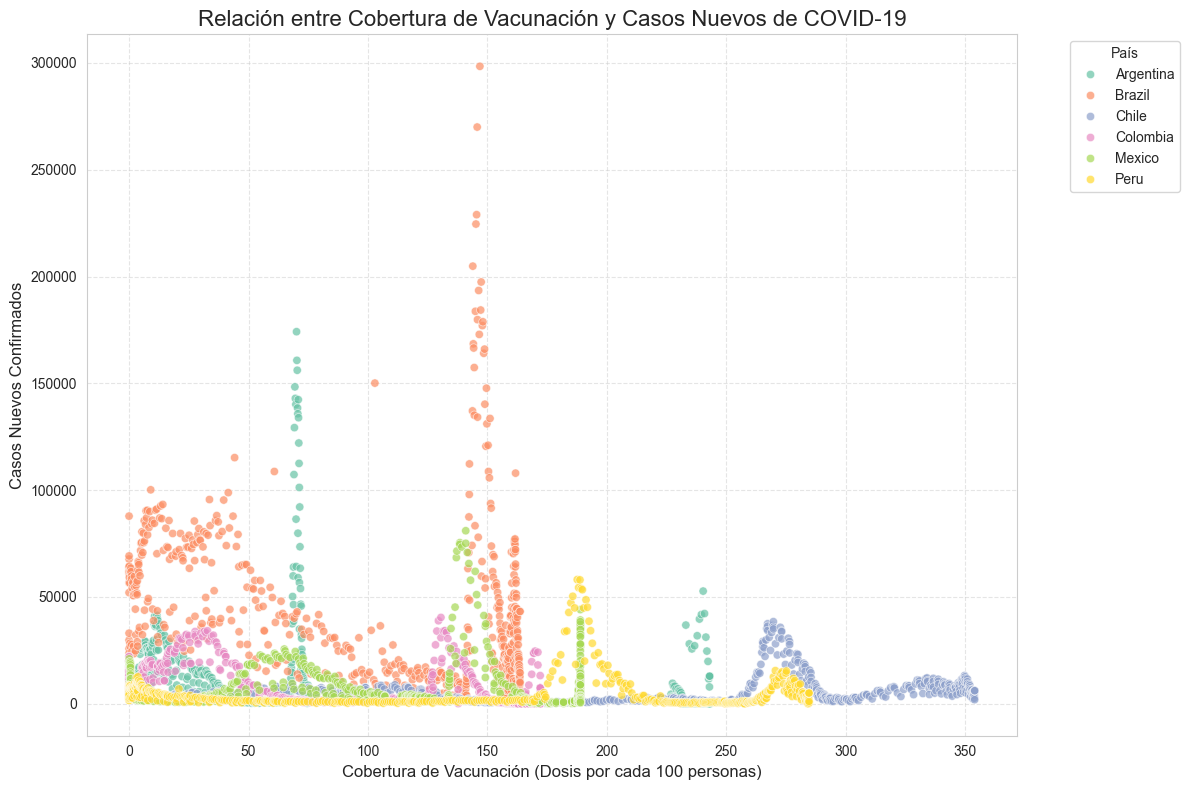

In [134]:
# Asegurarte de que las columnas necesarias están disponibles
# Calcular la cobertura de vacunación por cada 100 personas
data_final['vaccination_per_100'] = (data_final['cumulative_vaccine_doses_administered'] / data_final['population']) * 100

# Filtrar los datos relevantes (evitar valores nulos y casos extremos)
filtered_data = data_final[(data_final['new_confirmed'] >= 0) & (data_final['vaccination_per_100'] >= 0)]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='vaccination_per_100',
    y='new_confirmed',
    hue='country_name',
    data=filtered_data,
    palette='Set2',
    alpha=0.7
)

# Personalizar el gráfico
plt.title('Relación entre Cobertura de Vacunación y Casos Nuevos de COVID-19', fontsize=16)
plt.xlabel('Cobertura de Vacunación (Dosis por cada 100 personas)', fontsize=12)
plt.ylabel('Casos Nuevos Confirmados', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Insights del análisis de la relación entre cobertura de vacunación y casos nuevos de COVID-19:

1. **Tendencia General:**
   - Se observa una disminución general en los casos nuevos de COVID-19 a medida que aumenta la cobertura de vacunación (dosis administradas por cada 100 personas). Esto es consistente con la eficacia de las vacunas para reducir la transmisión del virus.

2. **Cobertura Alta y Bajas Infecciones:**
   - Países como Chile y Brasil muestran una cobertura de vacunación por encima de 200 dosis por cada 100 personas, acompañada de una disminución significativa en los casos nuevos, lo que sugiere un impacto positivo en el control de la pandemia.

3. **Comportamiento Inconsistente:**
   - Algunos puntos en países como Brasil y México muestran altos niveles de casos nuevos incluso con una cobertura de vacunación significativa. Esto podría deberse a otros factores como nuevas variantes, comportamiento social, o retrasos en los efectos de la vacunación.

4. **Cobertura Baja y Alta Incidencia:**
   - En los países con menos de 100 dosis por cada 100 personas (como en etapas iniciales de vacunación), los casos nuevos son generalmente más altos, lo que enfatiza la importancia de incrementar la cobertura de vacunación.

5. **Variabilidad entre Países:**
   - Los datos revelan diferencias entre países que podrían estar influenciadas por factores adicionales como la densidad poblacional, acceso al sistema de salud, y políticas públicas relacionadas con la pandemia.

6. **Consideraciones Adicionales:**
   - Aunque la vacunación es un factor crucial, no es el único determinante en la reducción de casos. Es necesario combinar estos datos con análisis adicionales como tasas de hospitalización, cumplimiento de medidas preventivas y distribución etaria.

Recomendaciones:
- **Análisis por Temporalidad:** Explorar cómo varía la relación a lo largo del tiempo para identificar momentos en los que la vacunación tuvo el mayor impacto.
- **Factores Complementarios:** Incorporar variables adicionales como densidad de población, medidas de confinamiento y variantes del virus para enriquecer el análisis.
- **Foco en Políticas Públicas:** Identificar qué países lograron una mayor reducción de casos y analizar las políticas que facilitaron este éxito para replicarlas en otros contextos.

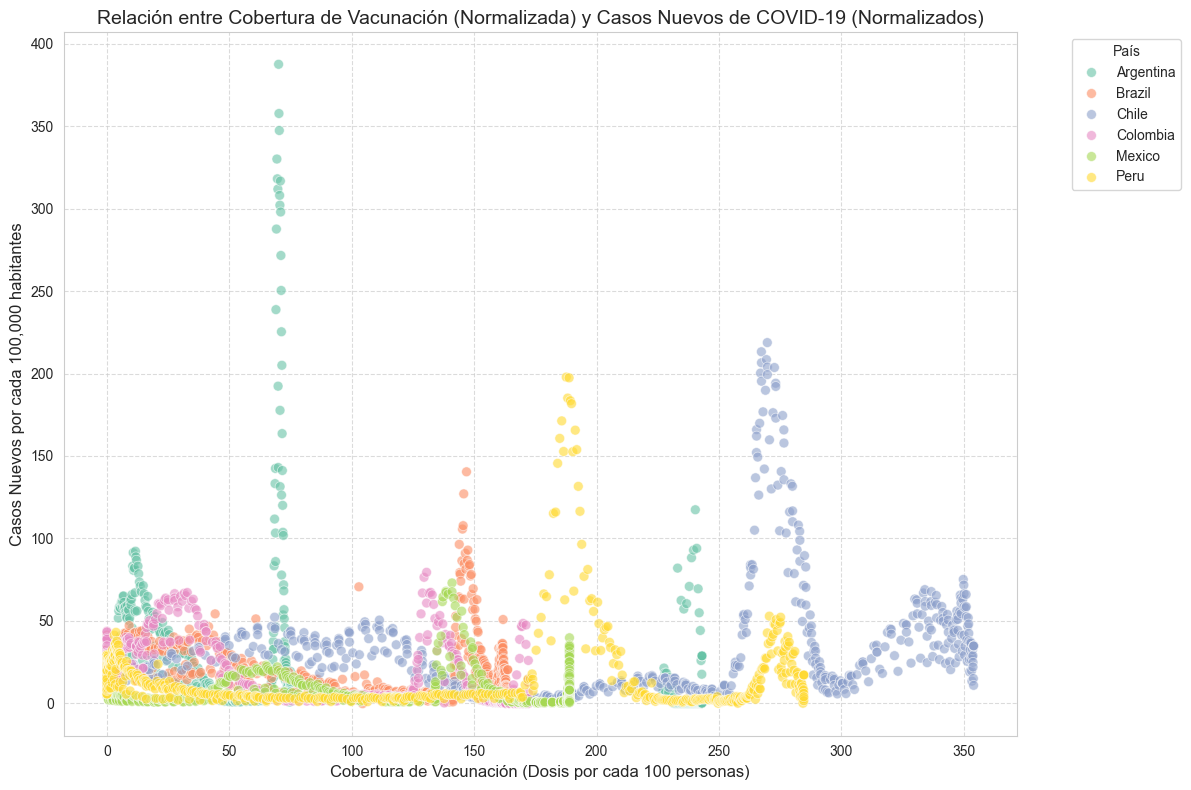

In [135]:

# Cargar el dataset
data_final = pd.read_csv('DatosFinalesFiltrado.csv')

# Asegurarte de que las columnas necesarias estén en el formato adecuado
data_final['population'] = data_final['population'].replace(0, pd.NA)  # Evitar divisiones por 0
data_final.dropna(subset=['population'], inplace=True)

# Variables normalizadas
data_final['vaccination_per_100'] = (data_final['cumulative_vaccine_doses_administered'] / data_final['population']) * 100
data_final['new_confirmed_per_100k'] = (data_final['new_confirmed'] / data_final['population']) * 100000

# Configurar el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='vaccination_per_100',
    y='new_confirmed_per_100k',
    hue='country_name',
    data=data_final,
    palette='Set2',
    alpha=0.6,
    s=50
)

# Títulos y etiquetas
plt.title('Relación entre Cobertura de Vacunación (Normalizada) y Casos Nuevos de COVID-19 (Normalizados)', fontsize=14)
plt.xlabel('Cobertura de Vacunación (Dosis por cada 100 personas)', fontsize=12)
plt.ylabel('Casos Nuevos por cada 100,000 habitantes', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Insights del gráfico con valores normalizados:

1. **Patrón General:**
   - En los valores normalizados, se observa que la relación entre la cobertura de vacunación y los casos nuevos de COVID-19 por cada 100,000 habitantes permite identificar diferencias más equitativas entre países, eliminando el sesgo debido a la población total.

2. **Distribución por País:**
   - **Chile y Brasil**: Presentan una alta cobertura de vacunación (más de 200 dosis por cada 100 personas) y una reducción notable en los casos nuevos normalizados.
   - **Perú y Argentina**: A pesar de una cobertura menor, muestran variaciones más amplias en los casos nuevos, lo que podría estar relacionado con otras variables, como políticas de salud o demografía.
   - **México y Colombia**: Exhiben coberturas de vacunación más dispersas con niveles intermedios de reducción de casos nuevos.

3. **Eficiencia de Vacunación:**
   - La reducción de casos por cada 100,000 habitantes parece correlacionarse con mayores tasas de vacunación. Sin embargo, algunos puntos anómalos (p. ej., alta cobertura con presencia de casos nuevos) podrían indicar desafíos en la implementación de la vacunación o variantes del virus.

---
Comparación con el gráfico de valores absolutos:

1. **Perspectiva Poblacional:**
   - En el gráfico de valores absolutos, Brasil domina debido a su gran población, mostrando altas cifras de vacunación y casos nuevos, lo que puede oscurecer patrones relevantes en países con poblaciones más pequeñas.
   - Con valores normalizados, la comparación entre países es más equilibrada y permite observar patrones claros en países como Chile, que destaca por su alta cobertura relativa y baja incidencia.

2. **Análisis Regional:**
   - En valores absolutos, la dinámica regional parece dominada por los países más grandes. En cambio, los valores normalizados resaltan la eficacia relativa de las políticas de vacunación y manejo del COVID-19 en países más pequeños como Chile.

3. **Interpretación de Impacto:**
   - Mientras los valores absolutos ayudan a dimensionar el impacto total de la pandemia y la vacunación, los valores normalizados proporcionan insights más precisos sobre la relación proporcional entre cobertura y casos nuevos.

---

Recomendaciones:
- Usar valores normalizados para evaluar la eficacia de las campañas de vacunación y estrategias sanitarias entre países.
- Incorporar análisis por períodos de tiempo específicos para observar tendencias dinámicas en la reducción de casos.

##### Evolucion de la mortalidad

/var/folders/kb/v6qf2jt520g22z64x410gpk00000gn/T/ipykernel_8746/1810421593.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_final, x="date", y="mortality_rate", estimator="mean", ci=None)  # estimación valor medio, no mostrar intervalos


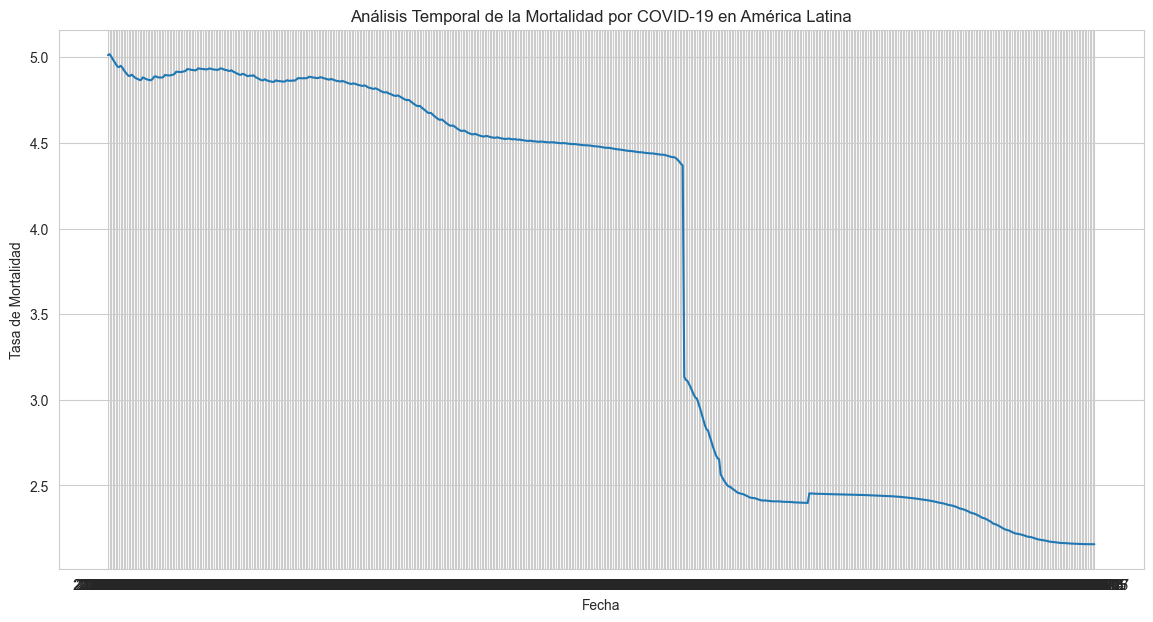

In [136]:
# Evolución de la mortalidad
data_final["mortality_rate"] = (data_final["cumulative_deceased"] / data_final["cumulative_confirmed"]) * 100

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_final, x="date", y="mortality_rate", estimator="mean", ci=None)  # estimación valor medio, no mostrar intervalos
plt.title("Análisis Temporal de la Mortalidad por COVID-19 en América Latina")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad")
plt.show()



Insights del análisis temporal de la mortalidad por COVID-19 en América Latina:

1. **Tendencia General a la Baja:**
   - Se observa una disminución constante en la tasa de mortalidad a lo largo del tiempo. Esto podría estar asociado a varios factores, como:
     - Mejores prácticas de manejo de la enfermedad.
     - Incremento en la cobertura de vacunación.
     - Mejoras en la capacidad del sistema de salud para tratar casos críticos.

2. **Puntos de Descenso Rápido:**
   - Hay periodos donde la tasa de mortalidad cae de manera abrupta. Esto podría reflejar:
     - Cambios en la metodología de reporte de datos.
     - Impacto de campañas masivas de vacunación o tratamientos más efectivos.
     - Subreportes o actualizaciones en las estadísticas oficiales.

3. **Inicio Elevado:**
   - Al inicio de la serie temporal, la tasa de mortalidad era significativamente más alta. Esto coincide con los primeros meses de la pandemia, cuando había un entendimiento limitado del virus, menos herramientas médicas disponibles, y acceso restringido a vacunas.

4. **Efecto Residual:**
   - A pesar de la caída, la tasa de mortalidad aún se mantiene con una ligera pendiente hacia la baja. Esto sugiere que la pandemia aún tiene efectos residuales que afectan de forma desigual a la población.

5. **Posible Variabilidad Regional:**
   - Aunque el análisis es general, podrían existir diferencias significativas entre los países de América Latina. Algunos pueden haber tenido un mejor desempeño gracias a sistemas de salud más robustos, mientras que otros podrían haberse enfrentado a mayores desafíos.

---

Recomendaciones:
1. **Estudios por País:**
   - Analizar las tendencias específicas de cada país para identificar políticas exitosas y replicarlas.
   
2. **Incorporar Variables Explicativas:**
   - Añadir datos sobre vacunación, tasas de hospitalización y acceso a cuidados críticos para entender mejor las variaciones.

3. **Validar Datos de Reporte:**
   - Explorar posibles cambios en la metodología de reporte de casos y decesos para explicar caídas abruptas en la tasa de mortalidad.

4. **Segmentación por Edad:**
   - Analizar la mortalidad por grupos etarios para comprender mejor los impactos diferenciados en las poblaciones vulnerables.

### EXTRACREDIT

In [138]:
import pandas as pd
from folium import Map
from folium.plugins import HeatMap  # HeatMap está en el submódulo plugins
from IPython.display import display

# Asegúrate de que la columna de fechas esté en formato datetime
data_final.index = pd.to_datetime(data_final.index)

# Calcular casos activos si no existen
data_final['active_cases'] = data_final['cumulative_confirmed'] - (data_final['cumulative_recovered'] + data_final['cumulative_deceased'])

# Obtener el último registro por país para representar la situación actual
situacion_actual = data_final.groupby('country_name').last().reset_index()

# Seleccionar las variables relevantes: casos activos, recuperados y muertes
variables_actuales = ['active_cases', 'cumulative_recovered', 'cumulative_deceased']

# Columnas a utilizar
columns = ["latitude", "longitude", "cumulative_confirmed", "cumulative_deceased", "cumulative_vaccine_doses_administered", "cumulative_recovered"]
data_mapa = data_final[columns].dropna()

# Crear un mapa centrado en América Latina
m = Map(location=[-14.235004, -51.92528], zoom_start=3)

# Agregar mapas de calor para las distintas métricas
if not data_mapa.empty:
    # Mapa de calor para casos confirmados
    HeatMap(data=data_mapa[["latitude", "longitude", "cumulative_confirmed"]].values, radius=15).add_to(m)

    # Mapa de calor para muertes
    HeatMap(data=data_mapa[["latitude", "longitude", "cumulative_deceased"]].values, radius=15).add_to(m)

    # Mapa de calor para recuperados
    HeatMap(data=data_mapa[["latitude", "longitude", "cumulative_recovered"]].values, radius=15).add_to(m)

    # Mapa de calor para dosis de vacunas
    HeatMap(data=data_mapa[["latitude", "longitude", "cumulative_vaccine_doses_administered"]].values, radius=15).add_to(m)

# Guardar el mapa en un archivo HTML y mostrarlo
m.save("mapa.html")
display(m)
